In [1]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

##Seaborn for fancy plots. 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
from shapely.geometry import Point
#import fiona

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

import folium # mapping
from folium.plugins import HeatMap
import scikit_posthocs as sp

>We noticed earlier, from previous analysis of the Violent Crimes committed in Edmonton, that the Top 6 Neighborhoods that keep showing up are:
><li>Downtown
><li>McCauley
><li>Central McDougall
><li>Boyle Street
><li>Oliver, and
><li>Alberta Avenue

>To investigate further, we decided to look at Employment Status, Income Levels and Education Levels by Neighborhood. Unfortunately, the only data available was for the year 2016. So the further investigation from here will only be done based on the year 2016.

In [2]:
df=pd.read_csv('3960_2016.csv', encoding_errors='ignore')
df.drop(['Descriptive Name'], axis=1, inplace =True)
df.drop(['Unnamed: 0'], axis=1, inplace =True)
#df['Avg_Temp']=(df['Air Temp. Avg. Max. (°C)']+df['Air Temp. Avg. Min. (°C)'])/2
df.drop(['Air Temp. Avg. Max. (°C)'], axis=1, inplace =True)
df.drop(['Air Temp. Avg. Min. (°C)'], axis=1, inplace =True)
df.drop(['NGH_Number'], axis=1, inplace =True)
df.drop(['DT_Year'], axis=1, inplace =True) # we are only dealing with 2016
df.drop(['DT_Month'], axis=1, inplace =True)

df.rename(columns={'Edu_Preschool': 'Preschool', 'Edu_Kindergarten ':'Kindergarten', 'Edu_Gr.7 - Gr.9':'Gr7_Gr9'}, inplace=True)
df.rename(columns={'Edu_Gr.10 - Gr.12': 'Gr10_Gr12', 'Edu_Post Secondar':'Post_Secondary'}, inplace=True)
display('Dataset Columns: ',df.columns)
print()
display('Dataset Information:', df.info())
print()
display('Null Values?:', df.isnull().sum())
df.head()

'Dataset Columns: '

Index(['NGH_Name', 'Latitude', 'Longitude', 'Violation_Type',
       'Sum_Occurrences', 'Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11132 entries, 0 to 11131
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NGH_Name                11132 non-null  object 
 1   Latitude                11132 non-null  float64
 2   Longitude               11132 non-null  float64
 3   Violation_Type          11132 non-null  object 
 4   Sum_Occurrences         11132 non-null  int64  
 5   Preschool               11113 non-null  float64
 6   Kindergarten            11113 non-null  float64
 7   Gr7_Gr9                 11113 non-null  float64
 8   Gr10_Gr12               11113 non-null  float64
 9   Post_Secondary          11113 non-null  float64
 10  Homemaker               11113 non-null  float64
 11  Employedage0-30         11113 non-null  float64
 12  Employed 30+            11113 non-null  float64
 13  Unemployed              11113 non-null  float64
 14  Retired                 11113 non-nul

'Dataset Information:'

None

'Null Values?:'

NGH_Name                   0
Latitude                   0
Longitude                  0
Violation_Type             0
Sum_Occurrences            0
Preschool                 19
Kindergarten              19
Gr7_Gr9                   19
Gr10_Gr12                 19
Post_Secondary            19
Homemaker                 19
Employedage0-30           19
Employed 30+              19
Unemployed                19
Retired                   19
Permanently U             19
Employment_No Response    19
Income_Less than $30,     19
Income_$30,000 to les     19
Income_$60,000 to les     19
Income_$100,000 to le     19
Income_$125,000 to le     19
Income_$150,000 to le     19
Income_$200,000 to le     19
Income_$250,000 or mo     19
Income_No Response        19
dtype: int64

NGH_Name   Latitude   Longitude      Violation_Type  Sum_Occurrences  \
0  ABBOTTSFIELD  53.574143 -113.388758             Assault                4   
1  ABBOTTSFIELD  53.574143 -113.388758  Theft From Vehicle                1   
2  ABBOTTSFIELD  53.574143 -113.388758  Theft From Vehicle                1   
3  ABBOTTSFIELD  53.574143 -113.388758             Assault                1   
4  ABBOTTSFIELD  53.574143 -113.388758             Assault                1   

   Preschool  Kindergarten  Gr7_Gr9  Gr10_Gr12  Post_Secondary  ...  \
0      159.0         189.0     64.0       52.0            43.0  ...   
1      159.0         189.0     64.0       52.0            43.0  ...   
2      159.0         189.0     64.0       52.0            43.0  ...   
3      159.0         189.0     64.0       52.0            43.0  ...   
4      159.0         189.0     64.0       52.0            43.0  ...   

   Employment_No Response  Income_Less than $30,  Income_$30,000 to les  \
0                   499.0                  206.0                  170.0   
1                   499.0                  206.0                  170.0   
2                   499.0                  206.0                  170.0   
3                   499.0                  206.0                  170.0   
4                   499.0                  206.0                  170.0   

   Income_$60,000 to les  Income_$100,000 to le  Income_$125,000 to le  \
0                   79.0                   23.0                    4.0   
1                   79.0                   23.0                    4.0   
2                   79.0                   23.0                    4.0   
3                   79.0                   23.0                    4.0   
4                   79.0                   23.0                    4.0   

   Income_$150,000 to le  Income_$200,000 to le  Income_$250,000 or mo  \
0                    3.0                    3.0                    2.0   
1                    3.0                    3.0                    2.0   
2                    3.0                    3.0                    2.0   
3                    3.0                    3.0                    2.0   
4                    3.0                    3.0                    2.0   

   Income_No Response  
0               195.0  
1               195.0  
2               195.0  
3               195.0  
4               195.0  

[5 rows x 26 columns]

In [3]:
df.describe().T

count         mean          std         min  \
Latitude                11132.0    53.534315     0.058982   53.399507   
Longitude               11132.0  -113.503369     0.078221 -113.701466   
Sum_Occurrences         11132.0     2.533148     2.779805    1.000000   
Preschool               11113.0   130.877711   132.198913    0.000000   
Kindergarten            11113.0   167.029245   164.464642    0.000000   
Gr7_Gr9                 11113.0    67.769639    60.997749    0.000000   
Gr10_Gr12               11113.0    56.901197    50.458302    0.000000   
Post_Secondary          11113.0   100.428597   158.738916    0.000000   
Homemaker               11113.0    71.141996    63.947275    0.000000   
Employedage0-30         11113.0   149.869972   118.742042    0.000000   
Employed 30+            11113.0   933.108612   835.523202    0.000000   
Unemployed              11113.0   129.808783   110.350061    0.000000   
Retired                 11113.0   303.955008   272.178128    0.000000   
Permanently U           11113.0    37.156303    42.232148    0.000000   
Employment_No Response  11113.0  1155.861244  1131.229481    0.000000   
Income_Less than $30,   11113.0   133.869882   197.913557    0.000000   
Income_$30,000 to les   11113.0   185.541708   194.515295    0.000000   
Income_$60,000 to les   11113.0   180.655629   186.686130    0.000000   
Income_$100,000 to le   11113.0    79.569153    85.396937    0.000000   
Income_$125,000 to le   11113.0    48.586790    53.324445    0.000000   
Income_$150,000 to le   11113.0    45.087285    54.436444    0.000000   
Income_$200,000 to le   11113.0    18.323675    23.474115    0.000000   
Income_$250,000 or mo   11113.0    17.155044    27.823724    0.000000   
Income_No Response      11113.0   719.476109   797.157981    0.000000   

                               25%         50%          75%          max  
Latitude                 53.488707   53.539767    53.579205    53.678364  
Longitude              -113.558327 -113.499421  -113.444355  -113.312513  
Sum_Occurrences           1.000000    2.000000     3.000000    43.000000  
Preschool                51.000000  103.000000   180.000000   967.000000  
Kindergarten             58.000000  139.000000   231.000000  1157.000000  
Gr7_Gr9                  22.000000   60.000000    98.000000   353.000000  
Gr10_Gr12                18.000000   48.000000    83.000000   273.000000  
Post_Secondary           31.000000   66.000000   119.000000  1621.000000  
Homemaker                28.000000   60.000000    96.000000   398.000000  
Employedage0-30          68.000000  139.000000   207.000000   667.000000  
Employed 30+            453.000000  814.000000  1249.000000  5465.000000  
Unemployed               49.000000  114.000000   196.000000   554.000000  
Retired                 122.000000  281.000000   423.000000  2343.000000  
Permanently U             8.000000   27.000000    48.000000   258.000000  
Employment_No Response  434.000000  959.000000  1582.000000  7636.000000  
Income_Less than $30,    25.000000   72.000000   152.000000  1413.000000  
Income_$30,000 to les    60.000000  152.000000   244.000000  1611.000000  
Income_$60,000 to les    73.000000  159.000000   237.000000  1505.000000  
Income_$100,000 to le    30.000000   62.000000    99.000000   537.000000  
Income_$125,000 to le    16.000000   35.000000    63.000000   355.000000  
Income_$150,000 to le    11.000000   28.000000    58.000000   393.000000  
Income_$200,000 to le     3.000000   10.000000    25.000000   133.000000  
Income_$250,000 or mo     2.000000    5.000000    19.000000   145.000000  
Income_No Response      308.000000  570.000000   924.000000  6716.000000

We have a lot of ZEROS for the columns ['Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response'].

These could be just Industrial Areas: we need to get rid of them for now.

In [4]:
df.columns

Index(['NGH_Name', 'Latitude', 'Longitude', 'Violation_Type',
       'Sum_Occurrences', 'Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response'],
      dtype='object')

In [5]:
# Filter out those columns to only values > 0
df = df[(df[['Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12', 'Post_Secondary', 
             'Homemaker', 'Employedage0-30', 'Employed 30+ ', 'Unemployed', 'Retired', 'Permanently U', 
             'Employment_No Response', 'Income_Less than $30,', 'Income_$30,000 to les', 'Income_$60,000 to les', 
             'Income_$100,000 to le', 'Income_$125,000 to le', 'Income_$150,000 to le', 'Income_$200,000 to le', 
             'Income_$250,000 or mo', 'Income_No Response']] > 0).all(axis=1)]


In [6]:
df.describe().T

count         mean          std         min  \
Latitude                8864.0    53.535489     0.059773   53.401301   
Longitude               8864.0  -113.501117     0.075535 -113.701352   
Sum_Occurrences         8864.0     2.697766     2.890208    1.000000   
Preschool               8864.0   160.929377   131.278290    6.000000   
Kindergarten            8864.0   206.018276   161.658096    8.000000   
Gr7_Gr9                 8864.0    83.468186    58.241845    1.000000   
Gr10_Gr12               8864.0    70.238042    47.746909    2.000000   
Post_Secondary          8864.0   124.183326   169.420230    2.000000   
Homemaker               8864.0    87.524143    61.149328    3.000000   
Employedage0-30         8864.0   183.660199   107.475463    4.000000   
Employed 30+            8864.0  1148.988042   797.394227   21.000000   
Unemployed              8864.0   157.877256   102.757239    1.000000   
Retired                 8864.0   371.346232   260.693042   14.000000   
Permanently U           8864.0    44.503610    42.220143    1.000000   
Employment_No Response  8864.0  1392.209612  1115.324640   80.000000   
Income_Less than $30,   8864.0   161.221909   207.608716    2.000000   
Income_$30,000 to les   8864.0   226.931182   195.471096    4.000000   
Income_$60,000 to les   8864.0   222.185808   186.541445    3.000000   
Income_$100,000 to le   8864.0    98.241990    85.861462    1.000000   
Income_$125,000 to le   8864.0    60.105257    53.806716    1.000000   
Income_$150,000 to le   8864.0    55.868005    55.945983    2.000000   
Income_$200,000 to le   8864.0    22.722022    24.351290    1.000000   
Income_$250,000 or mo   8864.0    21.349616    29.644906    1.000000   
Income_No Response      8864.0   874.281814   809.206171   91.000000   

                               25%          50%          75%          max  
Latitude                 53.485677    53.539767    53.587951    53.678364  
Longitude              -113.550982  -113.500798  -113.442230  -113.312513  
Sum_Occurrences           1.000000     2.000000     3.000000    43.000000  
Preschool                87.000000   126.000000   199.000000   967.000000  
Kindergarten            109.000000   169.000000   261.000000  1157.000000  
Gr7_Gr9                  41.000000    71.000000   106.000000   353.000000  
Gr10_Gr12                37.000000    58.000000    91.000000   273.000000  
Post_Secondary           51.000000    87.000000   132.000000  1621.000000  
Homemaker                48.000000    76.000000   111.000000   398.000000  
Employedage0-30         111.000000   157.000000   226.000000   667.000000  
Employed 30+            670.000000   961.000000  1352.000000  5465.000000  
Unemployed               82.000000   135.000000   210.000000   554.000000  
Retired                 227.000000   337.000000   462.000000  2343.000000  
Permanently U            19.000000    34.000000    52.000000   258.000000  
Employment_No Response  666.000000  1157.000000  1701.000000  7636.000000  
Income_Less than $30,    51.000000    96.000000   179.000000  1413.000000  
Income_$30,000 to les   118.000000   181.000000   282.000000  1611.000000  
Income_$60,000 to les   124.000000   190.000000   265.000000  1505.000000  
Income_$100,000 to le    48.000000    75.000000   111.000000   537.000000  
Income_$125,000 to le    27.750000    44.000000    71.000000   355.000000  
Income_$150,000 to le    21.750000    40.000000    69.000000   393.000000  
Income_$200,000 to le     6.000000    14.000000    29.000000   133.000000  
Income_$250,000 or mo     4.000000     8.000000    23.000000   145.000000  
Income_No Response      470.000000   682.000000   974.000000  6716.000000

In [7]:
df.isnull().sum()

NGH_Name                  0
Latitude                  0
Longitude                 0
Violation_Type            0
Sum_Occurrences           0
Preschool                 0
Kindergarten              0
Gr7_Gr9                   0
Gr10_Gr12                 0
Post_Secondary            0
Homemaker                 0
Employedage0-30           0
Employed 30+              0
Unemployed                0
Retired                   0
Permanently U             0
Employment_No Response    0
Income_Less than $30,     0
Income_$30,000 to les     0
Income_$60,000 to les     0
Income_$100,000 to le     0
Income_$125,000 to le     0
Income_$150,000 to le     0
Income_$200,000 to le     0
Income_$250,000 or mo     0
Income_No Response        0
dtype: int64

Its seems we have no more nulls.

>The Null values represent non residential area, hence that is why we have Null values for Education levels, Income Levels and Employment Status levels.

In [8]:
# make copy of original dataset df
df_copy=df.copy()

In [9]:
df_copy['Violation_Type'].value_counts()

Theft From Vehicle    2362
Break and Enter       1904
Theft Of Vehicle      1660
Assault               1579
Robbery                621
Sexual Assaults        469
Theft Over $5000       249
Homicide                20
Name: Violation_Type, dtype: int64

>For the purpose of statistical analysis, we have decided to keep the Violation_Types that belong to Property Crimes and Viloent Crimes.
>The reason for this is to see if there is a relationship between them, when we include the Property Assessment Values for 2016 to the dataframe later.

We decided to pivot the table- thinking that it would be easy to impliment the clustering and also easier to merge the dataframe to get the Property Assessment Values, later on.

In [10]:
# Pivot the dataframe on NGH_Name and calculate the sum of occurrences for each Violation_Type
pivot_table = df_copy.pivot_table(index='NGH_Name', values='Sum_Occurrences', columns='Violation_Type', aggfunc='sum', fill_value=0, margins=False)

# Include the demographic columns in the pivot table
pivot_table = pd.concat([pivot_table, df_copy.groupby('NGH_Name')[['Latitude', 'Longitude', 'Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response']].mean()], axis=1)

# Rename the columns
pivot_table.columns = ['Assault', 'Break and Enter', 'Homicide', 'Robbery', 'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired', 'Permanently Unemployed', 'Employment_No Response', 'Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K', 'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K', 'Income_200K to less than 250K', 'Income_250K or more', 'Income_No Response']

# Print the pivot table
pivot_table

Assault  Break and Enter  Homicide  Robbery  Sexual Assaults  \
NGH_Name                                                                       
ABBOTTSFIELD         35                8         0        8                4   
ALBANY                8                8         0        2                2   
ALBERTA AVENUE      123              119         1       26               13   
ALDERGROVE           17               19         0        6                4   
ALLARD                6               17         0        1                0   
...                 ...              ...       ...      ...              ...   
WESTWOOD             43               34         0        7                6   
WILD ROSE            14               15         0        2                2   
WINDERMERE            7               22         0        3                1   
WOODCROFT            30               22         0       13                4   
YORK                 24               21         0        4                2   

                Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
NGH_Name                                                                 
ABBOTTSFIELD                    16                 6                 0   
ALBANY                           9                 2                 1   
ALBERTA AVENUE                 156                99                 2   
ALDERGROVE                      46                23                 0   
ALLARD                          12                 3                 4   
...                            ...               ...               ...   
WESTWOOD                        53                48                 1   
WILD ROSE                       46                24                 1   
WINDERMERE                      31                 6                 4   
WOODCROFT                       40                20                 4   
YORK                            48                17                 4   

                 Latitude   Longitude  ...  Employment_No Response  \
NGH_Name                               ...                           
ABBOTTSFIELD    53.574143 -113.388758  ...                   499.0   
ALBANY          53.632382 -113.549464  ...                   445.0   
ALBERTA AVENUE  53.568485 -113.485119  ...                  2342.0   
ALDERGROVE      53.516888 -113.641242  ...                  1110.0   
ALLARD          53.401301 -113.526641  ...                  1495.0   
...                   ...         ...  ...                     ...   
WESTWOOD        53.575942 -113.498585  ...                  1346.0   
WILD ROSE       53.470564 -113.381167  ...                  3020.0   
WINDERMERE      53.432563 -113.626008  ...                  3618.0   
WOODCROFT       53.564595 -113.558327  ...                   523.0   
YORK            53.602843 -113.430212  ...                   843.0   

                Income_Less than $30K  Income_30K to less than 60K  \
NGH_Name                                                             
ABBOTTSFIELD                    206.0                        170.0   
ALBANY                           10.0                         56.0   
ALBERTA AVENUE                  601.0                        667.0   
ALDERGROVE                      119.0                        266.0   
ALLARD                            4.0                         48.0   
...                               ...                          ...   
WESTWOOD                        381.0                        321.0   
WILD ROSE                        32.0                        198.0   
WINDERMERE                       37.0                        144.0   
WOODCROFT                       214.0                        121.0   
YORK                            148.0                        297.0   

                Income_60K to less than 100K  Income_100K to less than 125K  \
NGH_Name                                                                      
ABBOTTSFIELD                    

In [11]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, ABBOTTSFIELD to YORK
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Assault                        245 non-null    int64  
 1   Break and Enter                245 non-null    int64  
 2   Homicide                       245 non-null    int64  
 3   Robbery                        245 non-null    int64  
 4   Sexual Assaults                245 non-null    int64  
 5   Theft From Vehicle             245 non-null    int64  
 6   Theft Of Vehicle               245 non-null    int64  
 7   Theft Over $5000               245 non-null    int64  
 8   Latitude                       245 non-null    float64
 9   Longitude                      245 non-null    float64
 10  Preschool                      245 non-null    float64
 11  Kindergarten                   245 non-null    float64
 12  Gr7-9                          245 non-null

> The pivoted table is now reduced to 374 rows and 31 columns because we grouped the Neighborhoods and addredgated the sum of Crimes and also took the average of Employment Status, Income Levels and Education Levels.

>Lets look at the countplots of the grouped Crimes; Property Crimes and Violent Crimes seperatel, for all neighborhoods in 2016.

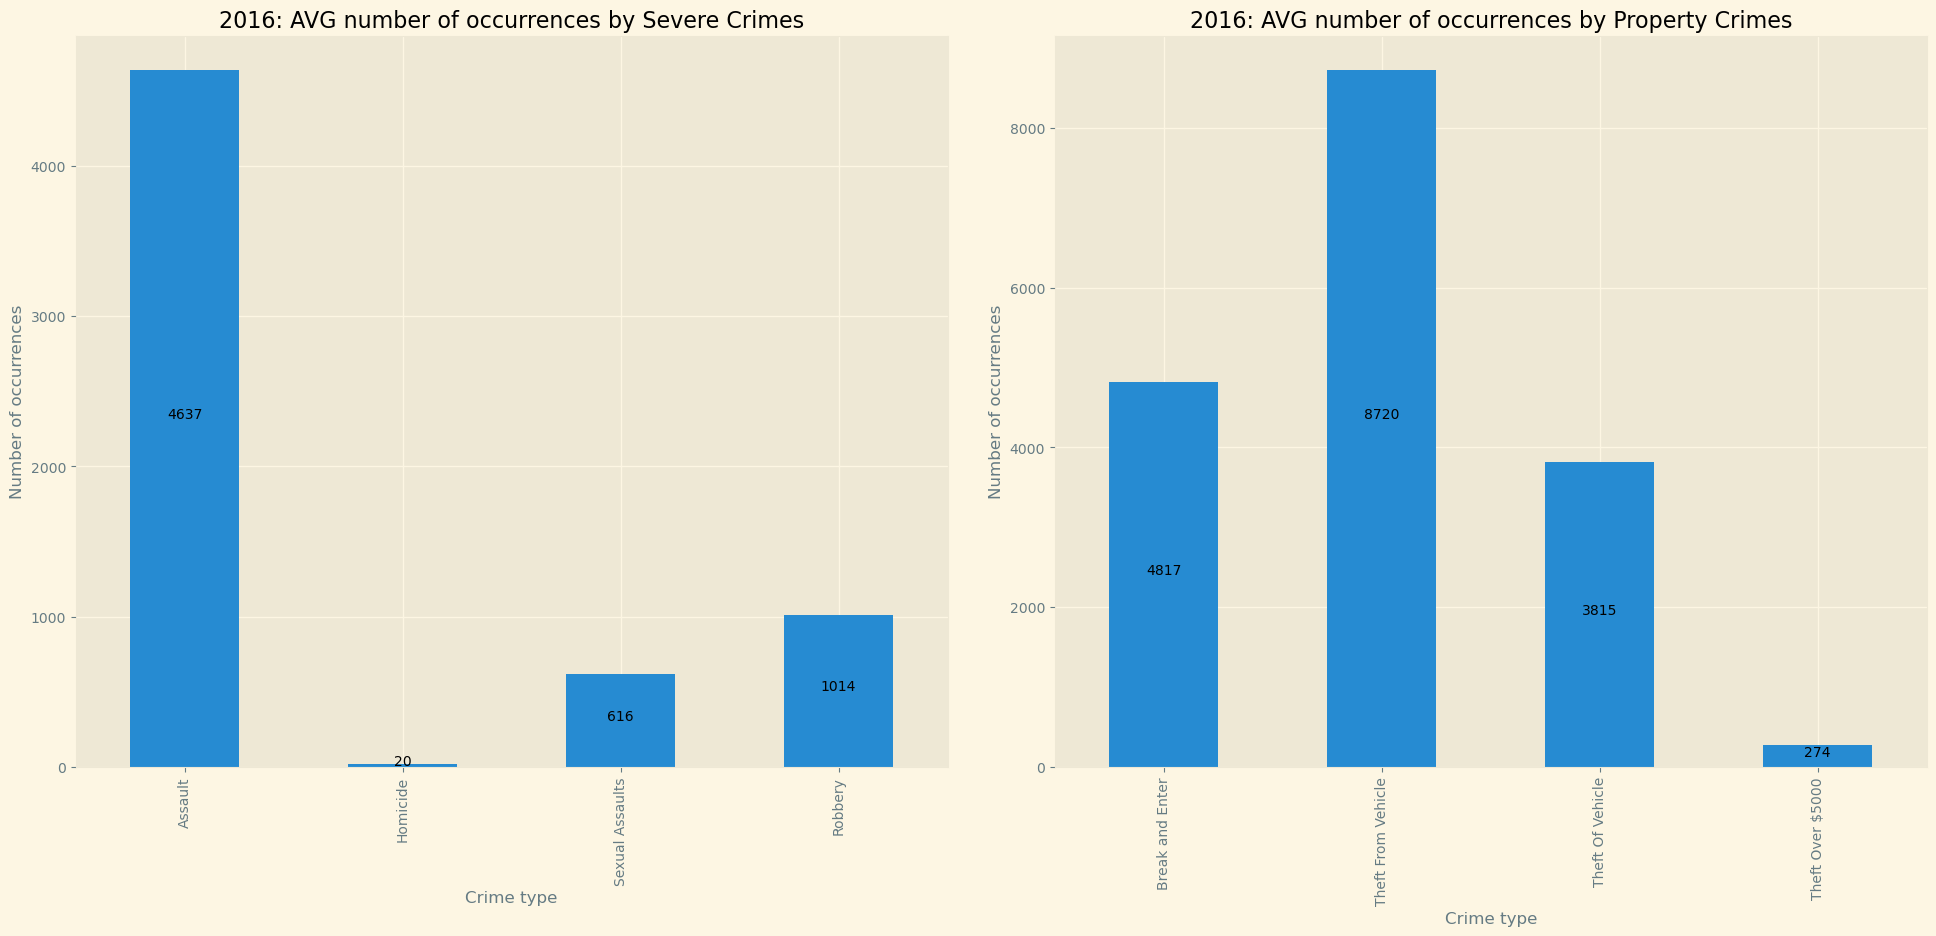

In [12]:
# create a grid with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the first subplot
pivot_table[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].sum().plot(kind='bar', ax=ax[0])
ax[0].set_title('2016: AVG number of occurrences by Severe Crimes')
ax[0].set_xlabel('Crime type')
ax[0].set_ylabel('Number of occurrences')

# add annotations to the bars in the first subplot
for i, v in enumerate(pivot_table[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].sum()):
    ax[0].text(i, v/2, str(v), ha='center', fontsize=10)

# plot the second subplot
pivot_table[['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].sum().plot(kind='bar', ax=ax[1])
ax[1].set_title('2016: AVG number of occurrences by Property Crimes')
ax[1].set_xlabel('Crime type')
ax[1].set_ylabel('Number of occurrences')

# add annotations to the bars in the second subplot
for i, v in enumerate(pivot_table[['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].sum()):
    ax[1].text(i, v/2, str(v), ha='center', fontsize=10)

# adjust the layout and spacing of the subplots
fig.tight_layout(pad=3)

# display the plot
plt.show()

The following chart shows the AVERAGE number of Occurences.

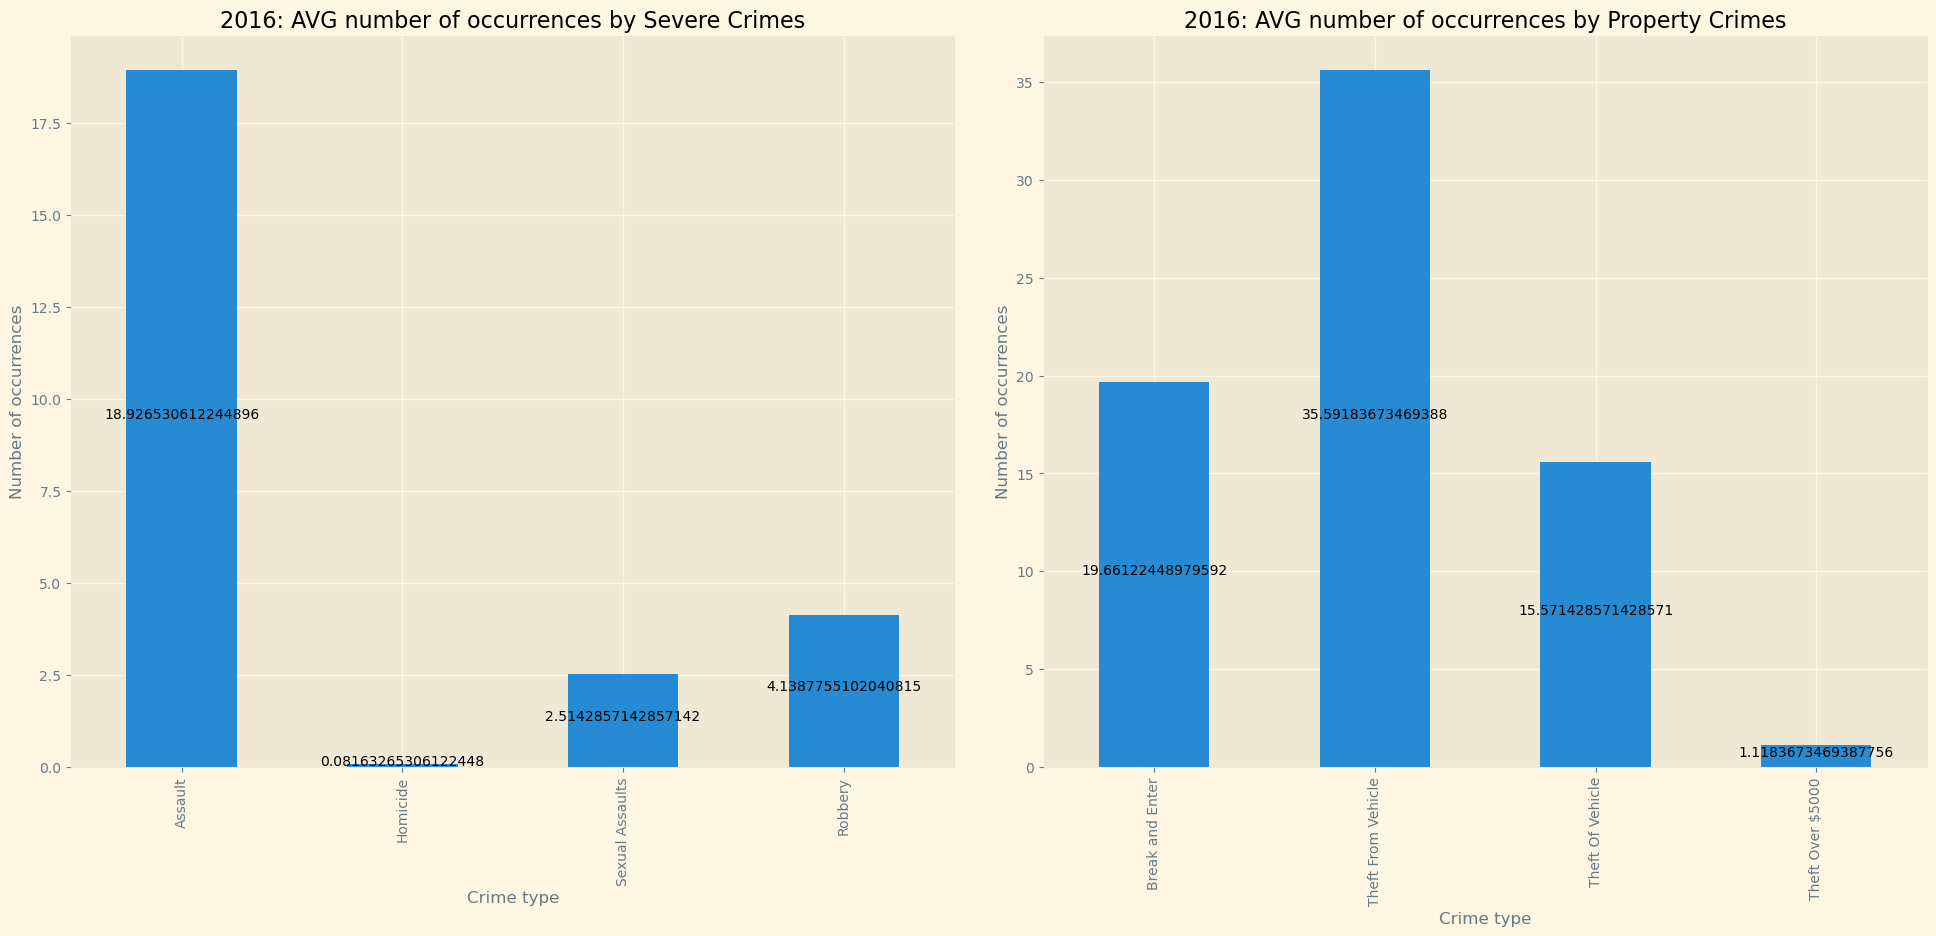

In [13]:
# create a grid with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the first subplot
pivot_table[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('2016: AVG number of occurrences by Severe Crimes')
ax[0].set_xlabel('Crime type')
ax[0].set_ylabel('Number of occurrences')

# add annotations to the bars in the first subplot
for i, v in enumerate(pivot_table[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].mean()):
    ax[0].text(i, v/2, str(v), ha='center', fontsize=10)

# plot the second subplot
pivot_table[['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('2016: AVG number of occurrences by Property Crimes')
ax[1].set_xlabel('Crime type')
ax[1].set_ylabel('Number of occurrences')

# add annotations to the bars in the second subplot
for i, v in enumerate(pivot_table[['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].mean()):
    ax[1].text(i, v/2, str(v), ha='center', fontsize=10)

# adjust the layout and spacing of the subplots
fig.tight_layout(pad=3)

# display the plot
plt.show()

>As we noticed earlier when looking at 2009-2019, we somewhat have the same pattern for 2016. The Violent Crime: Assault have the highest sum and means. Interesting to note, Property Crime: Theft From Vehicle is much higher. Wonder of this pattern is reflected in our Top 6 popular Neighbourhoods.

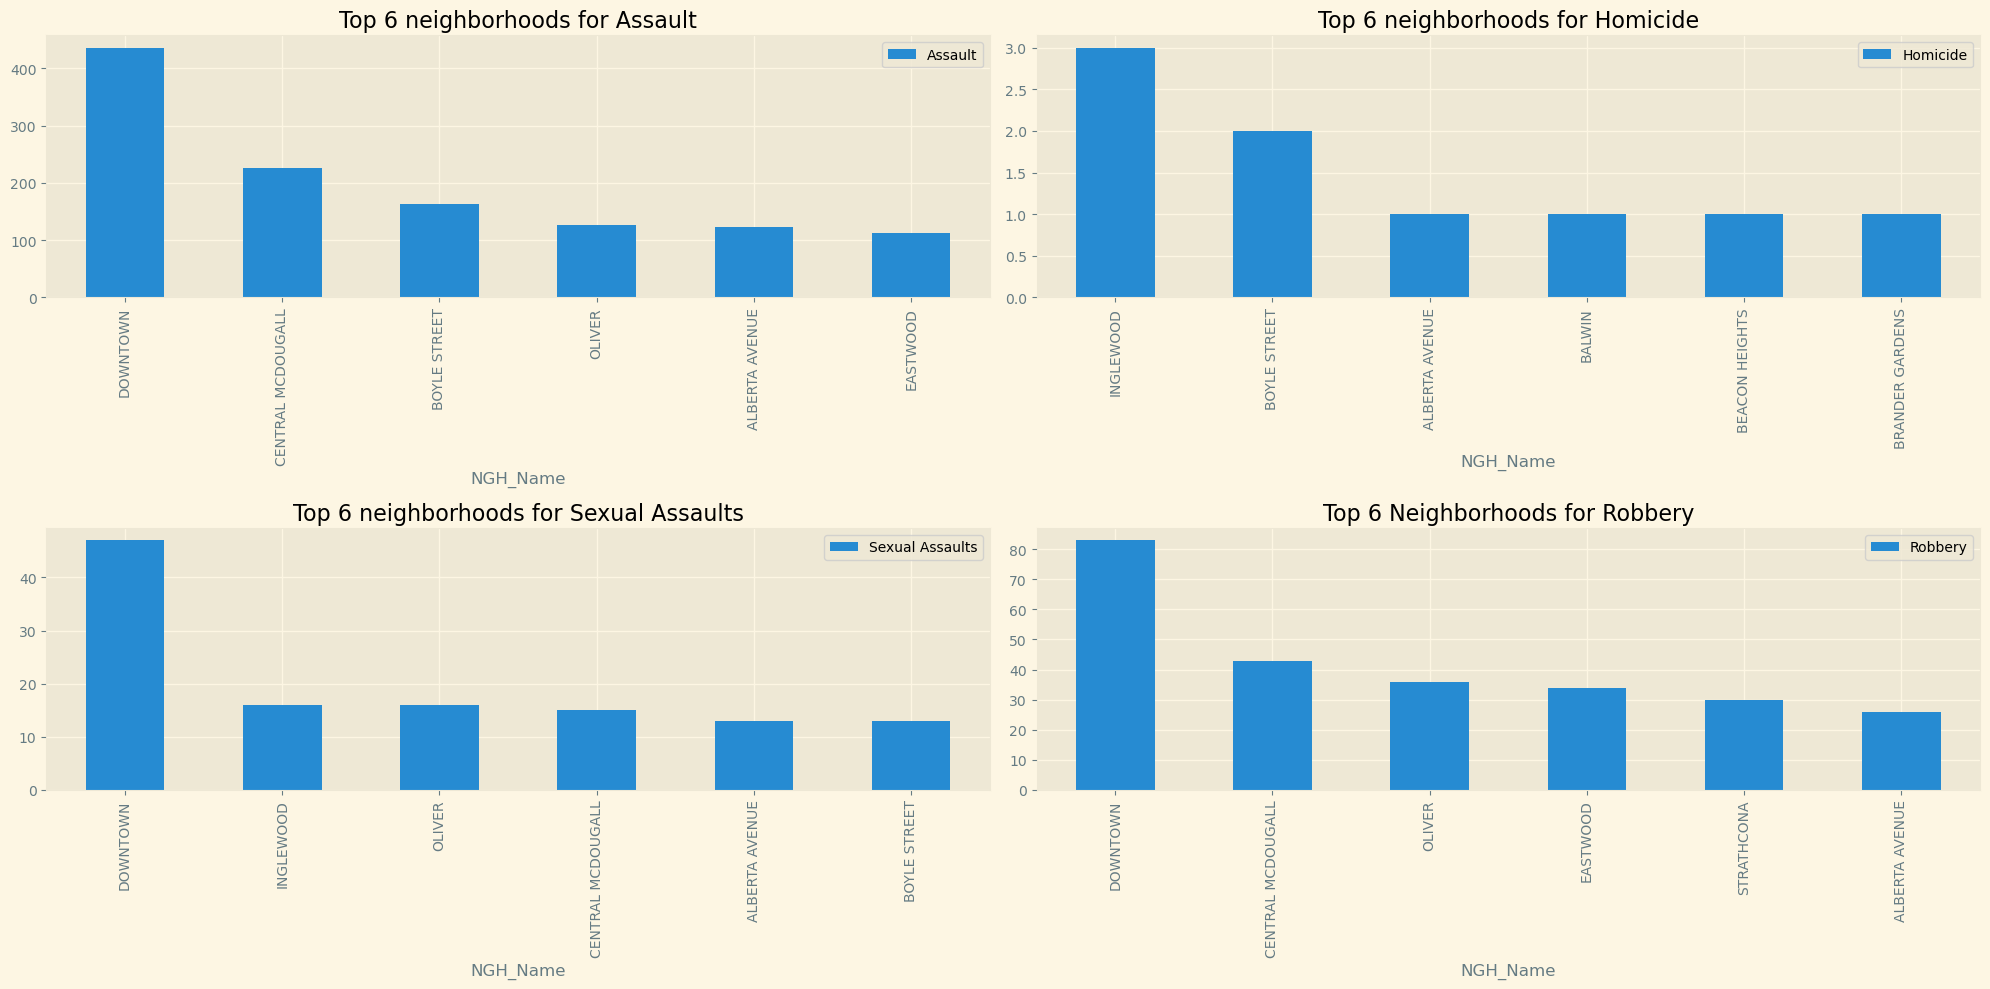

In [14]:
# Select the top 6 neighborhoods with the highest counts of each type of crime
assault_top6 = pivot_table.nlargest(6, 'Assault')
homicide_top6 = pivot_table.nlargest(6, 'Homicide')
sexual_assaults_top6 = pivot_table.nlargest(6, 'Sexual Assaults')
robbery_top6 = pivot_table.nlargest(6, 'Robbery')

# Create a bar plot of the total number of occurrences for each type of crime
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
assault_top6[['Assault']].plot(kind='bar', ax=axs[0, 0], title='Top 6 neighborhoods for Assault')
homicide_top6[['Homicide']].plot(kind='bar', ax=axs[0, 1], title='Top 6 neighborhoods for Homicide')
sexual_assaults_top6[['Sexual Assaults']].plot(kind='bar', ax=axs[1, 0], title='Top 6 neighborhoods for Sexual Assaults')
robbery_top6[['Robbery']].plot(kind='bar', ax=axs[1, 1], title='Top 6 Neighborhoods for Robbery')

plt.tight_layout()
plt.show()

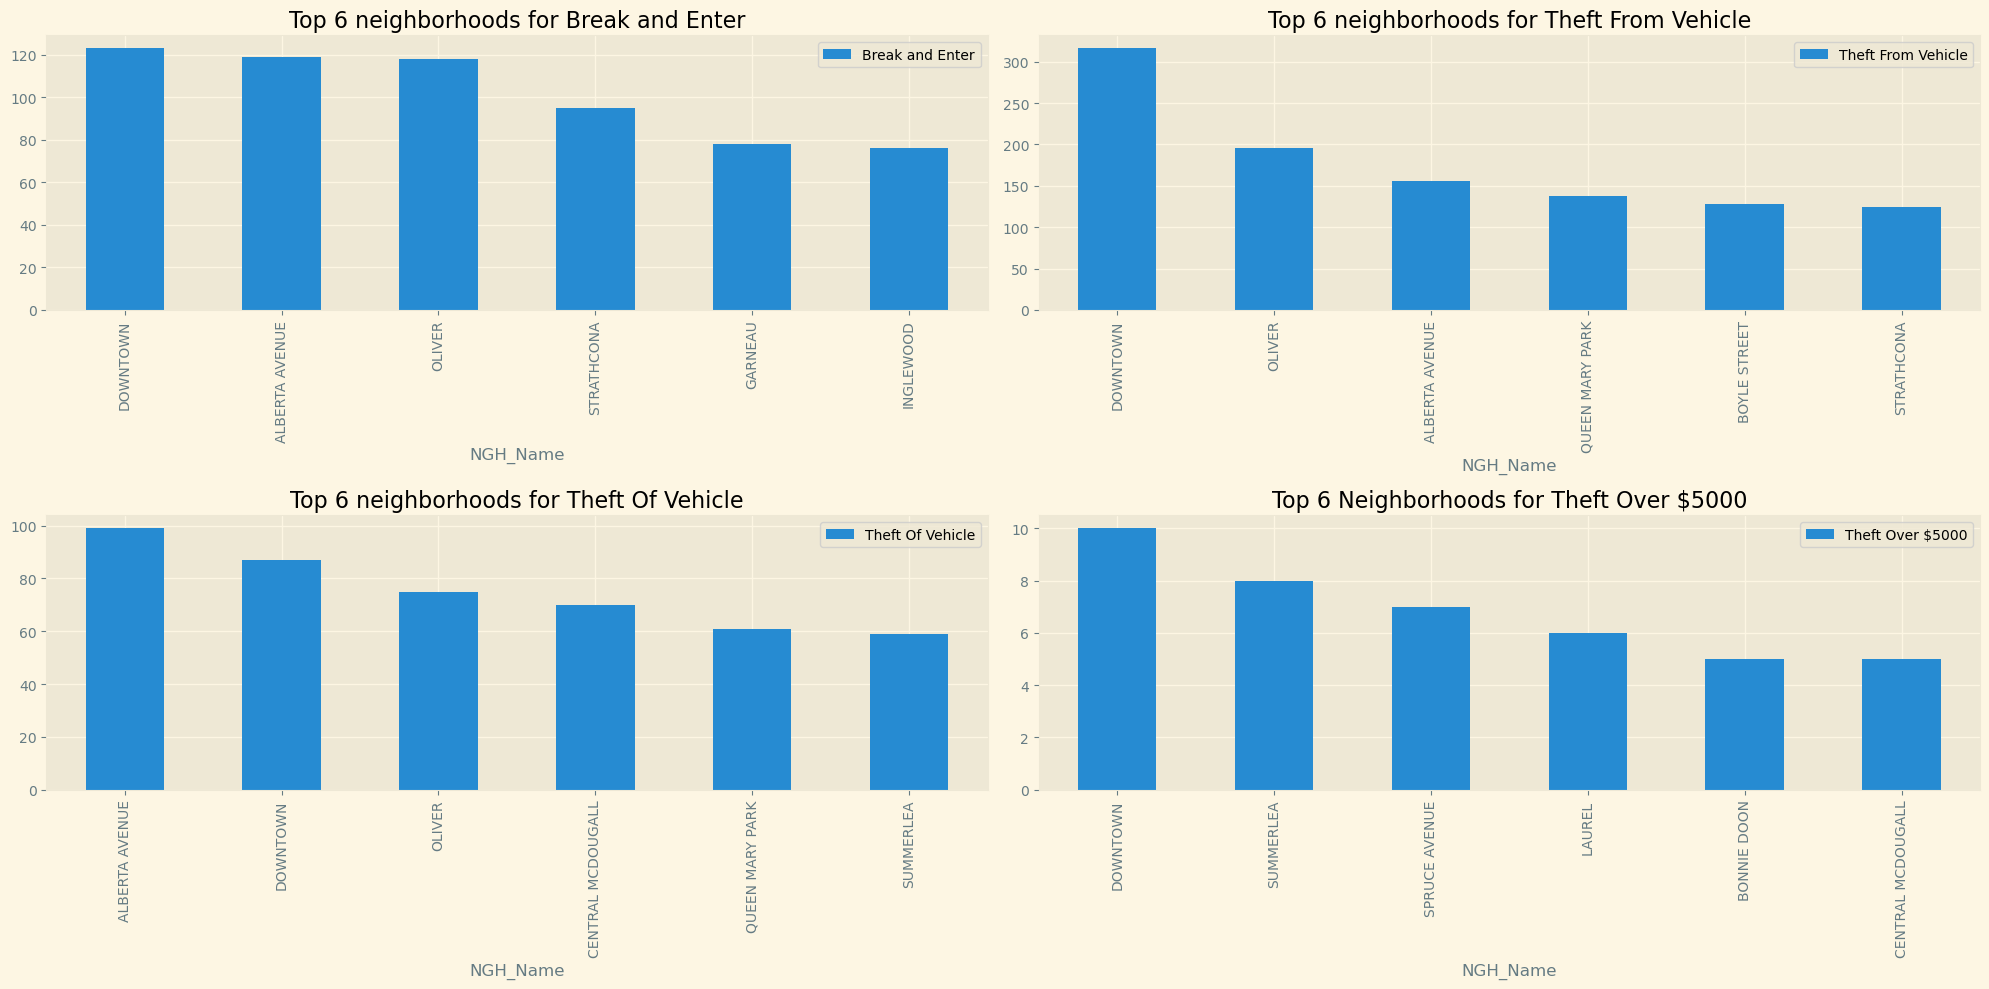

In [15]:
# Select the top 6 neighborhoods with the highest counts of each type of crime
break_and_enter_top6 = pivot_table.nlargest(6, 'Break and Enter')
theft_from_vehicle_top6 = pivot_table.nlargest(6, 'Theft From Vehicle')
theft_of_vehicle_top6 = pivot_table.nlargest(6, 'Theft Of Vehicle')
theft_over_5000_top6 = pivot_table.nlargest(6, 'Theft Over $5000')

# Create a bar plot of the total number of occurrences for each type of crime
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
break_and_enter_top6[['Break and Enter']].plot(kind='bar', ax=axs[0, 0], title='Top 6 neighborhoods for Break and Enter')
theft_from_vehicle_top6[['Theft From Vehicle']].plot(kind='bar', ax=axs[0, 1], title='Top 6 neighborhoods for Theft From Vehicle')
theft_of_vehicle_top6[['Theft Of Vehicle']].plot(kind='bar', ax=axs[1, 0], title='Top 6 neighborhoods for Theft Of Vehicle')
theft_over_5000_top6[['Theft Over $5000']].plot(kind='bar', ax=axs[1, 1], title='Top 6 Neighborhoods for Theft Over $5000')

plt.tight_layout()
plt.show()

>Oh!! We have some Industrial Area showing up in Property Crimes.

In [16]:
pivot_table = pivot_table.reset_index()
pivot_table

NGH_Name  Assault  Break and Enter  Homicide  Robbery  \
0      ABBOTTSFIELD       35                8         0        8   
1            ALBANY        8                8         0        2   
2    ALBERTA AVENUE      123              119         1       26   
3        ALDERGROVE       17               19         0        6   
4            ALLARD        6               17         0        1   
..              ...      ...              ...       ...      ...   
240        WESTWOOD       43               34         0        7   
241       WILD ROSE       14               15         0        2   
242      WINDERMERE        7               22         0        3   
243       WOODCROFT       30               22         0       13   
244            YORK       24               21         0        4   

     Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
0                  4                  16                 6                 0   
1                  2                   9                 2                 1   
2                 13                 156                99                 2   
3                  4                  46                23                 0   
4                  0                  12                 3                 4   
..               ...                 ...               ...               ...   
240                6                  53                48                 1   
241                2                  46                24                 1   
242                1                  31                 6                 4   
243                4                  40                20                 4   
244                2                  48                17                 4   

      Latitude  ...  Employment_No Response  Income_Less than $30K  \
0    53.574143  ...                   499.0                  206.0   
1    53.632382  ...                   445.0                   10.0   
2    53.568485  ...                  2342.0                  601.0   
3    53.516888  ...                  1110.0                  119.0   
4    53.401301  ...                  1495.0                    4.0   
..         ...  ...                     ...                    ...   
240  53.575942  ...                  1346.0                  381.0   
241  53.470564  ...                  3020.0                   32.0   
242  53.432563  ...                  3618.0                   37.0   
243  53.564595  ...                   523.0                  214.0   
244  53.602843  ...                   843.0                  148.0   

     Income_30K to less than 60K  Income_60K to less than 100K  \
0                          170.0                          79.0   
1                           56.0                          63.0   
2                          667.0                         364.0   
3                          266.0                         284.0   
4                           48.0                         165.0   
..                           ...                           ...   
240                        321.0                         124.0   
241                        198.0                         273.0   
242                        144.0                         271.0   
243                        121.0                         107.0   
244                        297.0                         271.0   

     Income_100K to less than 125K  Income_125K to less than 150K  \
0                             23.0                            4.0   
1                             30.0                            9.0   
2                            139.0                           62.0   
3                            135.0                           72.0   
4                            109.0                           48.0   
..                             ...                            ...   
240                           36.0                           22.0   
241                          125.0             

Save the Pivoted_table dataframe

In [17]:
pivot_table.to_csv('March20_2023.csv')
df2=pd.read_csv('March20_2023.csv', encoding_errors='ignore')
df2.drop(['Unnamed: 0'], axis=1, inplace =True)
df2

NGH_Name  Assault  Break and Enter  Homicide  Robbery  \
0      ABBOTTSFIELD       35                8         0        8   
1            ALBANY        8                8         0        2   
2    ALBERTA AVENUE      123              119         1       26   
3        ALDERGROVE       17               19         0        6   
4            ALLARD        6               17         0        1   
..              ...      ...              ...       ...      ...   
240        WESTWOOD       43               34         0        7   
241       WILD ROSE       14               15         0        2   
242      WINDERMERE        7               22         0        3   
243       WOODCROFT       30               22         0       13   
244            YORK       24               21         0        4   

     Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
0                  4                  16                 6                 0   
1                  2                   9                 2                 1   
2                 13                 156                99                 2   
3                  4                  46                23                 0   
4                  0                  12                 3                 4   
..               ...                 ...               ...               ...   
240                6                  53                48                 1   
241                2                  46                24                 1   
242                1                  31                 6                 4   
243                4                  40                20                 4   
244                2                  48                17                 4   

      Latitude  ...  Employment_No Response  Income_Less than $30K  \
0    53.574143  ...                   499.0                  206.0   
1    53.632382  ...                   445.0                   10.0   
2    53.568485  ...                  2342.0                  601.0   
3    53.516888  ...                  1110.0                  119.0   
4    53.401301  ...                  1495.0                    4.0   
..         ...  ...                     ...                    ...   
240  53.575942  ...                  1346.0                  381.0   
241  53.470564  ...                  3020.0                   32.0   
242  53.432563  ...                  3618.0                   37.0   
243  53.564595  ...                   523.0                  214.0   
244  53.602843  ...                   843.0                  148.0   

     Income_30K to less than 60K  Income_60K to less than 100K  \
0                          170.0                          79.0   
1                           56.0                          63.0   
2                          667.0                         364.0   
3                          266.0                         284.0   
4                           48.0                         165.0   
..                           ...                           ...   
240                        321.0                         124.0   
241                        198.0                         273.0   
242                        144.0                         271.0   
243                        121.0                         107.0   
244                        297.0                         271.0   

     Income_100K to less than 125K  Income_125K to less than 150K  \
0                             23.0                            4.0   
1                             30.0                            9.0   
2                            139.0                           62.0   
3                            135.0                           72.0   
4                            109.0                           48.0   
..                             ...                            ...   
240                           36.0                           22.0   
241                          125.0             

>Now lets look at the dataframe with Property Assessment Values

In [18]:
prop=pd.read_csv('Edmonton Historical Prpty Assmnts.csv')
#We will only look at the year 2016.
prop2016=prop[prop['Assessment Year']==2016]
# Only use Residential
#prop2016=prop2016[prop2016['Assessment Class 1']=='RESIDENTIAL']
#Drop the columns we do not need.
prop2016.drop(['Suite', 'House Number', 'Account Number','Street Name', 'Legal Description', 'Latitude', 'Longitude', 'Point Location', 'Assessment Year'], axis=1, inplace =True)
prop2016.drop(['Lot Size', 'Assessment Class % 1', 'Assessment Class 2', 'Assessment Class % 2', 'Assessment Class 3', 'Assessment Class % 3', 'Actual Year Built', 'Zoning'], axis=1, inplace =True)
prop2016.rename(columns={'Neighbourhood':'NGH_Name', }, inplace=True)
display('Dataset Information:', prop2016.info())
print()
display('Null Values?:', prop2016.isnull().sum())
prop2016.head(5)

C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\2330843994.py:1: DtypeWarning: Columns (2,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  prop=pd.read_csv('Edmonton Historical Prpty Assmnts.csv')
C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\2330843994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop2016.drop(['Suite', 'House Number', 'Account Number','Street Name', 'Legal Description', 'Latitude', 'Longitude', 'Point Location', 'Assessment Year'], axis=1, inplace =True)
C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\2330843994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381025 entries, 35 to 4109010
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NGH_Name            381025 non-null  object 
 1   Garage              381025 non-null  object 
 2   Assessed Value      381025 non-null  float64
 3   Assessment Class 1  381025 non-null  object 
dtypes: float64(1), object(3)
memory usage: 14.5+ MB


'Dataset Information:'

None

'Null Values?:'

NGH_Name              0
Garage                0
Assessed Value        0
Assessment Class 1    0
dtype: int64

NGH_Name Garage  Assessed Value Assessment Class 1
35           OLIVER      N        339000.0        RESIDENTIAL
36         GROVENOR      N         98000.0        RESIDENTIAL
50       MACTAGGART      N         76000.0        RESIDENTIAL
74           OLIVER      N        234500.0        RESIDENTIAL
92  QUEEN ALEXANDRA      N         24500.0        RESIDENTIAL

In [19]:
prop2016['NGH_Name'].value_counts()

OLIVER                    11802
DOWNTOWN                   8974
WINDERMERE                 5288
RUTHERFORD                 5129
SUMMERSIDE                 4932
                          ...  
CRYSTALLINA NERA EAST         2
MILL WOODS GOLF COURSE        2
PIPELINES OIL FIELD           2
YELLOWHEAD CORRIDOR           1
TERWILLEGAR AREA              1
Name: NGH_Name, Length: 393, dtype: int64

In [20]:
"""In order to be able to merge with our pivoted_tabkle dataframe, we need to group the neighborhoods in prop2016..
 and aggregate the Assessed Value column to show the mean values."""
prop2016_agg = prop2016.groupby('NGH_Name').agg({'Assessed Value': 'mean'})
prop2016_agg

Assessed Value
NGH_Name                                
ABBOTTSFIELD                3.463406e+05
ALBANY                      3.492812e+05
ALBERTA AVENUE              2.806964e+05
ALBERTA PARK INDUSTRIAL     3.286137e+06
ALDERGROVE                  3.689508e+05
...                                  ...
YELLOWHEAD CORRIDOR         1.447736e+06
YELLOWHEAD CORRIDOR EAST    1.371441e+06
YELLOWHEAD CORRIDOR WEST    9.298375e+06
YORK                        3.824538e+05
YOUNGSTOWN INDUSTRIAL       4.797202e+06

[393 rows x 1 columns]

In [21]:
# Merge df2 and prop2016_agg on NGH_Name
merged_df = pd.merge(df2, prop2016_agg, on='NGH_Name', how='left')

# Display the first few rows of the merged dataframe
merged_df.isnull().sum()

NGH_Name                         0
Assault                          0
Break and Enter                  0
Homicide                         0
Robbery                          0
Sexual Assaults                  0
Theft From Vehicle               0
Theft Of Vehicle                 0
Theft Over $5000                 0
Latitude                         0
Longitude                        0
Preschool                        0
Kindergarten                     0
Gr7-9                            0
Gr10-12                          0
Post-Secondary                   0
Homemaker                        0
Employed 0-30                    0
Employed 30+                     0
Unemployed                       0
Retired                          0
Permanently Unemployed           0
Employment_No Response           0
Income_Less than $30K            0
Income_30K to less than 60K      0
Income_60K to less than 100K     0
Income_100K to less than 125K    0
Income_125K to less than 150K    0
Income_150K to less 

In [22]:
# We have 2 Neighborhoods with null values for Assessment- what are they?
null_values = merged_df[merged_df['Assessed Value'].isnull()]['NGH_Name']
null_values

184          RAPPERSWILL
237    WESTBROOK ESTATES
Name: NGH_Name, dtype: object

In [23]:
# We can delete/drop them
merged_df.dropna(inplace=True)
merged_df

NGH_Name  Assault  Break and Enter  Homicide  Robbery  \
0      ABBOTTSFIELD       35                8         0        8   
1            ALBANY        8                8         0        2   
2    ALBERTA AVENUE      123              119         1       26   
3        ALDERGROVE       17               19         0        6   
4            ALLARD        6               17         0        1   
..              ...      ...              ...       ...      ...   
240        WESTWOOD       43               34         0        7   
241       WILD ROSE       14               15         0        2   
242      WINDERMERE        7               22         0        3   
243       WOODCROFT       30               22         0       13   
244            YORK       24               21         0        4   

     Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
0                  4                  16                 6                 0   
1                  2                   9                 2                 1   
2                 13                 156                99                 2   
3                  4                  46                23                 0   
4                  0                  12                 3                 4   
..               ...                 ...               ...               ...   
240                6                  53                48                 1   
241                2                  46                24                 1   
242                1                  31                 6                 4   
243                4                  40                20                 4   
244                2                  48                17                 4   

      Latitude  ...  Income_Less than $30K  Income_30K to less than 60K  \
0    53.574143  ...                  206.0                        170.0   
1    53.632382  ...                   10.0                         56.0   
2    53.568485  ...                  601.0                        667.0   
3    53.516888  ...                  119.0                        266.0   
4    53.401301  ...                    4.0                         48.0   
..         ...  ...                    ...                          ...   
240  53.575942  ...                  381.0                        321.0   
241  53.470564  ...                   32.0                        198.0   
242  53.432563  ...                   37.0                        144.0   
243  53.564595  ...                  214.0                        121.0   
244  53.602843  ...                  148.0                        297.0   

     Income_60K to less than 100K  Income_100K to less than 125K  \
0                            79.0                           23.0   
1                            63.0                           30.0   
2                           364.0                          139.0   
3                           284.0                          135.0   
4                           165.0                          109.0   
..                            ...                            ...   
240                         124.0                           36.0   
241                         273.0                          125.0   
242                         271.0                          137.0   
243                         107.0                           32.0   
244                         271.0                          103.0   

     Income_125K to less than 150K  Income_150K to less than 200K  \
0                              4.0                            3.0   
1                              9.0                           14.0   
2                             62.0                           61.0   
3                             72.0                           49.0   
4                             48.0                           69.0   
..                             ...                            ...   
240                           22

In [24]:
merged_df.to_csv('merged_df_March24_2023.csv')
final=pd.read_csv('merged_df_March24_2023.csv', encoding_errors='ignore')
final.drop(['Unnamed: 0'], axis=1, inplace =True)
final.head(5)


NGH_Name  Assault  Break and Enter  Homicide  Robbery  \
0    ABBOTTSFIELD       35                8         0        8   
1          ALBANY        8                8         0        2   
2  ALBERTA AVENUE      123              119         1       26   
3      ALDERGROVE       17               19         0        6   
4          ALLARD        6               17         0        1   

   Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
0                4                  16                 6                 0   
1                2                   9                 2                 1   
2               13                 156                99                 2   
3                4                  46                23                 0   
4                0                  12                 3                 4   

    Latitude  ...  Income_Less than $30K  Income_30K to less than 60K  \
0  53.574143  ...                  206.0                        170.0   
1  53.632382  ...                   10.0                         56.0   
2  53.568485  ...                  601.0                        667.0   
3  53.516888  ...                  119.0                        266.0   
4  53.401301  ...                    4.0                         48.0   

   Income_60K to less than 100K  Income_100K to less than 125K  \
0                          79.0                           23.0   
1                          63.0                           30.0   
2                         364.0                          139.0   
3                         284.0                          135.0   
4                         165.0                          109.0   

   Income_125K to less than 150K  Income_150K to less than 200K  \
0                            4.0                            3.0   
1                            9.0                           14.0   
2                           62.0                           61.0   
3                           72.0                           49.0   
4                           48.0                           69.0   

   Income_200K to less than 250K  Income_250K or more  Income_No Response  \
0                            3.0                  2.0               195.0   
1                           13.0                  3.0               350.0   
2                           11.0                  4.0              1138.0   
3                           22.0                 12.0               952.0   
4                           32.0                 23.0               560.0   

   Assessed Value  
0   346340.616967  
1   349281.212842  
2   280696.449473  
3   368950.794621  
4   377596.339603  

[5 rows x 33 columns]

Lets look at the distribution of the column Assessed Value

In [25]:
final['Assessed Value'].describe()

count    2.430000e+02
mean     4.408666e+05
std      1.955941e+05
min      1.647495e+05
25%      3.463589e+05
50%      4.020394e+05
75%      4.769844e+05
max      2.326443e+06
Name: Assessed Value, dtype: float64

What about the distribution of Assessed Values for 2016

<AxesSubplot:xlabel='Assessed Value', ylabel='Count'>

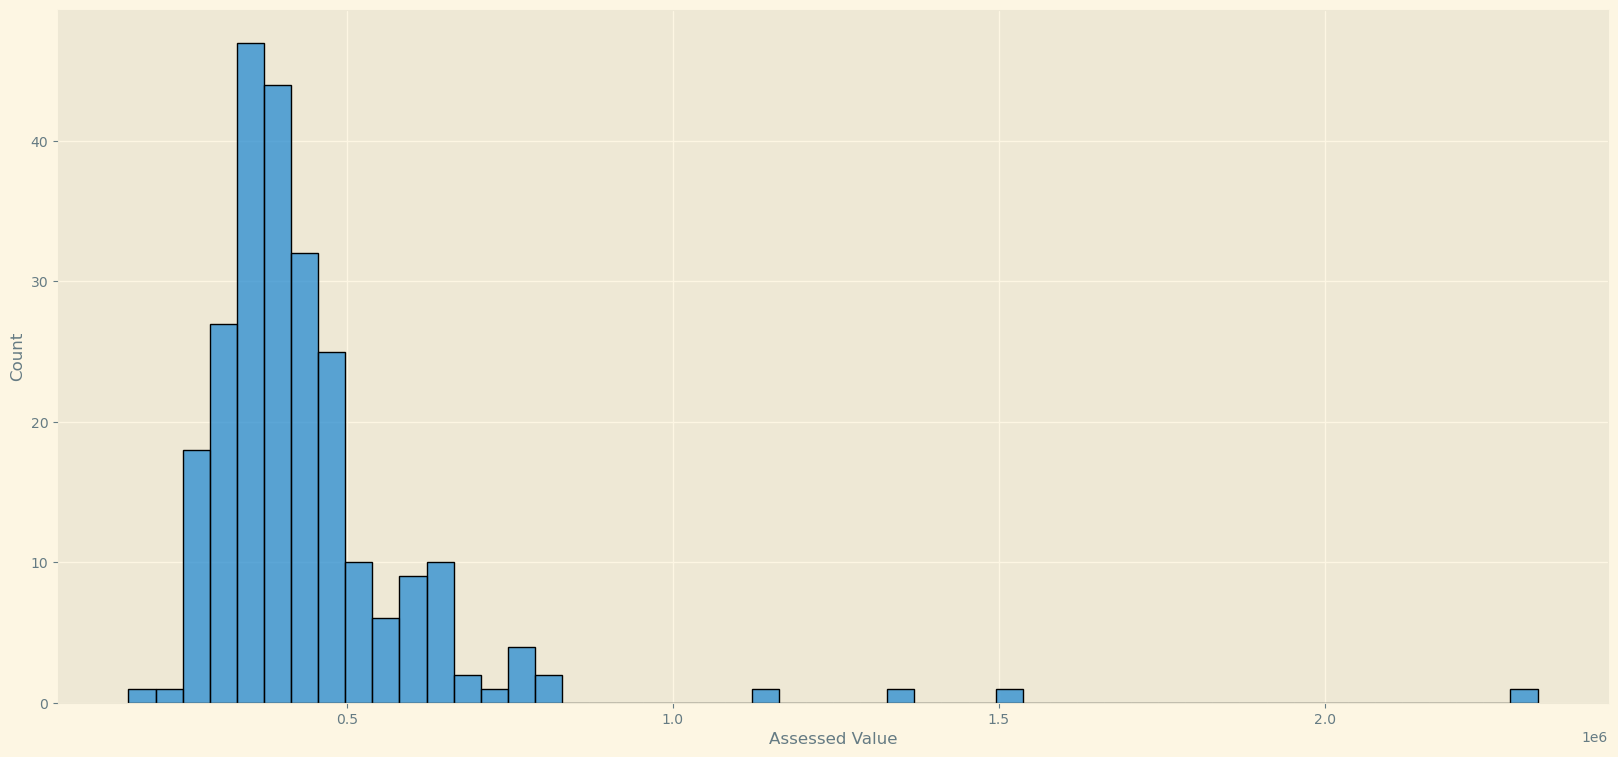

In [26]:
sns.histplot(final['Assessed Value'])

>Analysis/Investigation based on Correlation

In [27]:
final.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Assessed Value'],
      dtype='object')

Correlation?

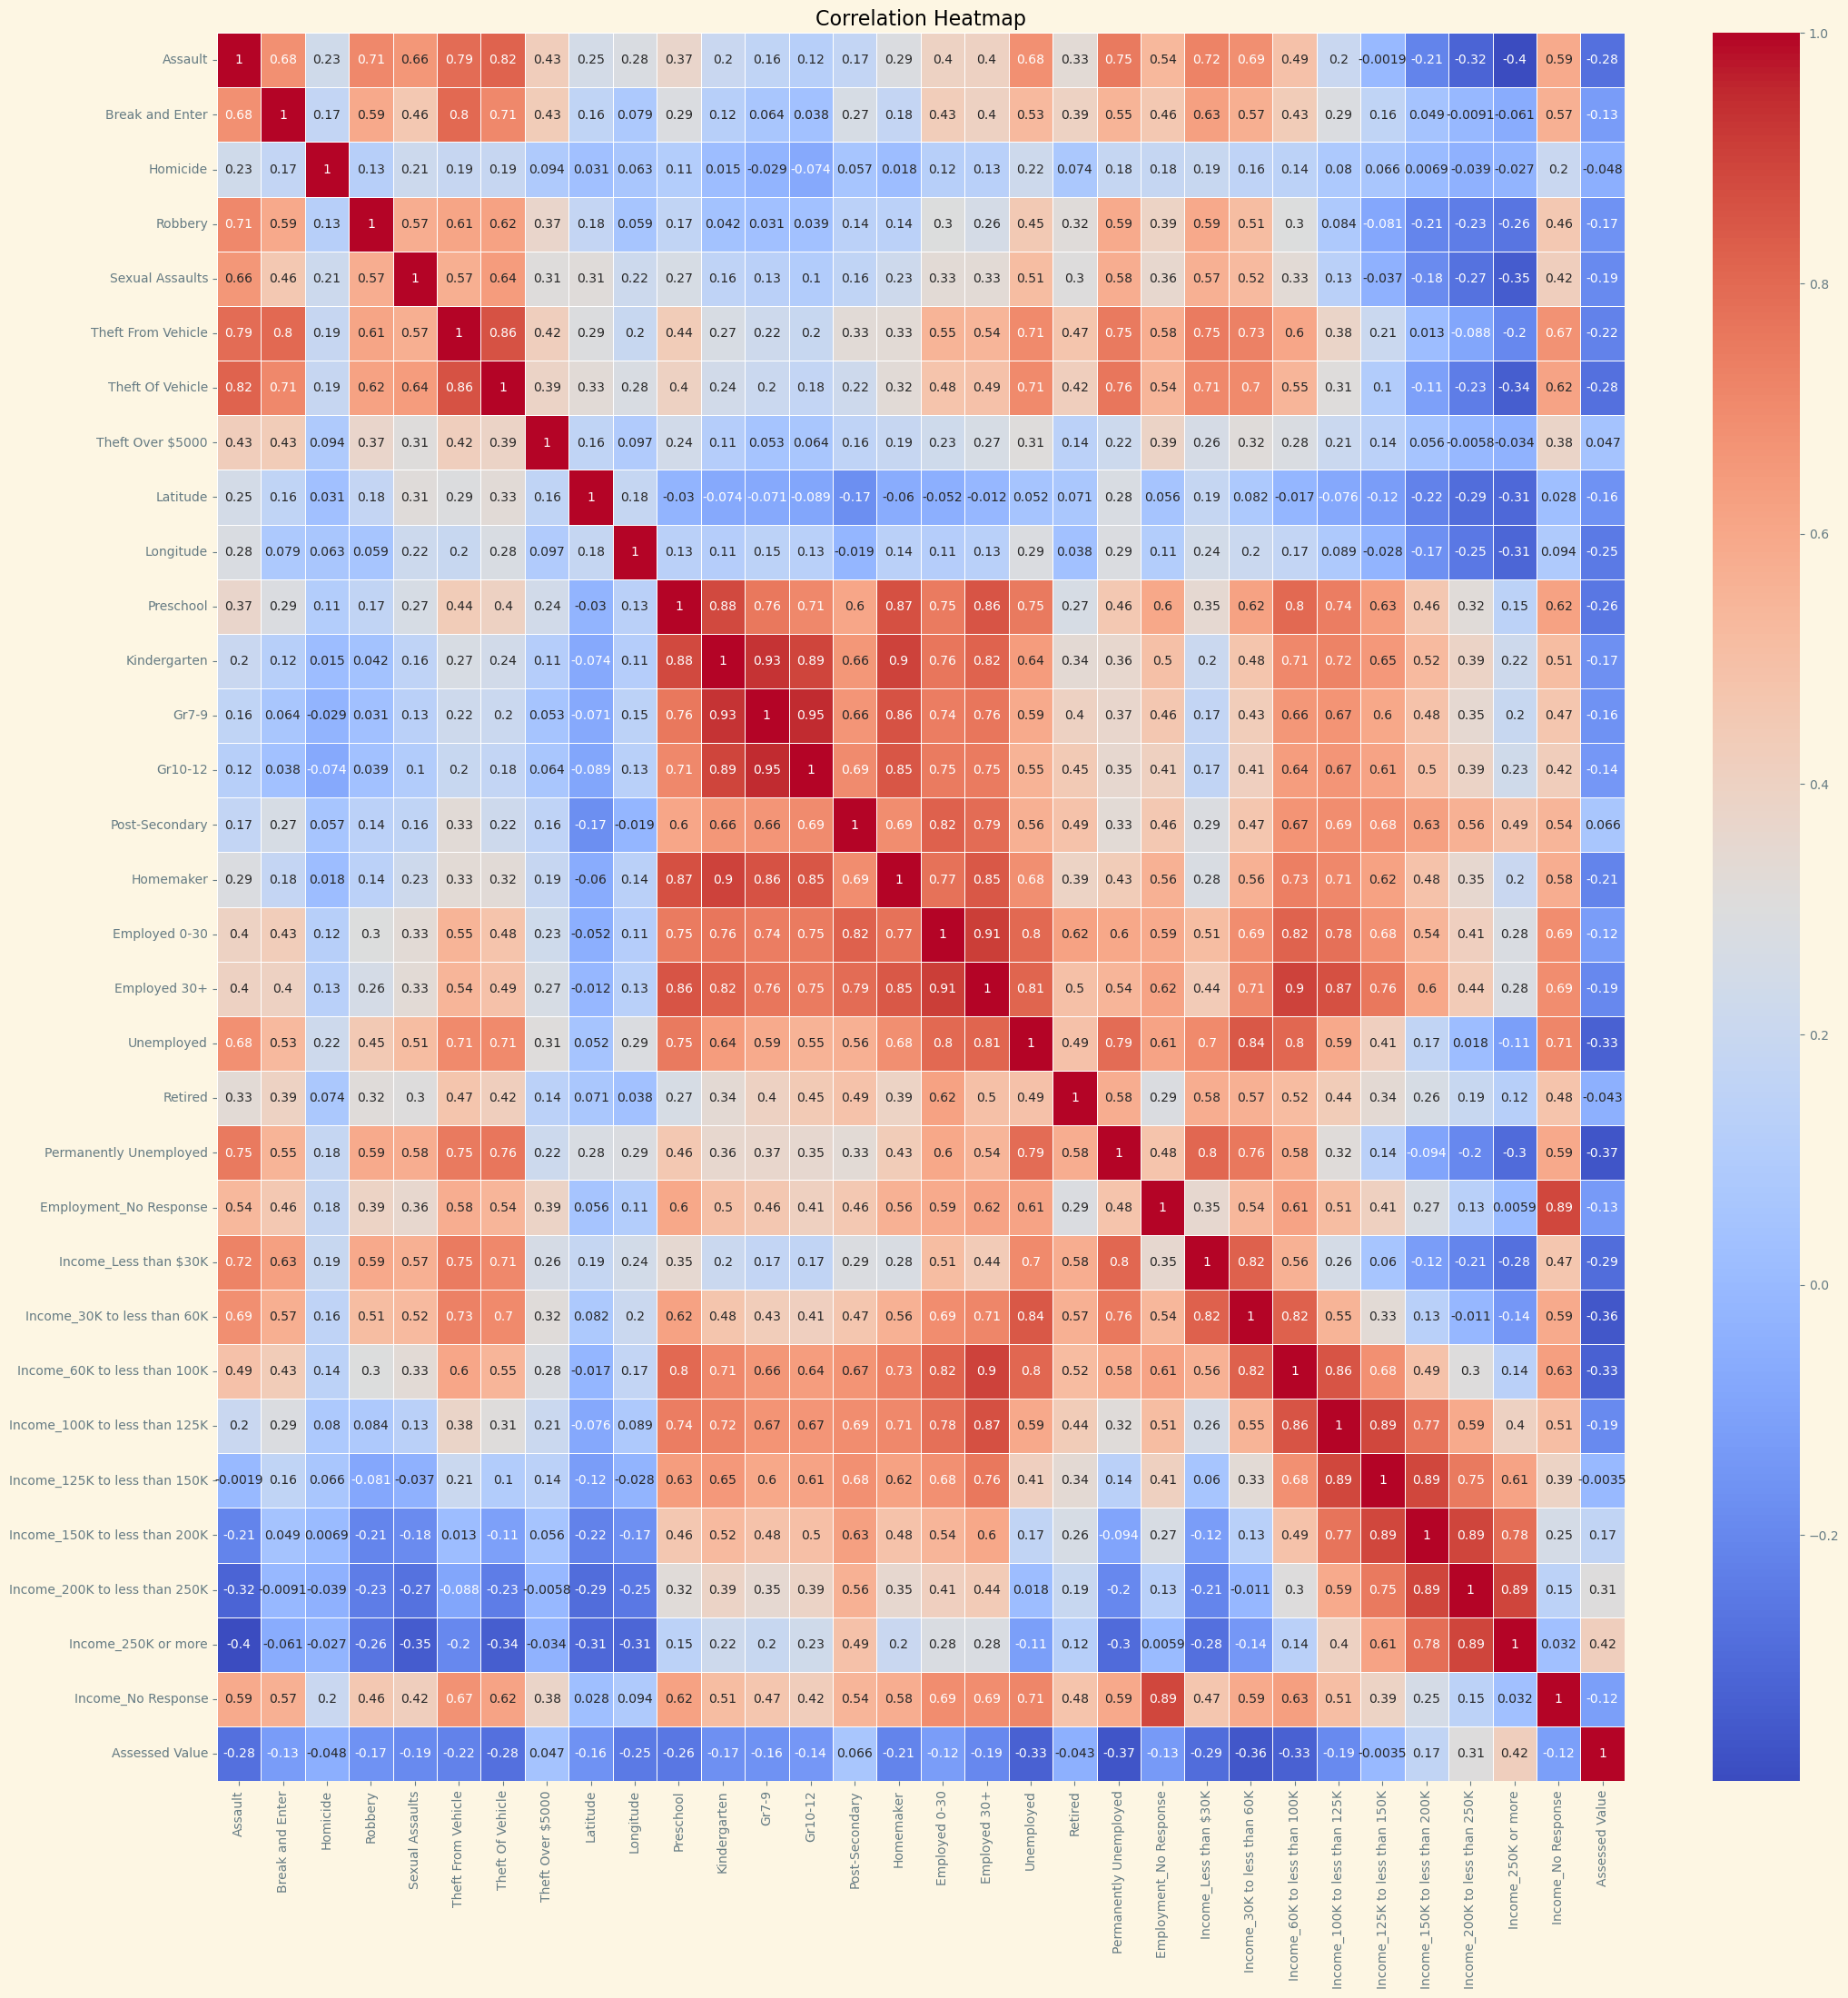

In [28]:
corr_matrix = final.corr(method='spearman')

# Create a heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [29]:
# Exclude the 'Income_No Response' column from the correlation matrix
corr_matrix = final.drop('Income_No Response', axis=1).corr()

# Transform the matrix into a Series of pairwise correlations
corr_series = corr_matrix.stack()

# Filter the Series to include only pairs with a correlation greater than 0.5
high_corr_pairs = corr_series[(corr_series.abs() > 0.75) & ~(corr_series.index.get_level_values(0) == 'Income_No Response') & ~(corr_series.index.get_level_values(1) == 'Income_No Response')]

# Print the high correlation pairs
print(high_corr_pairs)

Assault                        Assault                          1.000000
                               Robbery                          0.921406
                               Sexual Assaults                  0.879468
                               Theft From Vehicle               0.863739
                               Theft Of Vehicle                 0.758669
                                                                  ...   
Income_200K to less than 250K  Income_200K to less than 250K    1.000000
                               Income_250K or more              0.836441
Income_250K or more            Income_200K to less than 250K    0.836441
                               Income_250K or more              1.000000
Assessed Value                 Assessed Value                   1.000000
Length: 129, dtype: float64


In [30]:
"""This function uses the pandas corr() method to calculate the correlations between the target column and all other columns in the dataframe. 
    It then drops the target column from the list of correlations and gets the top 3 correlations (positive or negative) using the nlargest() method. 
    Finally, it prints the names of the top 3 correlated columns and their correlation sign (positive or negative) along with the correlation value."""

def get_top_correlations(data, target_column):
    # Calculate the correlations between the target column and all other columns
    correlations = data.corr(method='spearman')[target_column].sort_values(ascending=False)
    
    # Drop the target column from the list of correlations
    correlations = correlations.drop(target_column)
    
    # Get the top 3 correlations (positive or negative)
    top_correlations = correlations.abs().nlargest(4)
    
    # Print the top 3 correlations and their sign
    for column, correlation in top_correlations.items():
        sign = 'positive' if correlations[column] > 0 else 'negative'
        print(f"{column}: {sign} correlation ({correlation:.2f})")

In [31]:
get_top_correlations(final, 'Assessed Value')

Income_250K or more: positive correlation (0.42)
Permanently Unemployed: negative correlation (0.37)
Income_30K to less than 60K: negative correlation (0.36)
Unemployed: negative correlation (0.33)


These results suggest that there are some interesting relationships between assessed property values and other variables in the final DataFrame. Here are a few possible interpretations:

Higher-income neighborhoods tend to have higher assessed property values. This is indicated by the positive correlation between Assessed Value and Income_250K or more. It's possible that this correlation reflects the fact that more affluent neighborhoods tend to have more expensive homes and properties, which are valued higher for property tax purposes.

Unemployment and low income are negatively associated with assessed property values. This is indicated by the negative correlations between Assessed Value and Permanently Unemployed, Income_30K to less than 60K, and Unemployed. It's possible that these correlations reflect the fact that neighborhoods with higher rates of unemployment and lower median incomes tend to have less valuable homes and properties, which are valued lower for property tax purposes.

Overall, these results suggest that there are important relationships between assessed property values and other socioeconomic variables in the final DataFrame. It's important to note, however, that correlation does not necessarily imply causation, and further analysis would be needed to fully understand the relationships between these variables.

In [32]:
get_top_correlations(final, 'Assault')

Theft Of Vehicle: positive correlation (0.82)
Theft From Vehicle: positive correlation (0.79)
Permanently Unemployed: positive correlation (0.75)
Income_Less than $30K: positive correlation (0.72)


These results suggest that there are some interesting relationships between assault rates and other variables in the final DataFrame. Here are a few possible interpretations:

Areas with higher rates of theft from and theft of vehicles tend to also have higher rates of assault. This is indicated by the positive correlations between Assault and Theft Of Vehicle (0.82) and Theft From Vehicle (0.79). It's possible that this correlation reflects the fact that areas with higher rates of property crime may also have higher rates of violent crime.

Areas with higher rates of permanent unemployment and lower median incomes tend to have higher rates of assault. This is indicated by the positive correlations between Assault and Permanently Unemployed (0.75) and Income_Less than $30K (0.72). It's possible that this correlation reflects the fact that areas with higher rates of poverty and unemployment may also have higher rates of violent crime.

Overall, these results suggest that there are important relationships between assault rates and other socioeconomic variables in the final DataFrame. However, as with the previous analysis, correlation does not necessarily imply causation, and further analysis would be needed to fully understand the relationships between these variables.

In [33]:
get_top_correlations(final, 'Theft From Vehicle')

Theft Of Vehicle: positive correlation (0.86)
Break and Enter: positive correlation (0.80)
Assault: positive correlation (0.79)
Permanently Unemployed: positive correlation (0.75)


These results suggest that there are some interesting relationships between theft from vehicles and other variables in the final DataFrame. Here are a few possible interpretations:

Areas with higher rates of theft from vehicles tend to also have higher rates of theft of vehicles and break and enter. This is indicated by the positive correlations between Theft From Vehicle and Theft Of Vehicle (0.86) and Break and Enter (0.80). It's possible that this correlation reflects the fact that areas with higher rates of property crime may have more than one type of property crime.

Areas with higher rates of theft from vehicles also tend to have higher rates of assault. This is indicated by the positive correlation between Theft From Vehicle and Assault (0.79). It's possible that this correlation reflects the fact that areas with higher rates of property crime may also have higher rates of violent crime.

Areas with higher rates of permanent unemployment tend to have higher rates of theft from vehicles. This is indicated by the positive correlation between Theft From Vehicle and Permanently Unemployed (0.75). It's possible that this correlation reflects the fact that areas with higher rates of poverty and unemployment may have higher rates of property crime.

Overall, these results suggest that there are important relationships between theft from vehicle rates and other variables in the final DataFrame. However, as with the previous analyses, correlation does not necessarily imply causation, and further analysis would be needed to fully understand the relationships between these variables.

In [34]:
get_top_correlations(final, 'Robbery')

Assault: positive correlation (0.71)
Theft Of Vehicle: positive correlation (0.62)
Theft From Vehicle: positive correlation (0.61)
Income_Less than $30K: positive correlation (0.59)


For 'Robbery', you found that higher counts were positively correlated with counts of assault, theft of vehicle, theft from vehicle, and having an income less than 30K.

>Investigate Further

In [35]:
property_crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']
severe_crime = ['Assault', 'Homicide', 'Robbery', 'Sexual Assaults']
income_levels = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                     'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                     'Income_200K to less than 250K', 'Income_250K or more']
employment_status = ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
                         'Permanently Unemployed']
education_level = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']

In [36]:
def plot_crime_correlations(data, severe_crime_cols, property_crime_cols):
    # Create a new dataframe with just the specified crime columns
    crime_data = data[severe_crime_cols + property_crime_cols]
    
    # Calculate the correlation matrix
    corr = crime_data.corr(method='spearman')
    
    # Plot the correlation matrix heatmap
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title('Correlation Matrix for Severe and Property Crimes')
    plt.show()

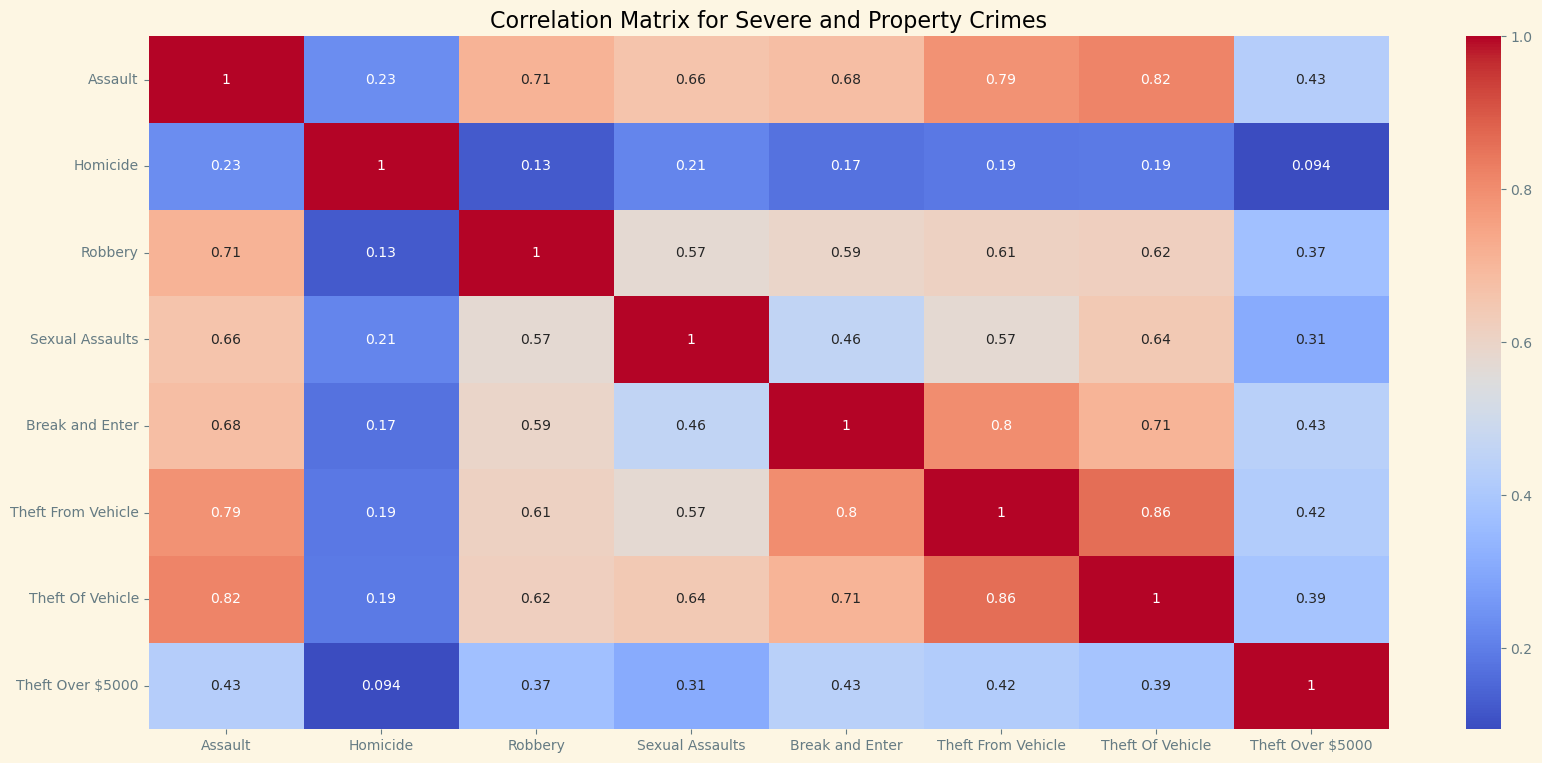

In [37]:
plot_crime_correlations(final, severe_crime, property_crime)

In [38]:
get_top_correlations(final[income_levels + severe_crime], 'Assault')

Income_Less than $30K: positive correlation (0.72)
Robbery: positive correlation (0.71)
Income_30K to less than 60K: positive correlation (0.69)
Sexual Assaults: positive correlation (0.66)


These correlations suggest that there is a positive relationship between lower income levels and severe crimes such as assault and robbery. The correlation coefficient for Income_Less than $30K is particularly high, indicating that this income level is strongly associated with these types of crimes. The correlation between Income_30K to less than 60K and severe crimes is also high, but slightly lower than Income_Less than $30K. The correlation between Sexual Assaults and income levels is also positive, but weaker than the correlation with assault and robbery.

In [39]:
get_top_correlations(final[employment_status + severe_crime], 'Assault')

Permanently Unemployed: positive correlation (0.75)
Robbery: positive correlation (0.71)
Unemployed: positive correlation (0.68)
Sexual Assaults: positive correlation (0.66)


The results of get_top_correlations() function suggest that there is a positive correlation between low income levels and the likelihood of severe crimes such as Assault and Robbery. Specifically, there is a strong positive correlation between Income_Less than $30K and Assault, as well as Robbery. This suggests that individuals with lower incomes are more likely to be victims of violent crimes.

Furthermore, the results suggest that there is a positive correlation between being permanently unemployed and the likelihood of severe crimes such as Assault and Robbery. This could be attributed to the fact that individuals who are unemployed or permanently unemployed are more likely to face economic hardship, and may be more likely to engage in criminal activities.

It is important to note that correlation does not imply causation, and further research is needed to understand the underlying factors that contribute to these correlations. However, these findings can be useful in identifying areas that require greater attention from law enforcement agencies and policy makers.

In [40]:
get_top_correlations(final[education_level + severe_crime], 'Robbery')

Assault: positive correlation (0.71)
Sexual Assaults: positive correlation (0.57)
Preschool: positive correlation (0.17)
Post-Secondary: positive correlation (0.14)


Based on the correlation coefficients, we can see that there is a positive correlation between Robbery and Assault. This suggests that areas with higher rates of robbery tend to have higher rates of assault as well. Additionally, Sexual Assaults also show a positive correlation with Robbery, indicating that areas with higher rates of robbery also tend to have higher rates of sexual assaults.

Interestingly, there is also a positive correlation between Preschool and Robbery. However, this correlation is relatively weak compared to the other correlations we've looked at. It's important to keep in mind that correlation does not imply causation, and we would need to investigate further to determine the nature of this relationship.

Finally, we can see that Post-Secondary education levels have a relatively weak positive correlation with robbery. It's possible that areas with higher levels of education have more valuable goods to steal, which could be driving this correlation. Again, further investigation would be needed to determine the underlying cause of this correlation.

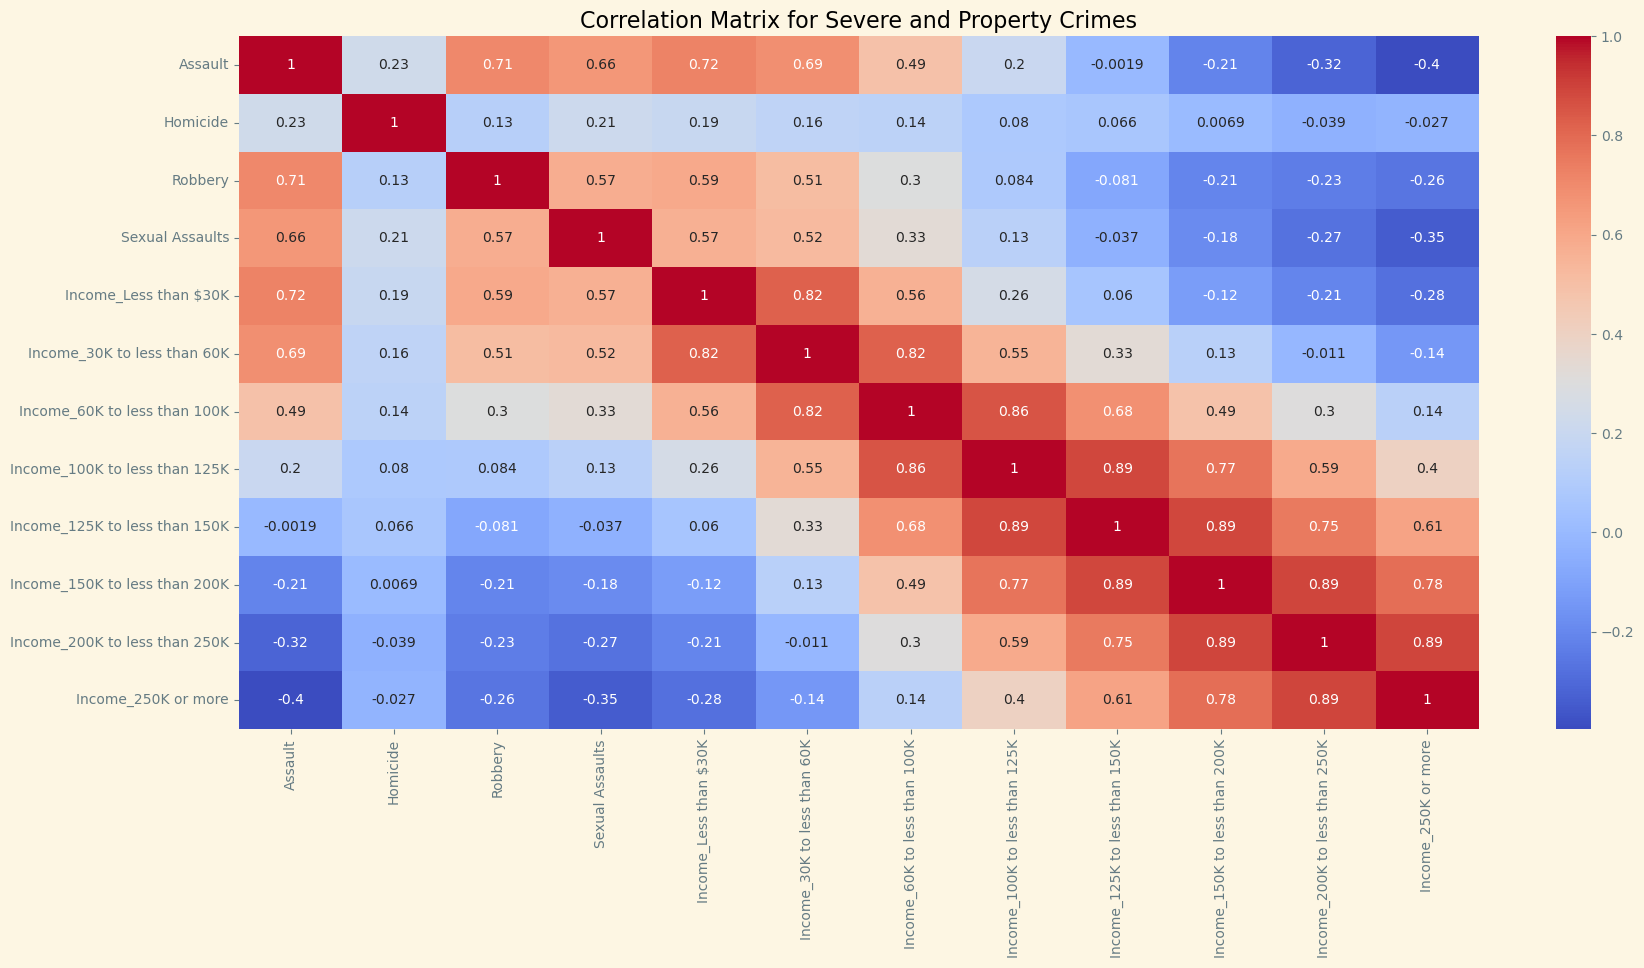

In [41]:
plot_crime_correlations(final, severe_crime, income_levels)

>## Clustering

In [42]:
final.iloc[:,1:]

Assault  Break and Enter  Homicide  Robbery  Sexual Assaults  \
0         35                8         0        8                4   
1          8                8         0        2                2   
2        123              119         1       26               13   
3         17               19         0        6                4   
4          6               17         0        1                0   
..       ...              ...       ...      ...              ...   
238       43               34         0        7                6   
239       14               15         0        2                2   
240        7               22         0        3                1   
241       30               22         0       13                4   
242       24               21         0        4                2   

     Theft From Vehicle  Theft Of Vehicle  Theft Over $5000   Latitude  \
0                    16                 6                 0  53.574143   
1                     9                 2                 1  53.632382   
2                   156                99                 2  53.568485   
3                    46                23                 0  53.516888   
4                    12                 3                 4  53.401301   
..                  ...               ...               ...        ...   
238                  53                48                 1  53.575942   
239                  46                24                 1  53.470564   
240                  31                 6                 4  53.432563   
241                  40                20                 4  53.564595   
242                  48                17                 4  53.602843   

      Longitude  ...  Income_Less than $30K  Income_30K to less than 60K  \
0   -113.388758  ...                  206.0                        170.0   
1   -113.549464  ...                   10.0                         56.0   
2   -113.485119  ...                  601.0                        667.0   
3   -113.641242  ...                  119.0                        266.0   
4   -113.526641  ...                    4.0                         48.0   
..          ...  ...                    ...                          ...   
238 -113.498585  ...                  381.0                        321.0   
239 -113.381167  ...                   32.0                        198.0   
240 -113.626008  ...                   37.0                        144.0   
241 -113.558327  ...                  214.0                        121.0   
242 -113.430212  ...                  148.0                        297.0   

     Income_60K to less than 100K  Income_100K to less than 125K  \
0                            79.0                           23.0   
1                            63.0                           30.0   
2                           364.0                          139.0   
3                           284.0                          135.0   
4                           165.0                          109.0   
..                            ...                            ...   
238                         124.0                           36.0   
239                         273.0                          125.0   
240                         271.0                          137.0   
241                         107.0                           32.0   
242                         271.0                          103.0   

     Income_125K to less than 150K  Income_150K to less than 200K  \
0                              4.0                            3.0   
1                              9.0                           14.0   
2                             62.0                           61.0   
3                             72.0                           49.0   
4                             48.0                           69.0   
..                             ...                            ...   
238                           22.0                           14.0   
239  

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final.iloc[:,1:])

c:\Users\azimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


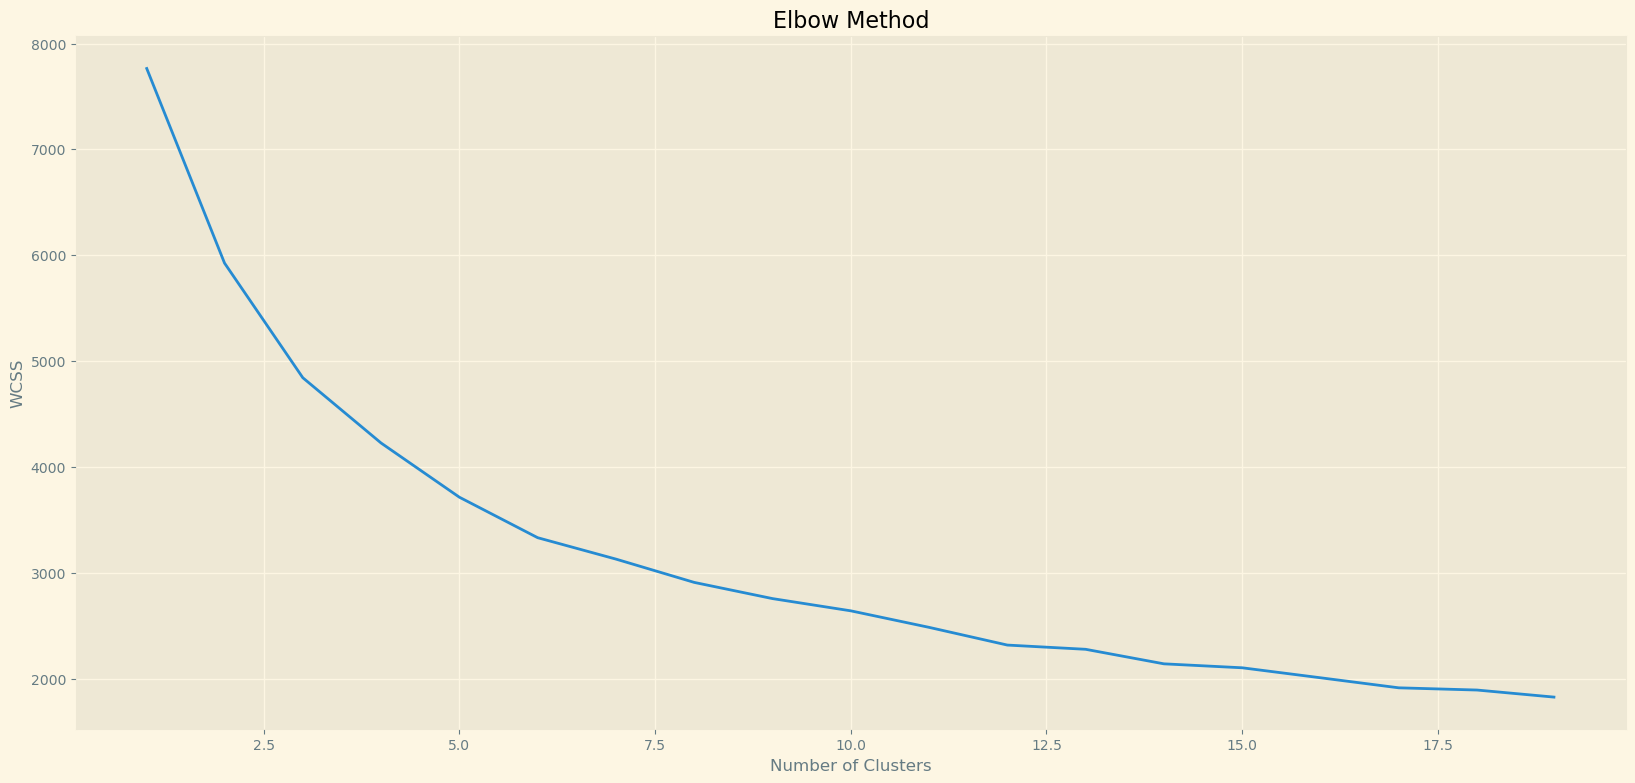

In [44]:
# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

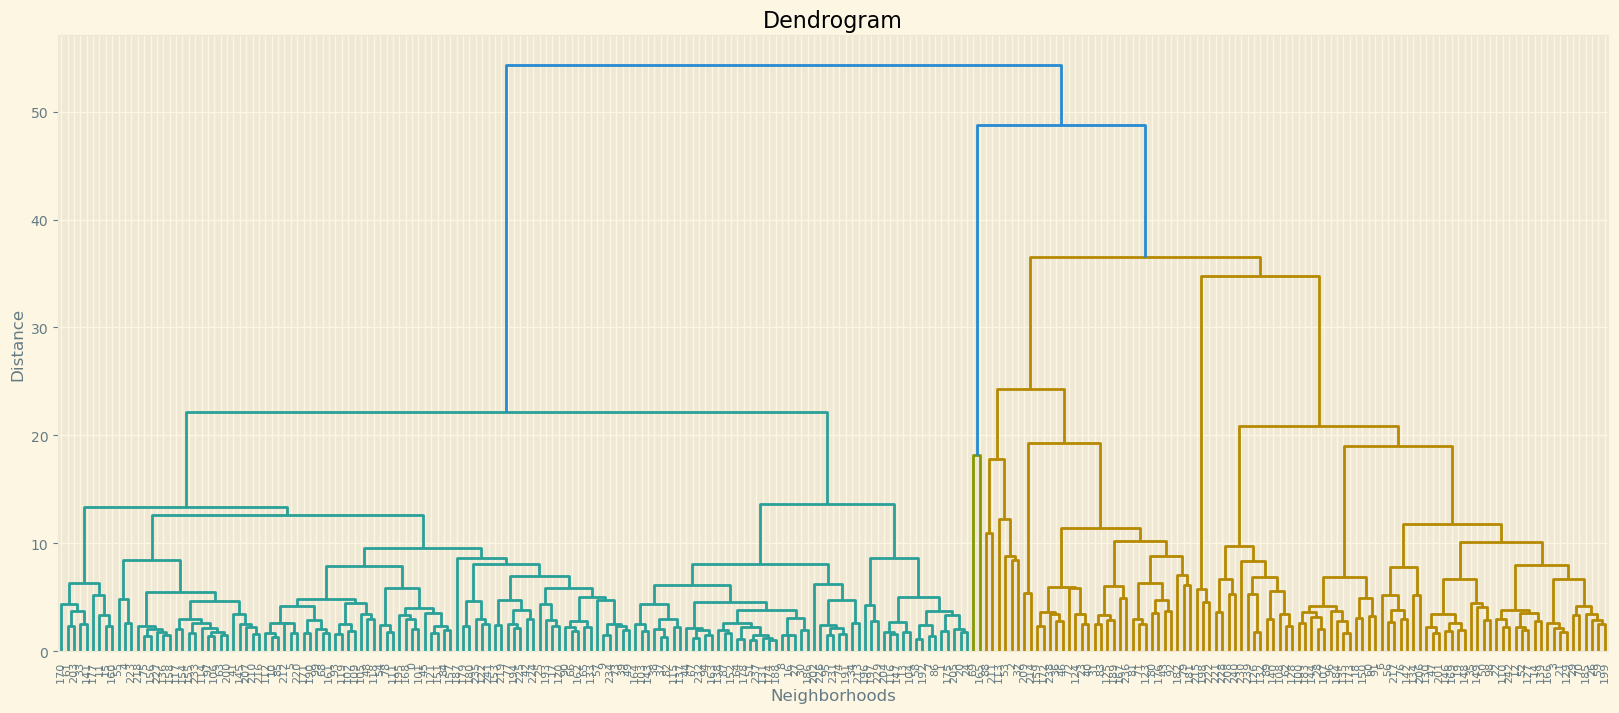

In [45]:
import scipy.cluster.hierarchy as shc

# Generate the linkage matrix using complete linkage
linkage_matrix = shc.linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 8))
plt.title('Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
shc.dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()

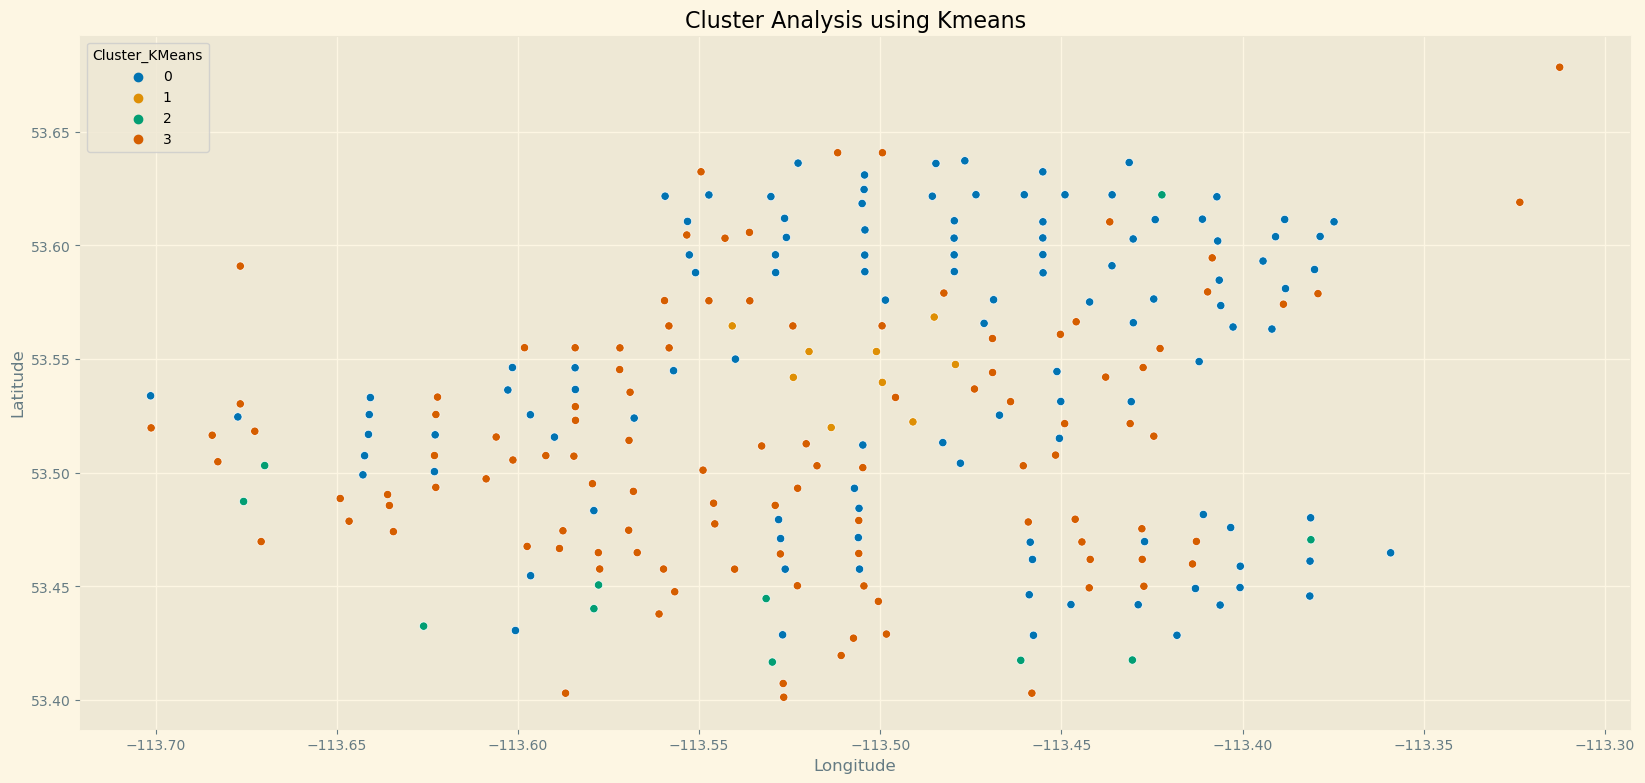

In [46]:
# Create the KMeans model and fit to the standardized data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1100, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
final['Cluster_KMeans'] = pred_y

# Plot the clusters
sns.scatterplot(x='Longitude', y='Latitude', data=final, hue='Cluster_KMeans', palette='colorblind')
#sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='Cluster', palette='colorblind')
plt.title('Cluster Analysis using Kmeans')
plt.show()

>Invetigating the Clusters

In [47]:
final['Cluster_KMeans'].value_counts()

0    113
3    110
2     11
1      9
Name: Cluster_KMeans, dtype: int64

In [48]:
cluster_0=final[final['Cluster_KMeans']==0]
cluster_1=final[final['Cluster_KMeans']==1]
cluster_2=final[final['Cluster_KMeans']==2]
cluster_3=final[final['Cluster_KMeans']==3]

In [49]:
cluster_0['NGH_Name']

3             ALDERGROVE
6              AMBLESIDE
9                ATHLONE
11                BALWIN
12             BANNERMAN
             ...        
234           WELLINGTON
235    WEST JASPER PLACE
236            WESTMOUNT
238             WESTWOOD
242                 YORK
Name: NGH_Name, Length: 113, dtype: object

In [50]:
cluster_1['NGH_Name']

2         ALBERTA AVENUE
32          BOYLE STREET
53     CENTRAL MCDOUGALL
69              DOWNTOWN
88               GARNEAU
113            INGLEWOOD
165               OLIVER
182      QUEEN MARY PARK
211           STRATHCONA
Name: NGH_Name, dtype: object

In [51]:
cluster_2['NGH_Name']

89           GLASTONBURY
108       HOLLICK-KENYON
198           RUTHERFORD
208    SOUTH TERWILLEGAR
215           SUMMERSIDE
221    TERWILLEGAR TOWNE
222         THE HAMPTONS
228          TWIN BROOKS
230               WALKER
239            WILD ROSE
240           WINDERMERE
Name: NGH_Name, dtype: object

In [52]:
c3=[]
for ngh in cluster_3['NGH_Name']:
    c3.append(ngh)
print(c3)

['ABBOTTSFIELD', 'ALBANY', 'ALLARD', 'ALLENDALE', 'ARGYLL', 'ASPEN GARDENS', 'AVONMORE', 'BARANOW', 'BEARSPAW', 'BELGRAVIA', 'BELLEVUE', 'BERGMAN', 'BLACKBURNE', 'BLACKMUD CREEK', 'BLUE QUILL ESTATES', 'BRANDER GARDENS', 'BRECKENRIDGE GREENS', 'BROOKSIDE', 'BULYEA HEIGHTS', 'CALLAGHAN', 'CALLINGWOOD NORTH', 'CAMERON HEIGHTS', 'CANON RIDGE', 'CAPILANO', 'CARTER CREST', 'CHAMBERY', 'CHAPPELLE AREA', 'CLOVERDALE', 'CRESTWOOD', 'CROMDALE', 'DECHENE', 'DELTON', 'DONSDALE', 'DOVERCOURT', 'EDGEMONT', 'EKOTA', 'ELMWOOD', 'ELSINORE', 'FALCONER HEIGHTS', 'FULTON PLACE', 'GAINER INDUSTRIAL', 'GARIEPY', 'GRANDVIEW HEIGHTS', 'GRANVILLE', 'GREENVIEW', 'GROVENOR', 'HENDERSON ESTATES', 'HIGH PARK', 'HODGSON', 'HUDSON', 'IDYLWYLDE', 'JAMIESON PLACE', 'JASPER PARK', 'KAMEYOSEK', 'KEHEEWIN', 'KENILWORTH', 'LANSDOWNE', 'LAURIER HEIGHTS', 'LEE RIDGE', 'LEGER', 'LENDRUM PLACE', 'MACTAGGART', 'MAGRATH HEIGHTS', 'MALMO PLAINS', 'MAYFIELD', 'MCKERNAN', 'MCLEOD', 'MCQUEEN', 'MEYOKUMIN', 'MICHAELS PARK', 'MINCHA

In [53]:
['ABBOTTSFIELD', 'ALBANY', 'ALLARD', 'ALLENDALE', 'ARGYLL', 'ASPEN GARDENS', 
 'AVONMORE', 'BARANOW', 'BEARSPAW', 'BELGRAVIA', 'BELLEVUE', 'BERGMAN', 'BLACKBURNE', 
 'BLACKMUD CREEK', 'BLUE QUILL ESTATES', 'BRANDER GARDENS', 'BRECKENRIDGE GREENS', 'BROOKSIDE', 
 'BULYEA HEIGHTS', 'CALLAGHAN', 'CALLINGWOOD NORTH', 'CAMERON HEIGHTS', 'CANON RIDGE', 'CAPILANO', 
 'CARTER CREST', 'CHAMBERY', 'CHAPPELLE AREA', 'CLOVERDALE', 'CRESTWOOD', 'CROMDALE', 'DECHENE', 'DELTON', 
 'DONSDALE', 'DOVERCOURT', 'EDGEMONT', 'EKOTA', 'ELMWOOD', 'ELSINORE', 'FALCONER HEIGHTS', 
 'FULTON PLACE', 'GAINER INDUSTRIAL', 'GARIEPY', 'GRANDVIEW HEIGHTS', 'GRANVILLE', 'GREENVIEW', 
 'GROVENOR', 'HENDERSON ESTATES', 'HIGH PARK', 'HODGSON', 'HUDSON', 'IDYLWYLDE', 'JAMIESON PLACE', 
 'JASPER PARK', 'KAMEYOSEK', 'KEHEEWIN', 'KENILWORTH', 'LANSDOWNE', 'LAURIER HEIGHTS', 'LEE RIDGE', 
 'LEGER', 'LENDRUM PLACE', 'MACTAGGART', 'MAGRATH HEIGHTS', 'MALMO PLAINS', 'MAYFIELD', 'MCKERNAN', 'MCLEOD', 
 'MCQUEEN', 'MEYOKUMIN', 'MICHAELS PARK', 'MINCHAU', 'NORTH GLENORA', 'OGILVIE RIDGE', 'OLESKIW', 'PARKALLEN', 
 'PATRICIA HEIGHTS', 'PEMBINA', 'POTTER GREENS', 'PRINCE CHARLES', 'PRINCE RUPERT', 'RHATIGAN RIDGE', 'RICHFORD', 
 'RIDEAU PARK', 'RIO TERRACE', 'RIVERDALE', 'ROSENTHAL', 'ROSSDALE', 'RURAL NORTH EAST HORSE HILL', 
 'RURAL NORTH EAST SOUTH STURGEON', 'SHERBROOKE', 'SHERWOOD', 'SIFTON PARK', 'SKYRATTLER', 
 'SPRUCE AVENUE', 'STEINHAUER', 'STRATHEARN', 'SUMMERLEA', 'SWEET GRASS', 'TAWA', 'TERRA LOSA', 
 'TERRACE HEIGHTS', 'THE ORCHARDS AT ELLERSLIE', 'TRUMPETER AREA', 'TWEDDLE PLACE', 'VIRGINIA PARK', 
 'WEBBER GREENS', 'WEDGEWOOD HEIGHTS', 'WEINLOS', 'WESTRIDGE', 'WOODCROFT']

['ABBOTTSFIELD',
 'ALBANY',
 'ALLARD',
 'ALLENDALE',
 'ARGYLL',
 'ASPEN GARDENS',
 'AVONMORE',
 'BARANOW',
 'BEARSPAW',
 'BELGRAVIA',
 'BELLEVUE',
 'BERGMAN',
 'BLACKBURNE',
 'BLACKMUD CREEK',
 'BLUE QUILL ESTATES',
 'BRANDER GARDENS',
 'BRECKENRIDGE GREENS',
 'BROOKSIDE',
 'BULYEA HEIGHTS',
 'CALLAGHAN',
 'CALLINGWOOD NORTH',
 'CAMERON HEIGHTS',
 'CANON RIDGE',
 'CAPILANO',
 'CARTER CREST',
 'CHAMBERY',
 'CHAPPELLE AREA',
 'CLOVERDALE',
 'CRESTWOOD',
 'CROMDALE',
 'DECHENE',
 'DELTON',
 'DONSDALE',
 'DOVERCOURT',
 'EDGEMONT',
 'EKOTA',
 'ELMWOOD',
 'ELSINORE',
 'FALCONER HEIGHTS',
 'FULTON PLACE',
 'GAINER INDUSTRIAL',
 'GARIEPY',
 'GRANDVIEW HEIGHTS',
 'GRANVILLE',
 'GREENVIEW',
 'GROVENOR',
 'HENDERSON ESTATES',
 'HIGH PARK',
 'HODGSON',
 'HUDSON',
 'IDYLWYLDE',
 'JAMIESON PLACE',
 'JASPER PARK',
 'KAMEYOSEK',
 'KEHEEWIN',
 'KENILWORTH',
 'LANSDOWNE',
 'LAURIER HEIGHTS',
 'LEE RIDGE',
 'LEGER',
 'LENDRUM PLACE',
 'MACTAGGART',
 'MAGRATH HEIGHTS',
 'MALMO PLAINS',
 'MAYFIELD',
 'MCKE

This code groups the rows of the final dataframe by their assigned cluster label (Cluster_KMeans) using the groupby() method.

Then, it selects the columns Assault, Break and Enter, Homicide, Robbery, Sexual Assaults, Theft From Vehicle, Theft Of Vehicle, and Theft Over $5000, which represent different types of crimes.

Finally, it calculates the mean value of each crime type for each cluster using the mean() method. This allows you to compare the average crime rates between the different clusters.

Averages of the Crimes Commited by Clusters in Edmonton

In [54]:
# Select the relevant columns and filter to only include cluster 0
final.groupby('Cluster_KMeans')['Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000'].mean()


C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\2800200239.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final.groupby('Cluster_KMeans')['Assault', 'Break and Enter', 'Homicide', 'Robbery',


Assault  Break and Enter  Homicide    Robbery  \
Cluster_KMeans                                                     
0                20.469027        22.044248  0.070796   4.415929   
1               152.111111        83.888889  0.777778  31.888889   
2                11.090909        20.272727  0.000000   1.454545   
3                 7.536364        12.154545  0.036364   1.927273   

                Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  \
Cluster_KMeans                                                          
0                      2.858407           41.840708         20.238938   
1                     15.111111          151.555556         63.333333   
2                      0.909091           40.545455         11.090909   
3                      1.318182           19.554545          7.481818   

                Theft Over $5000  
Cluster_KMeans                    
0                       1.203540  
1                       3.888889  
2                       1.636364  
3                       0.763636

As we can see, cluster_1 is the hot spot in Edmonton.

We can drill down further to view the mean of crimes committed by each Neighborhood within Cluster 1, that has the Highest Crime rates.

In [55]:
cluster_num = 1
cluster_df = final[final['Cluster_KMeans'] == cluster_num]
ngh_grouped = cluster_df.groupby('NGH_Name')[['Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000']].mean()
ngh_grouped

Assault  Break and Enter  Homicide  Robbery  \
NGH_Name                                                         
ALBERTA AVENUE       123.0            119.0       1.0     26.0   
BOYLE STREET         163.0             50.0       2.0     16.0   
CENTRAL MCDOUGALL    226.0             50.0       0.0     43.0   
DOWNTOWN             436.0            123.0       1.0     83.0   
GARNEAU               33.0             78.0       0.0     17.0   
INGLEWOOD             80.0             76.0       3.0     23.0   
OLIVER               127.0            118.0       0.0     36.0   
QUEEN MARY PARK       84.0             46.0       0.0     13.0   
STRATHCONA            97.0             95.0       0.0     30.0   

                   Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  \
NGH_Name                                                                   
ALBERTA AVENUE                13.0               156.0              99.0   
BOYLE STREET                  13.0               128.0              44.0   
CENTRAL MCDOUGALL             15.0               122.0              70.0   
DOWNTOWN                      47.0               316.0              87.0   
GARNEAU                        2.0                83.0              33.0   
INGLEWOOD                     16.0               101.0              47.0   
OLIVER                        16.0               196.0              75.0   
QUEEN MARY PARK                8.0               138.0              61.0   
STRATHCONA                     6.0               124.0              54.0   

                   Theft Over $5000  
NGH_Name                             
ALBERTA AVENUE                  2.0  
BOYLE STREET                    4.0  
CENTRAL MCDOUGALL               5.0  
DOWNTOWN                       10.0  
GARNEAU                         1.0  
INGLEWOOD                       3.0  
OLIVER                          5.0  
QUEEN MARY PARK                 3.0  
STRATHCONA                      2.0

C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\3392201399.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_means = final.groupby('Cluster_KMeans')['Assault', 'Break and Enter', 'Homicide', 'Robbery',


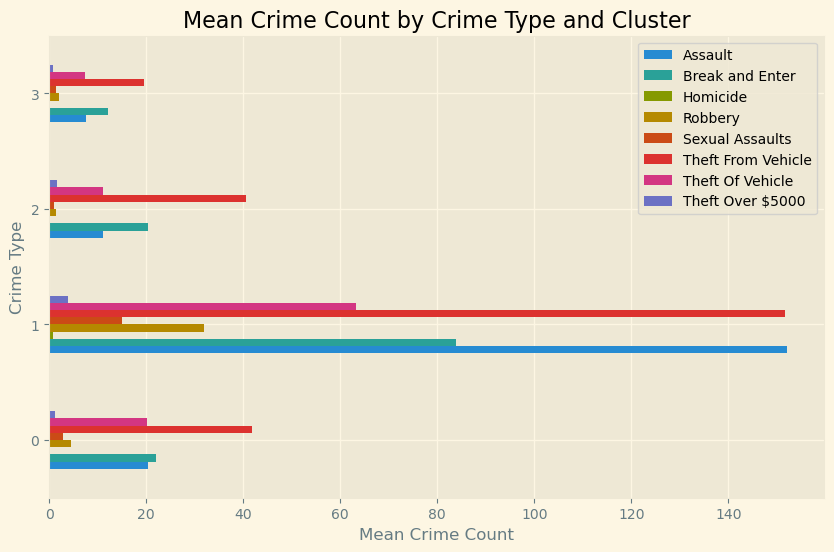

In [56]:
# Get the mean crime count for each crime type for each cluster
crime_means = final.groupby('Cluster_KMeans')['Assault', 'Break and Enter', 'Homicide', 'Robbery',
                                               'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
                                               'Theft Over $5000'].mean()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
crime_means.plot(kind='barh', ax=ax)

# Set chart title and axis labels
ax.set_title('Mean Crime Count by Crime Type and Cluster')
ax.set_xlabel('Mean Crime Count')
ax.set_ylabel('Crime Type')

# Show the chart
plt.show()

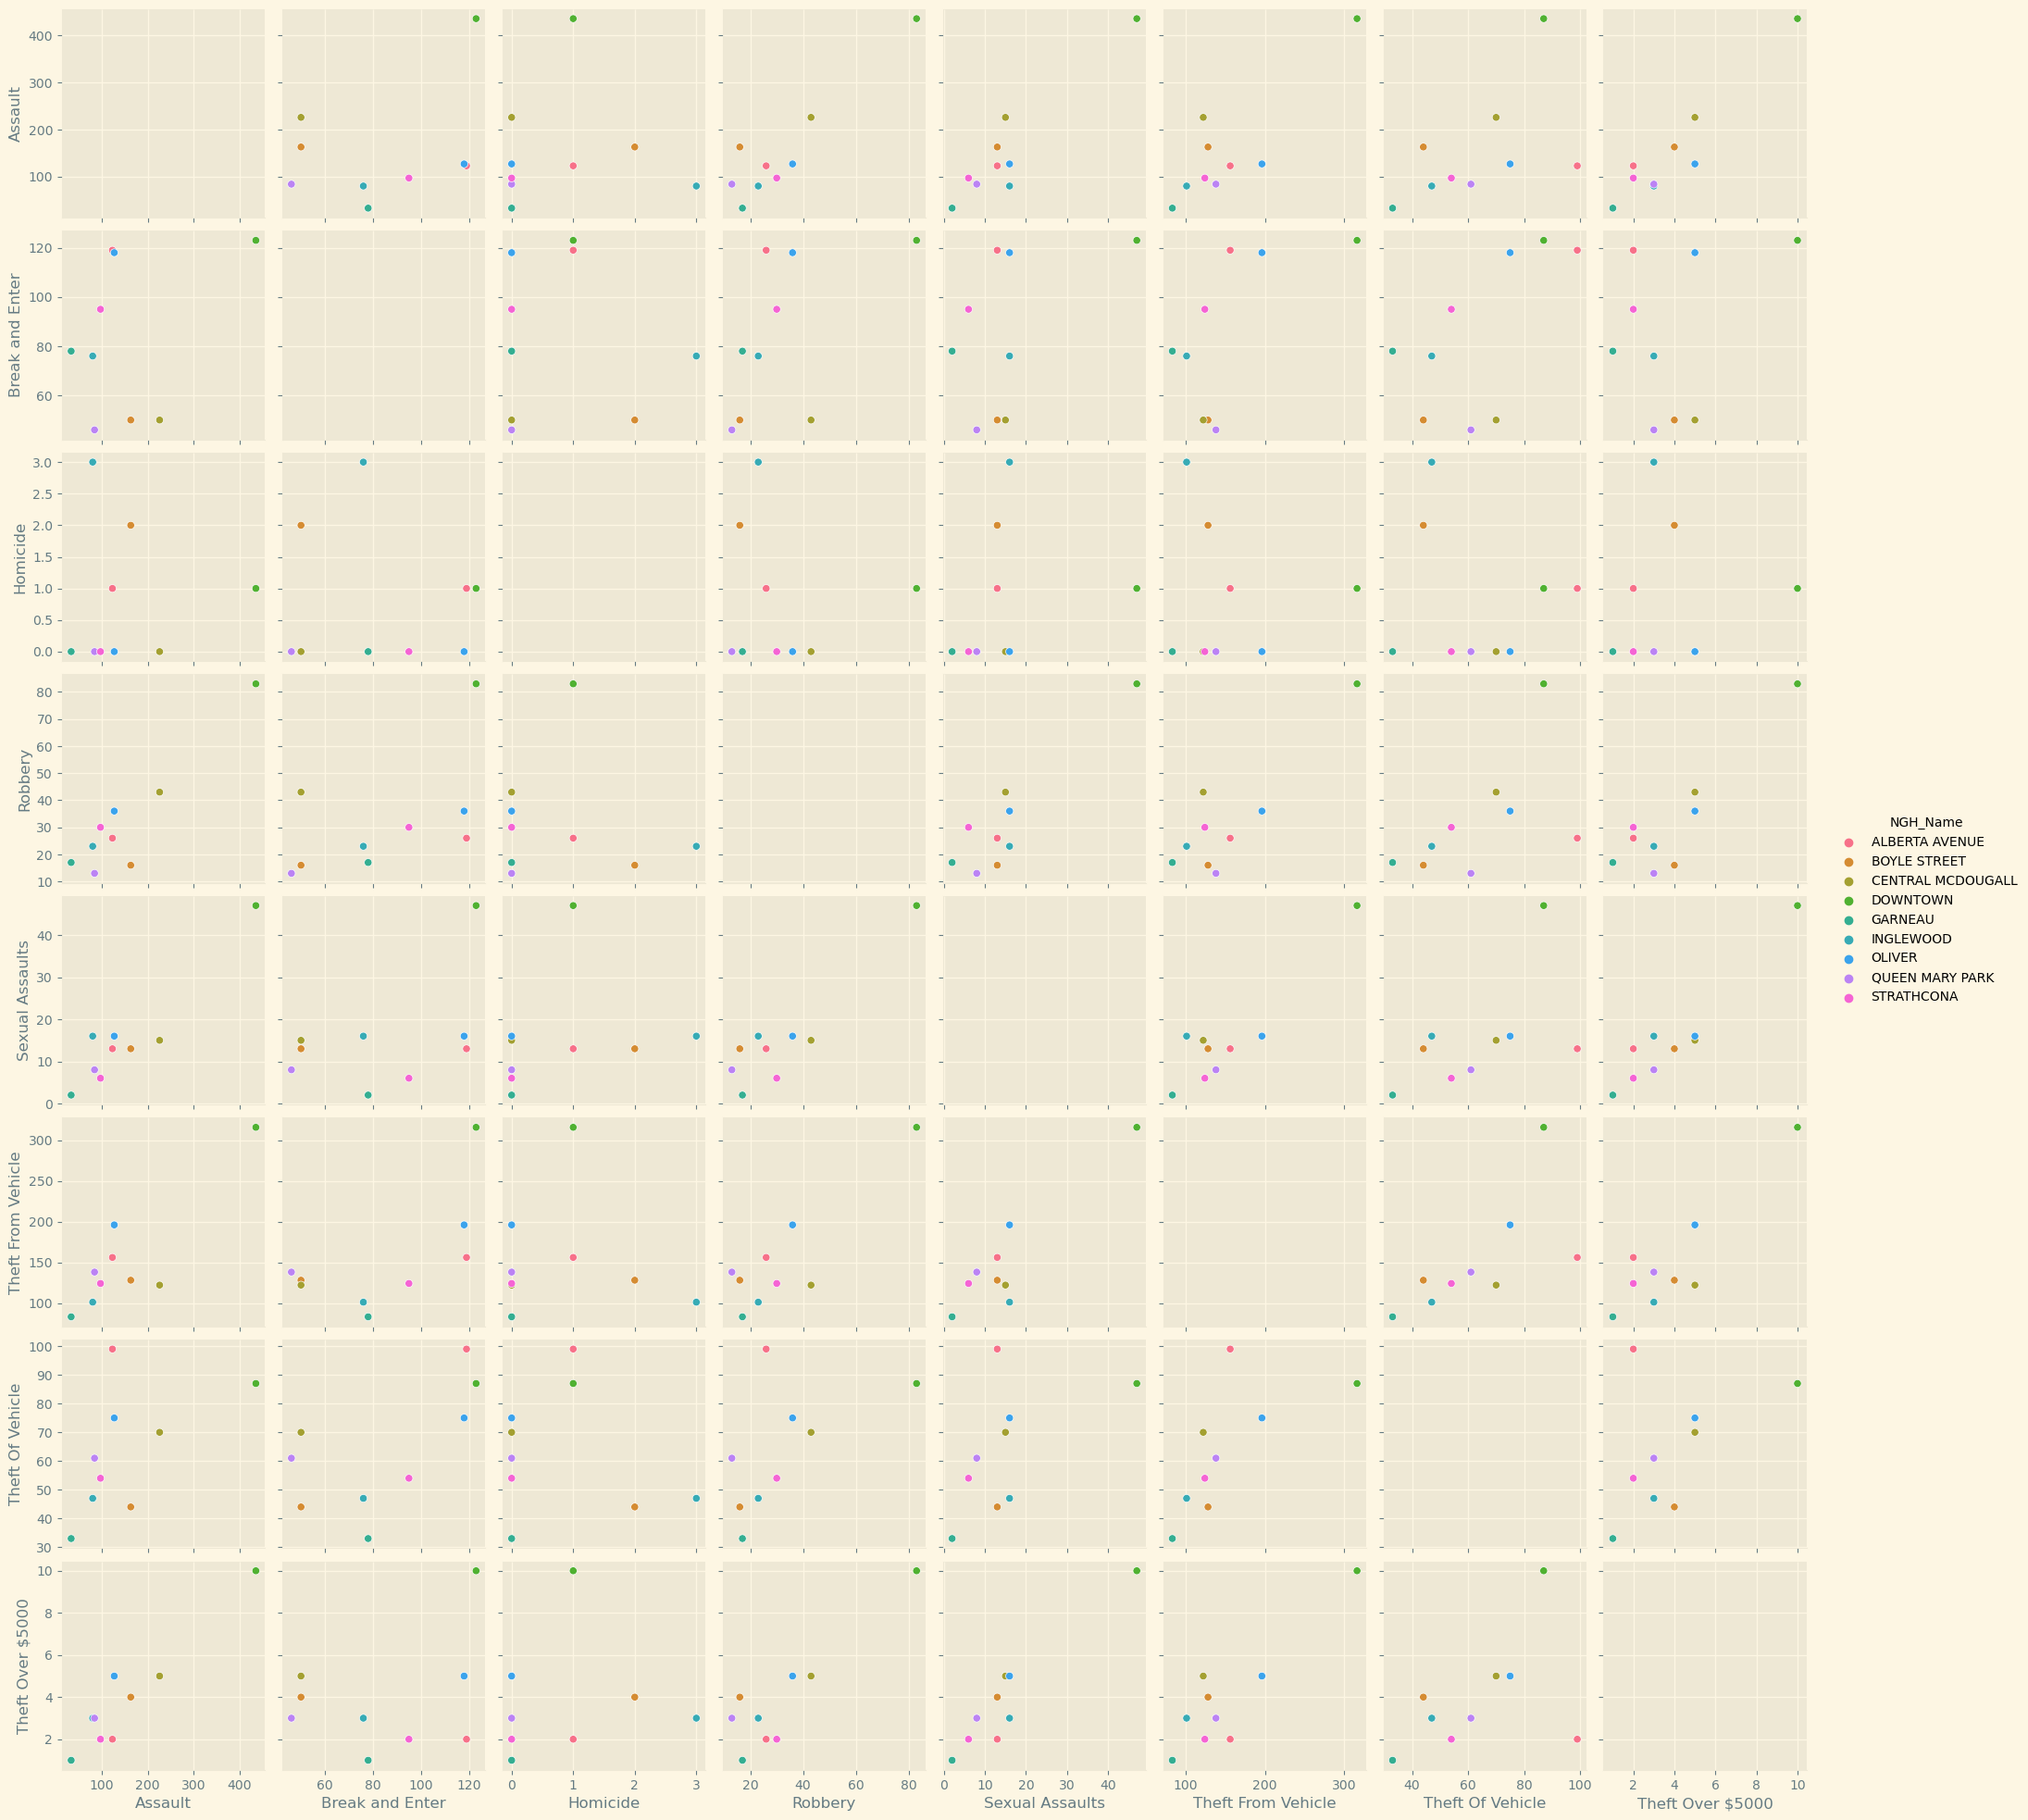

In [57]:
sns.pairplot(cluster_1, hue='NGH_Name', vars=['Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000'], diag_kind='kde')

This cluster is somewhat similar to what we found earlier when looking at the top10 Neighborhoods with the highest Crime Rates.
And our Top 6 Neighborhoods are in this cluster too.


> View the Clusters using Geopandas

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Using Geopandas
# first need to get out edmonton/neighbourhoods shape file..and change the columns to match our datafile
#https://data.edmonton.ca/Geospatial-Boundaries/2016-Federal-Census-Neighbourhoods-as-of-Official-/3did-mjnj
edmonton_shp=gpd.read_file('geo_export_67517c45-71c1-4f9b-8051-9eaf76457140.shp', geometry='geometry')
edmonton_shp.rename(columns={'name': 'NGH_Name', 'neighbourh': 'NGH_Number'}, inplace=True)
edmonton_shp.drop(['descriptiv', 'date_effec', 'time_effec', 'date_eff_2', 'time_eff_2', 'descriptio'], axis=1, inplace =True)
edmonton_shp.head()

NGH_Number               NGH_Name  \
0      5310.0              PARKALLEN   
1      4400.0            PLACE LARUE   
2      5170.0            EMPIRE PARK   
3      2270.0              EVERGREEN   
4      5520.0  UNIVERSITY OF ALBERTA   

                                            geometry  
0  POLYGON ((-113.52294 53.50390, -113.52299 53.5...  
1  POLYGON ((-113.63538 53.53748, -113.63986 53.5...  
2  POLYGON ((-113.49897 53.48824, -113.49765 53.4...  
3  POLYGON ((-113.35656 53.62863, -113.35664 53.6...  
4  POLYGON ((-113.51500 53.52575, -113.51500 53.5...

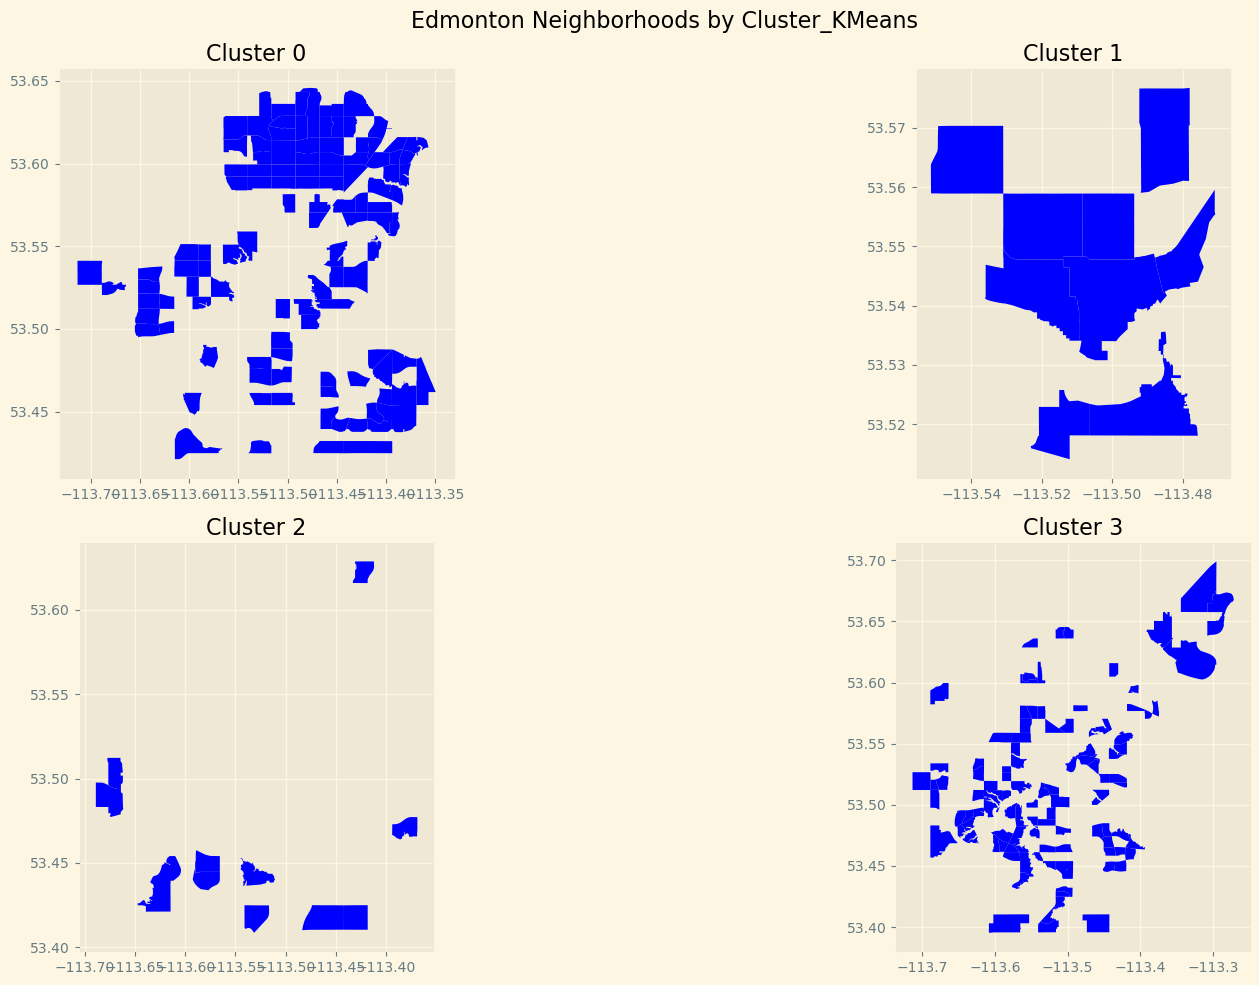

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Join the cluster labels to the Edmonton neighborhoods dataframe
edmonton_shp = edmonton_shp.merge(final[['NGH_Name', 'Cluster_KMeans']], on='NGH_Name', how='left')

# Set up a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# Plot each cluster in a separate subplot
for i, cluster_label in enumerate(range(4)):
    # Select the neighborhoods in the current cluster and plot them on a map
    edmonton_shp[edmonton_shp['Cluster_KMeans'] == cluster_label].plot(ax=axs[i//2, i%2], color='blue')
    axs[i//2, i%2].set_title(f'Cluster {cluster_label}')

# Set the overall title for the figure and tighten the layout
fig.suptitle('Edmonton Neighborhoods by Cluster_KMeans', fontsize=16)
plt.tight_layout()

>Looking at Cluster_0 with our Neighbourhoods with highest crime.
What is the Distance between the Neighborhoods in Cluster 0, with Downtown being set as te center-point.

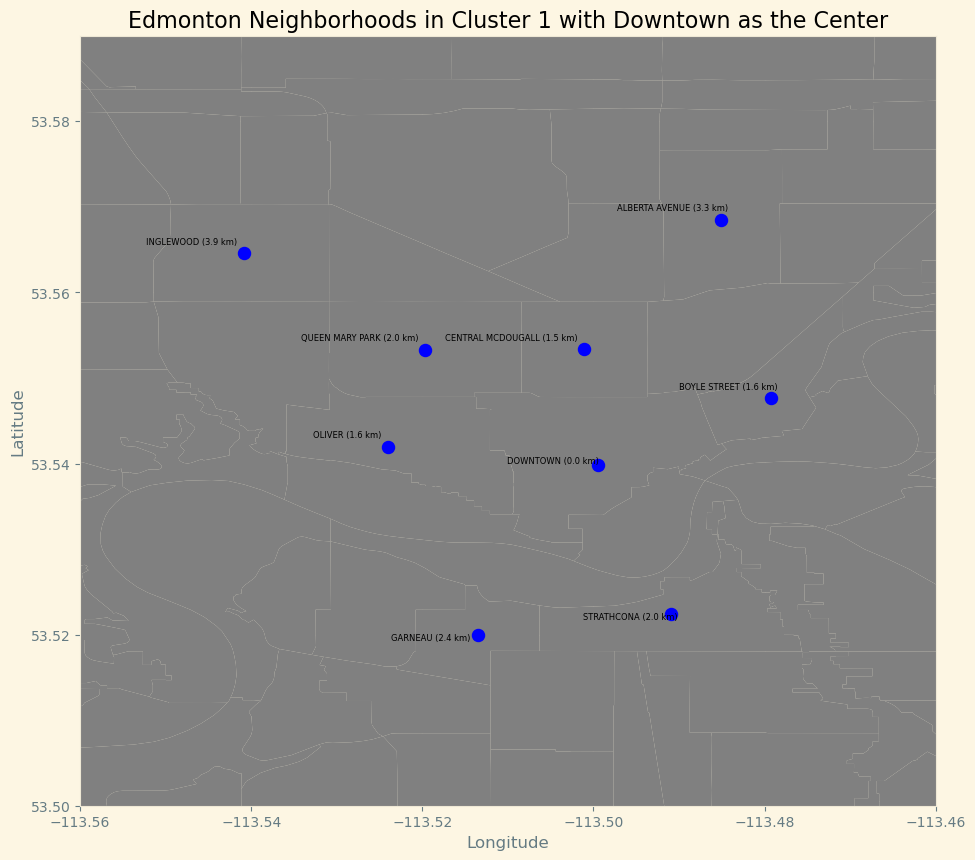

In [60]:
import geopy.distance
# Define the center point (Downtown)
center_lat = 53.539767
center_lon = -113.499421

# Define the neighborhoods in cluster 1
cluster_0 = final.loc[final['Cluster_KMeans'] == 1, ['NGH_Name', 'Latitude', 'Longitude']]

# Calculate the distances between each neighborhood and Downtown
distances = []
for i, row in cluster_0.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    dist = geopy.distance.distance((center_lat, center_lon), (lat, lon)).km
    distances.append(dist)

# Add the distances as a column in the cluster_0 dataframe
cluster_0['Distance from Downtown'] = distances

# Create a GeoDataFrame from the cluster_0 dataframe
cluster_0_geo = gpd.GeoDataFrame(cluster_0, geometry=gpd.points_from_xy(cluster_0.Longitude, cluster_0.Latitude))

# Create a map of the neighborhoods in cluster 0 with Downtown as the center
fig, ax = plt.subplots(figsize=(20, 10))
edmonton_shp.plot(ax=ax, color='gray')
cluster_0_geo.plot(ax=ax, color='blue', marker='o', markersize=75)

# Add labels to the markers indicating the distance from Downtown
for i, row in cluster_0_geo.iterrows():
    label = f"{row['NGH_Name']} ({row['Distance from Downtown']:.1f} km)"
    ax.annotate(label, (row.geometry.x, row.geometry.y), xytext=(np.sign(row.geometry.x - center_lon)*5, 
                np.sign(row.geometry.y - center_lat)*5), textcoords='offset points', ha='right', va='bottom', fontsize=6)

# Set the title and axes labels for the map
ax.set_title('Edmonton Neighborhoods in Cluster 1 with Downtown as the Center')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-113.56, -113.46)
ax.set_ylim(53.50, 53.59)
plt.show()


Looking at the chart above the AVERAGE distance from Downtown as being the centre is around 2.02km.

>Further investigation of the Clusters

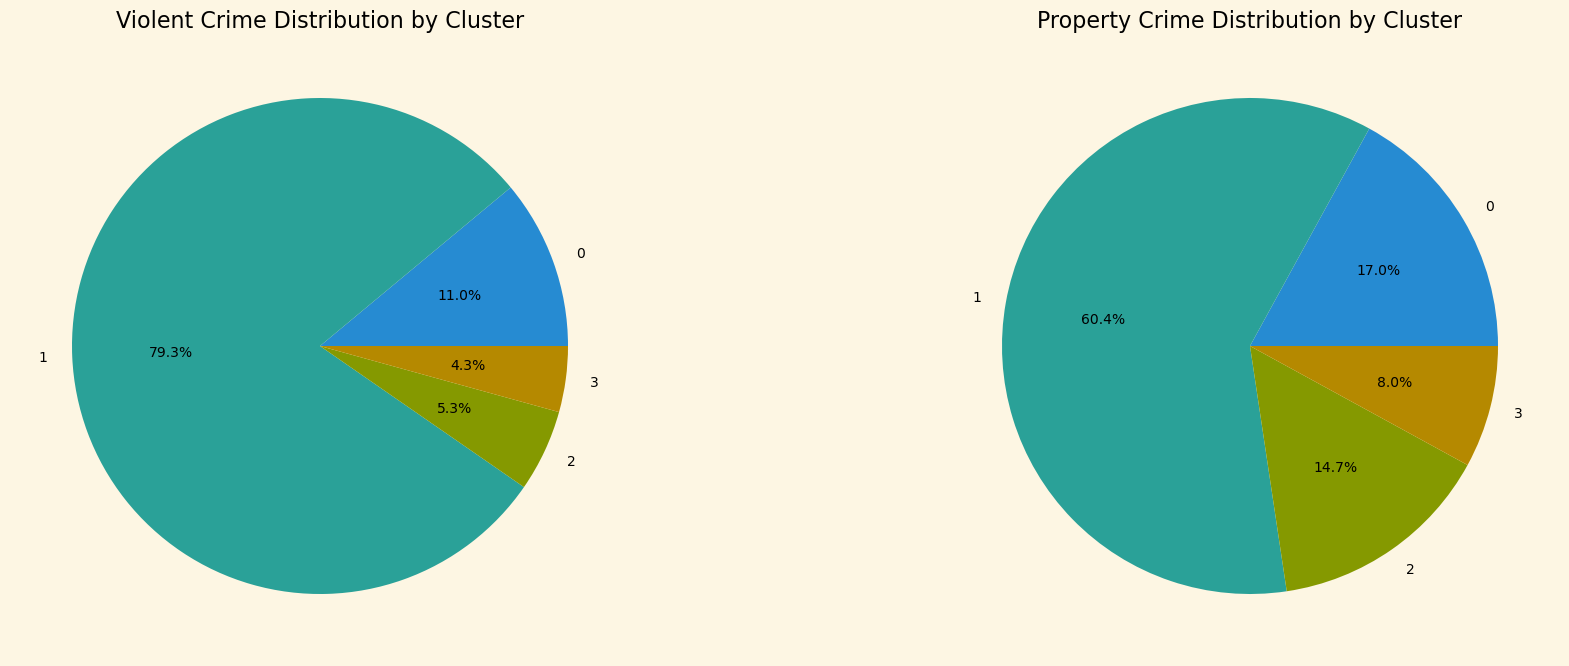

In [61]:
# Define the two crime groups
Violent_Crime = ['Homicide', 'Assault', 'Robbery', 'Sexual Assaults']
Property_Crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']

# Calculate the total count of crimes in each cluster for both groups
crime_counts_violent = final.groupby('Cluster_KMeans')[Violent_Crime].mean().sum(axis=1)
crime_counts_property = final.groupby('Cluster_KMeans')[Property_Crime].mean().sum(axis=1)

# Create a 1x2 grid of subplots
plt.subplot(1, 2, 1)
# Create a pie chart for violent crime
plt.pie(crime_counts_violent, labels=crime_counts_violent.index, autopct='%1.1f%%')
plt.title('Violent Crime Distribution by Cluster')

plt.subplot(1, 2, 2)
# Create a pie chart for property crime
plt.pie(crime_counts_property, labels=crime_counts_property.index, autopct='%1.1f%%')
plt.title('Property Crime Distribution by Cluster')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

>As we can see from the pie-charts above, our Cluster_0, not only does it have the highest Severe Crimes committed, but also the highest Property Crimes committed too.

In [62]:
"""Plotting Pie charts for the distribution as a % of each grouped crime by Cluster"""
def plot_violation_type_distribution(data, violation_group):
    # Define the two violation groups
    severe_crime = ['Homicide', 'Assault', 'Robbery', 'Sexual Assaults']
    property_crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']

    # Select the appropriate violation group
    if violation_group == 'Severe Crime':
        violation_types = severe_crime
    elif violation_group == 'Property Crime':
        violation_types = property_crime
    else:
        raise ValueError("Violation group must be 'Severe Crime' or 'Property Crime'.")

    # Calculate the total count of each violation type in each cluster
    cluster_counts = data.groupby('Cluster_KMeans')[violation_types].mean()

    # Create a 2x2 grid of subplots for each cluster
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    # Loop over each cluster and create a pie chart of the violation type distribution
    for i, ax in enumerate(axs.flat):
        # Get the counts for the current cluster and convert to percentages
        counts = cluster_counts.iloc[i]
        total = counts.sum()
        percents = counts / total * 100

        # Create the pie chart
        labels = percents.index
        sizes = percents.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i}')
    
    # Add a common title for the whole figure
    fig.suptitle(f'{violation_group} Distribution by Cluster', fontsize=16)
    
    # Set the layout and show the plot
    plt.tight_layout()
    plt.show()


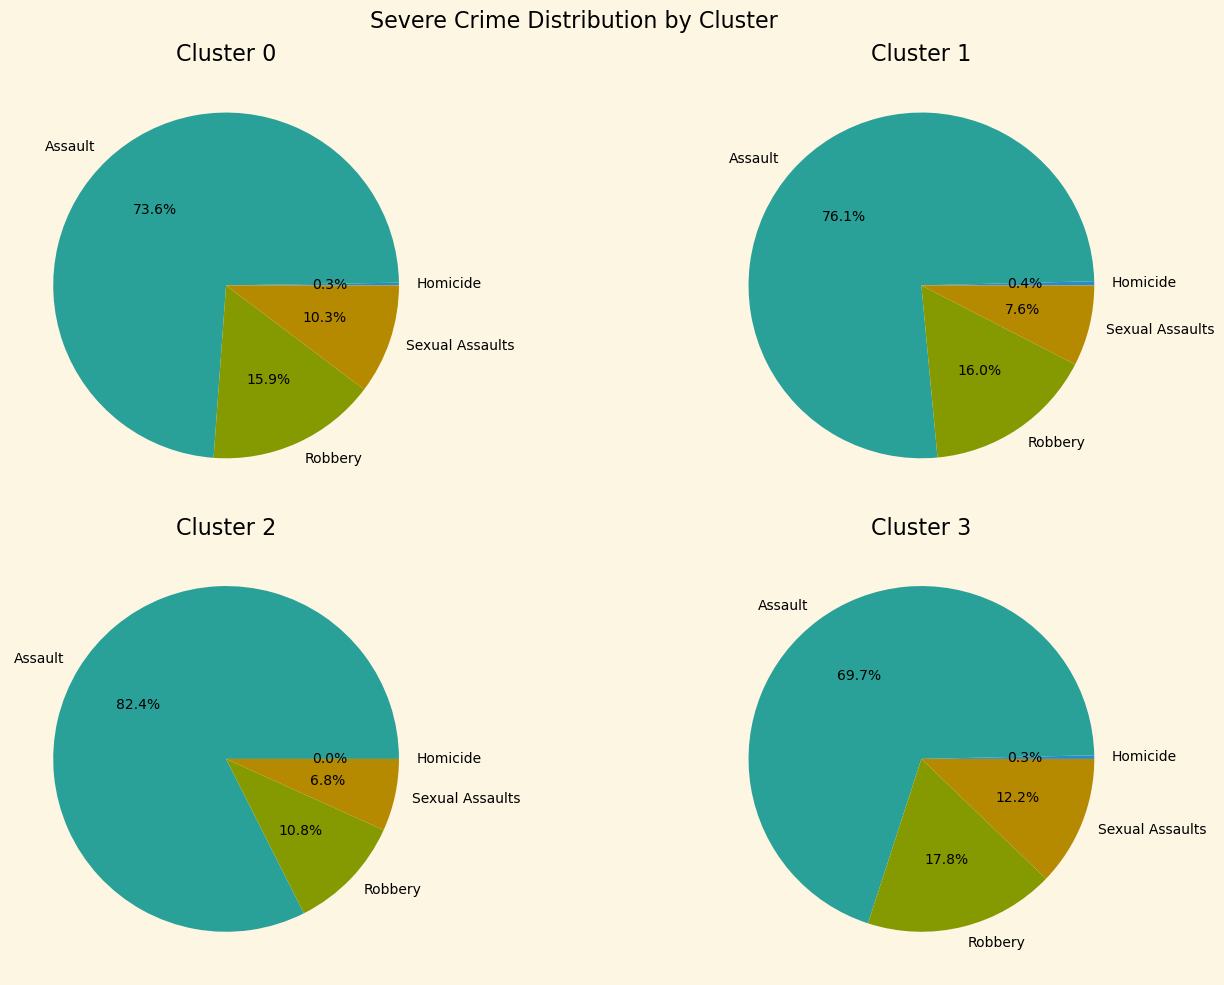

In [63]:
plot_violation_type_distribution(final, "Severe Crime")

>Though our Top6 is in Cluster0.....

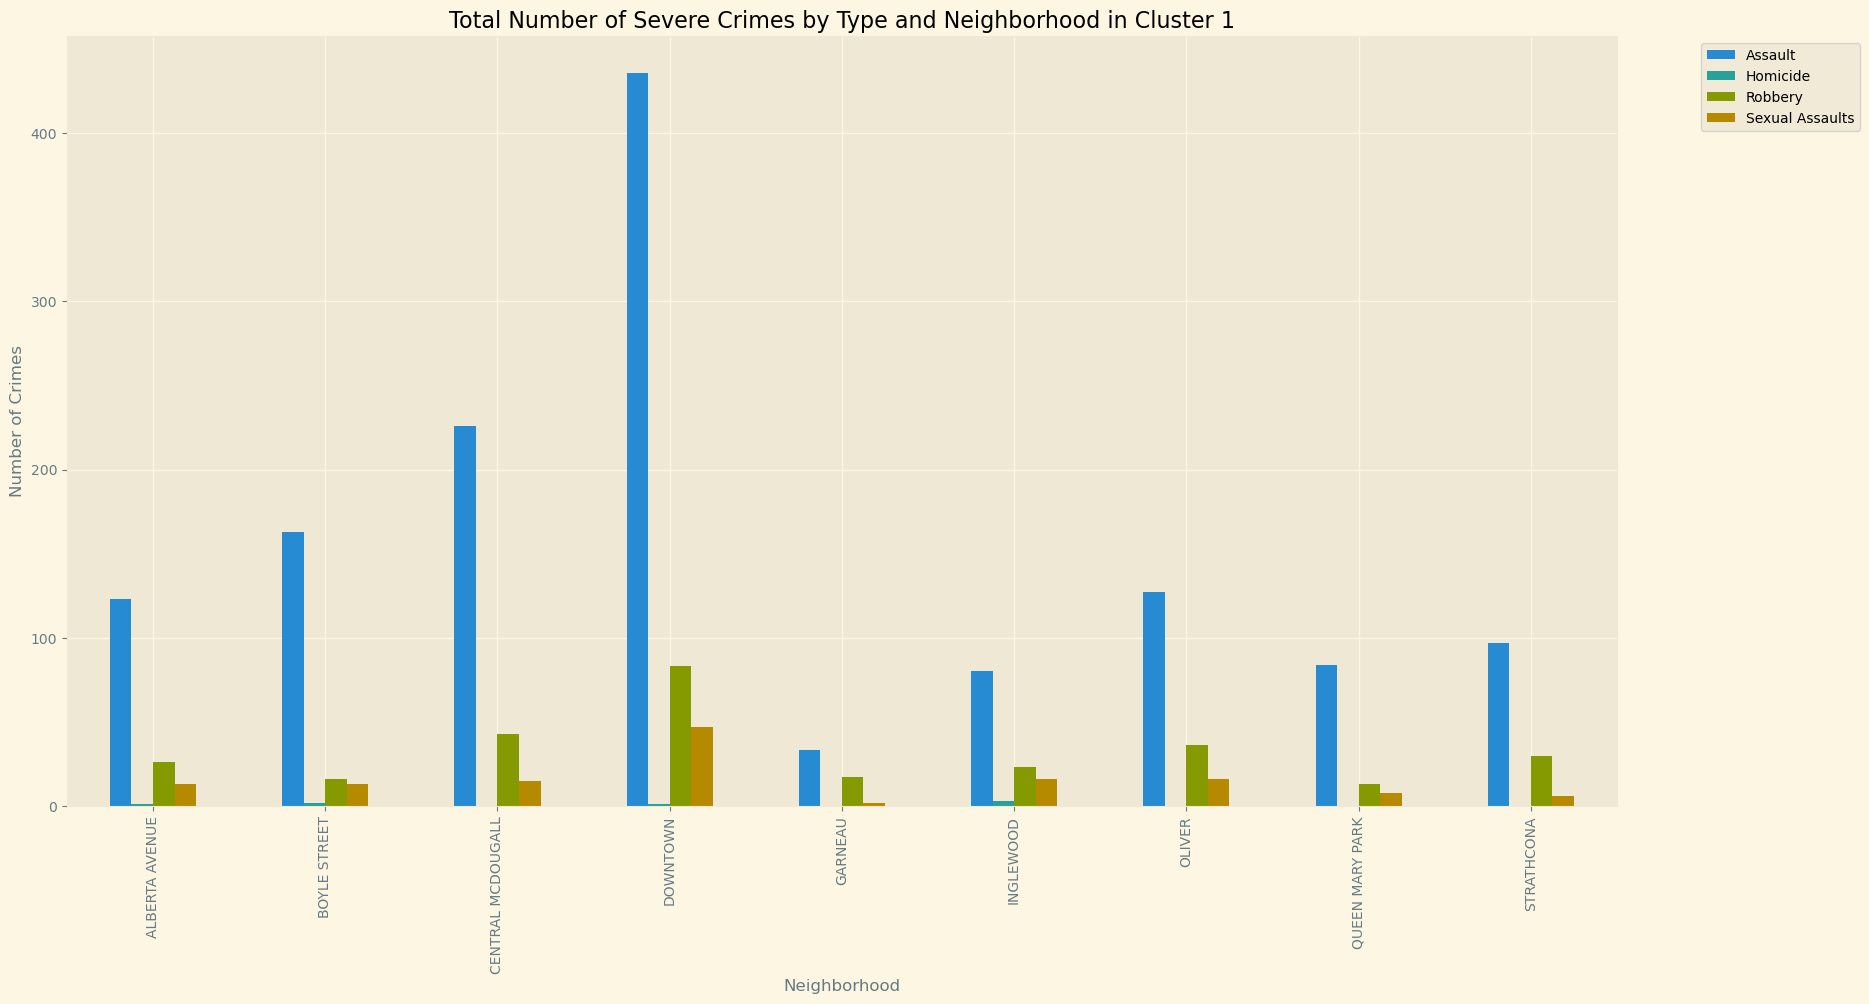

In [64]:
""""This code will create a bar chart that shows the total number of crimes for each type of crime in each neighborhood within cluster 2. 
    The x-axis shows the neighborhoods, and the y-axis shows the total number of crimes. 
    Each color in the bar chart represents a different type of crime. 
    You can use this visualization to see which neighborhoods have the highest crime rates and ..
    which types of crimes are most prevalent in each neighborhood."""

# Create a new dataframe for cluster 2
cluster_2_df = final[final['Cluster_KMeans'] == 1]

# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals = cluster_2_df.groupby('NGH_Name')[['Assault', 'Homicide', 'Robbery', 'Sexual Assaults']].sum()

# Create a bar chart showing the total number of crimes for each type of crime in each neighborhood
crime_totals.plot(kind='bar', figsize=(20,10))
plt.title('Total Number of Severe Crimes by Type and Neighborhood in Cluster 1')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(np.arange(len(crime_totals.index)), crime_totals.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

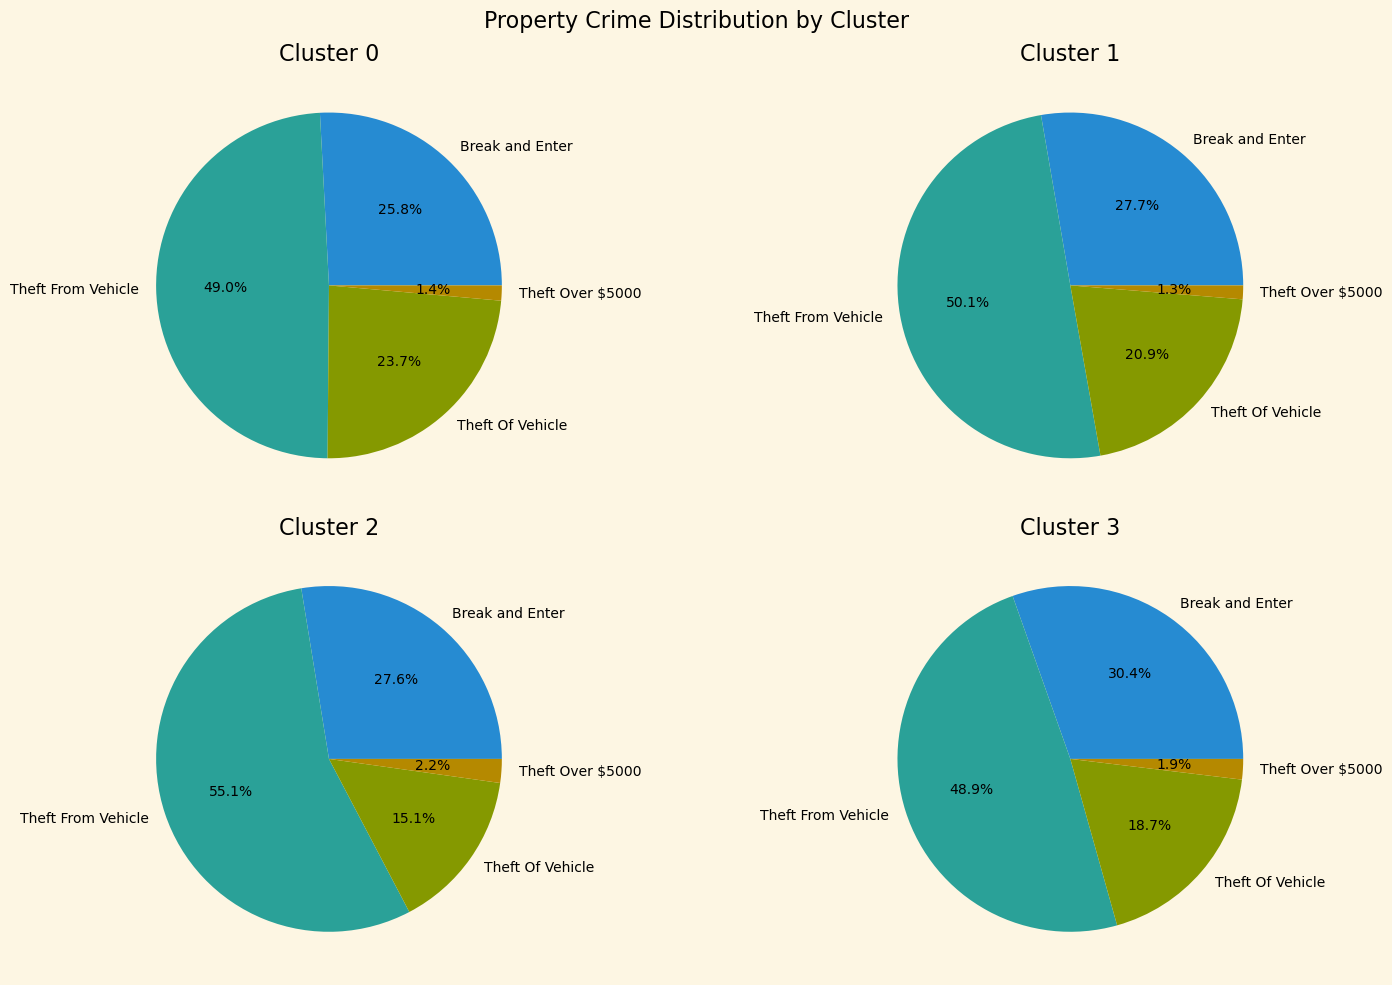

In [65]:
plot_violation_type_distribution(final, "Property Crime")

>Again, surprising results concerning our Cluster_0....

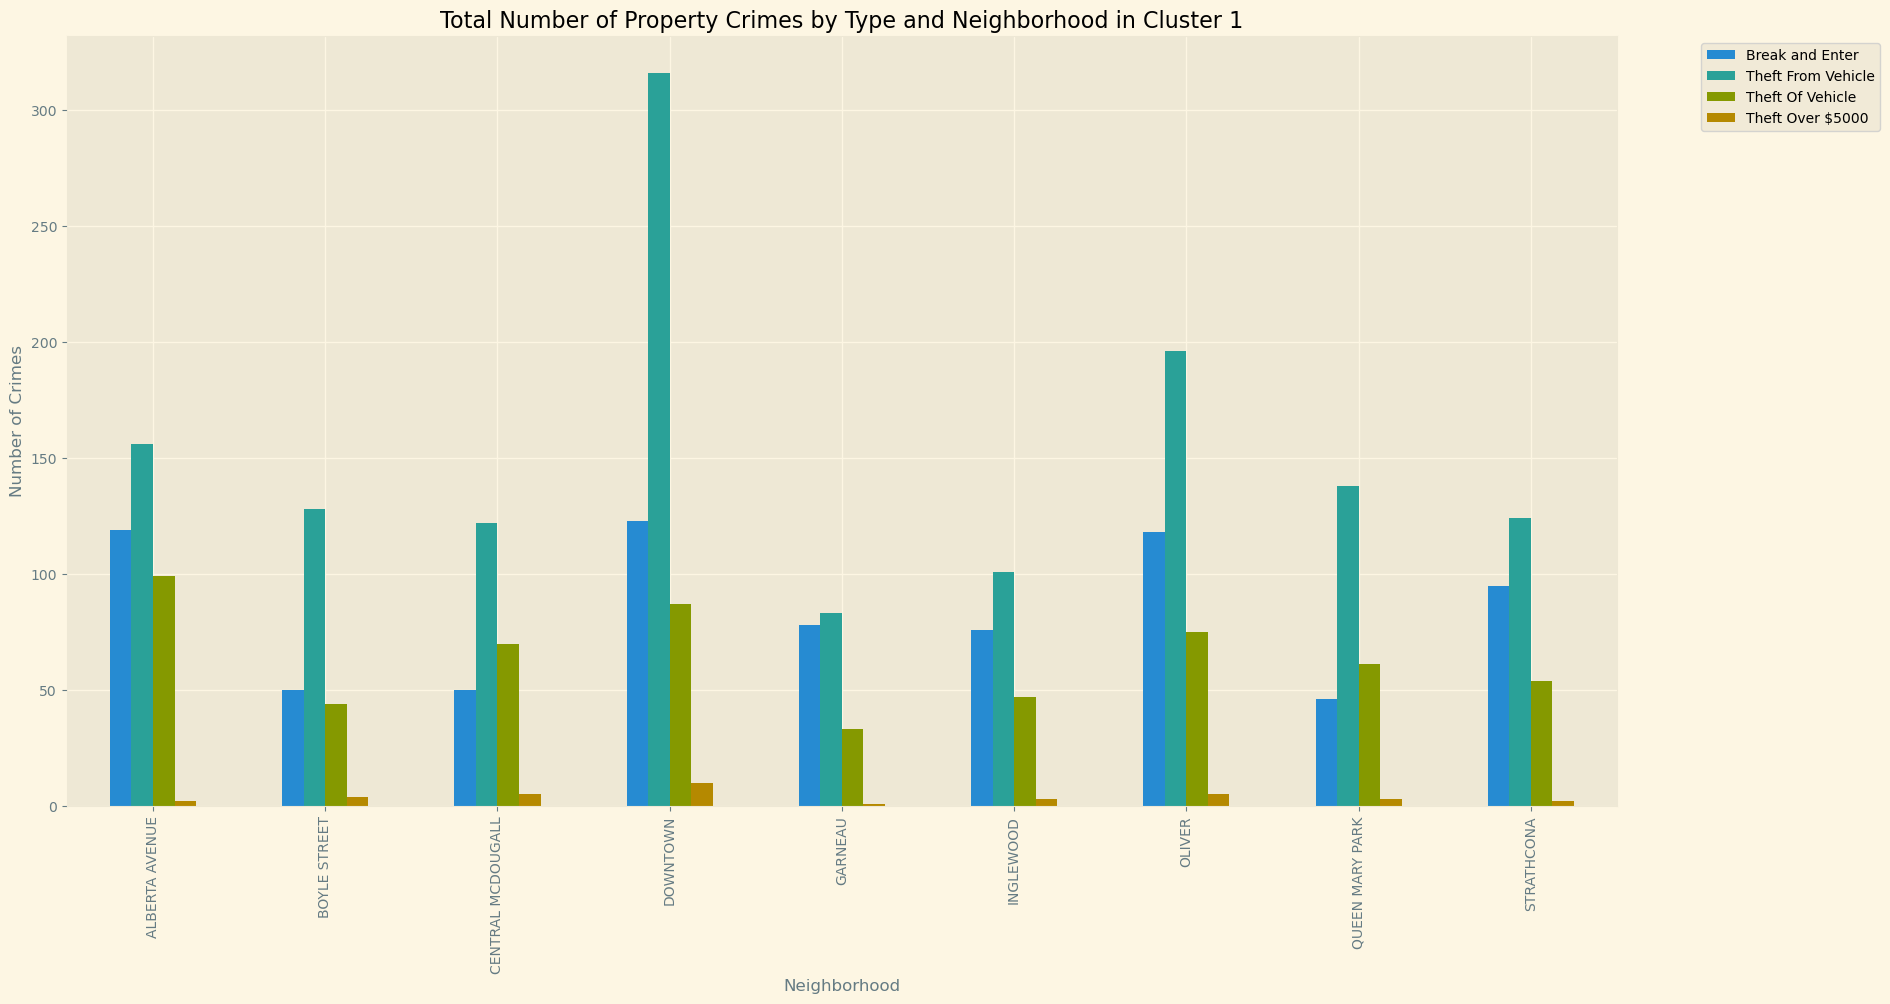

In [66]:
""""This code will create a bar chart that shows the total number of crimes for each type of crime in each neighborhood within cluster 2. 
    The x-axis shows the neighborhoods, and the y-axis shows the total number of crimes. 
    Each color in the bar chart represents a different type of crime. 
    You can use this visualization to see which neighborhoods have the highest crime rates and ..
    which types of crimes are most prevalent in each neighborhood."""

# Create a new dataframe for cluster 2
cluster_0_df = final[final['Cluster_KMeans'] == 1]

# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals = cluster_0_df.groupby('NGH_Name')[['Break and Enter','Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].sum()

# Create a bar chart showing the total number of crimes for each type of crime in each neighborhood
crime_totals.plot(kind='bar', figsize=(20,10))
plt.title('Total Number of Property Crimes by Type and Neighborhood in Cluster 1')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(np.arange(len(crime_totals.index)), crime_totals.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [67]:
# The following funciton build to view boxplots for each cluster defined by:
# Property Crimes, Severe_Crimes, Income_Levels, Employment Status and Education levels for each cluster.
def plot_data_boxplots(data, group_type):
    # Define the variables
    property_crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']
    severe_crime = ['Assault', 'Homicide', 'Robbery', 'Sexual Assaults']
    income_levels = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                     'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                     'Income_200K to less than 250K', 'Income_250K or more']
    employment_status = ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
                         'Permanently Unemployed']
    education_level = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']

    # Select the variable type
    if group_type == 'Property':
        var_cols = property_crime
    elif group_type == 'Severe':
        var_cols = severe_crime
    elif group_type == 'Income':
        var_cols = income_levels
    elif group_type == 'Employment':
        var_cols = employment_status
    elif group_type == 'Education':
        var_cols = education_level
    else:
        raise ValueError('Invalid group type')

    # Create a grid of subplots for the variable boxplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
    plt.subplots_adjust(hspace=0.4)
    for i in range(4):
        row = i // 2
        col = i % 2
        cluster_data = data[data['Cluster_KMeans'].eq(i)]
        sns.boxplot(data=cluster_data[var_cols], ax=axs[row, col])
        axs[row, col].set_title(f'Cluster {i}')
        axs[row, col].tick_params(axis='x', labelrotation=45)

    # Set the title based on the group type
    if group_type == 'Property':
        plt.suptitle('Property Crime Box Plots by Cluster', fontsize=16)
    elif group_type == 'Severe':
        plt.suptitle('Severe Crime Box Plots by Cluster', fontsize=16)
    elif group_type == 'Income':
        plt.suptitle('Income Level Box Plots by Cluster', fontsize=16)
    elif group_type == 'Employment':
        plt.suptitle('Employment Status Box Plots by Cluster', fontsize=16)
    elif group_type == 'Education':
        plt.suptitle('Education Level Box Plots by Cluster', fontsize=16)
    else:
        raise ValueError('Invalid group type')

    plt.show()

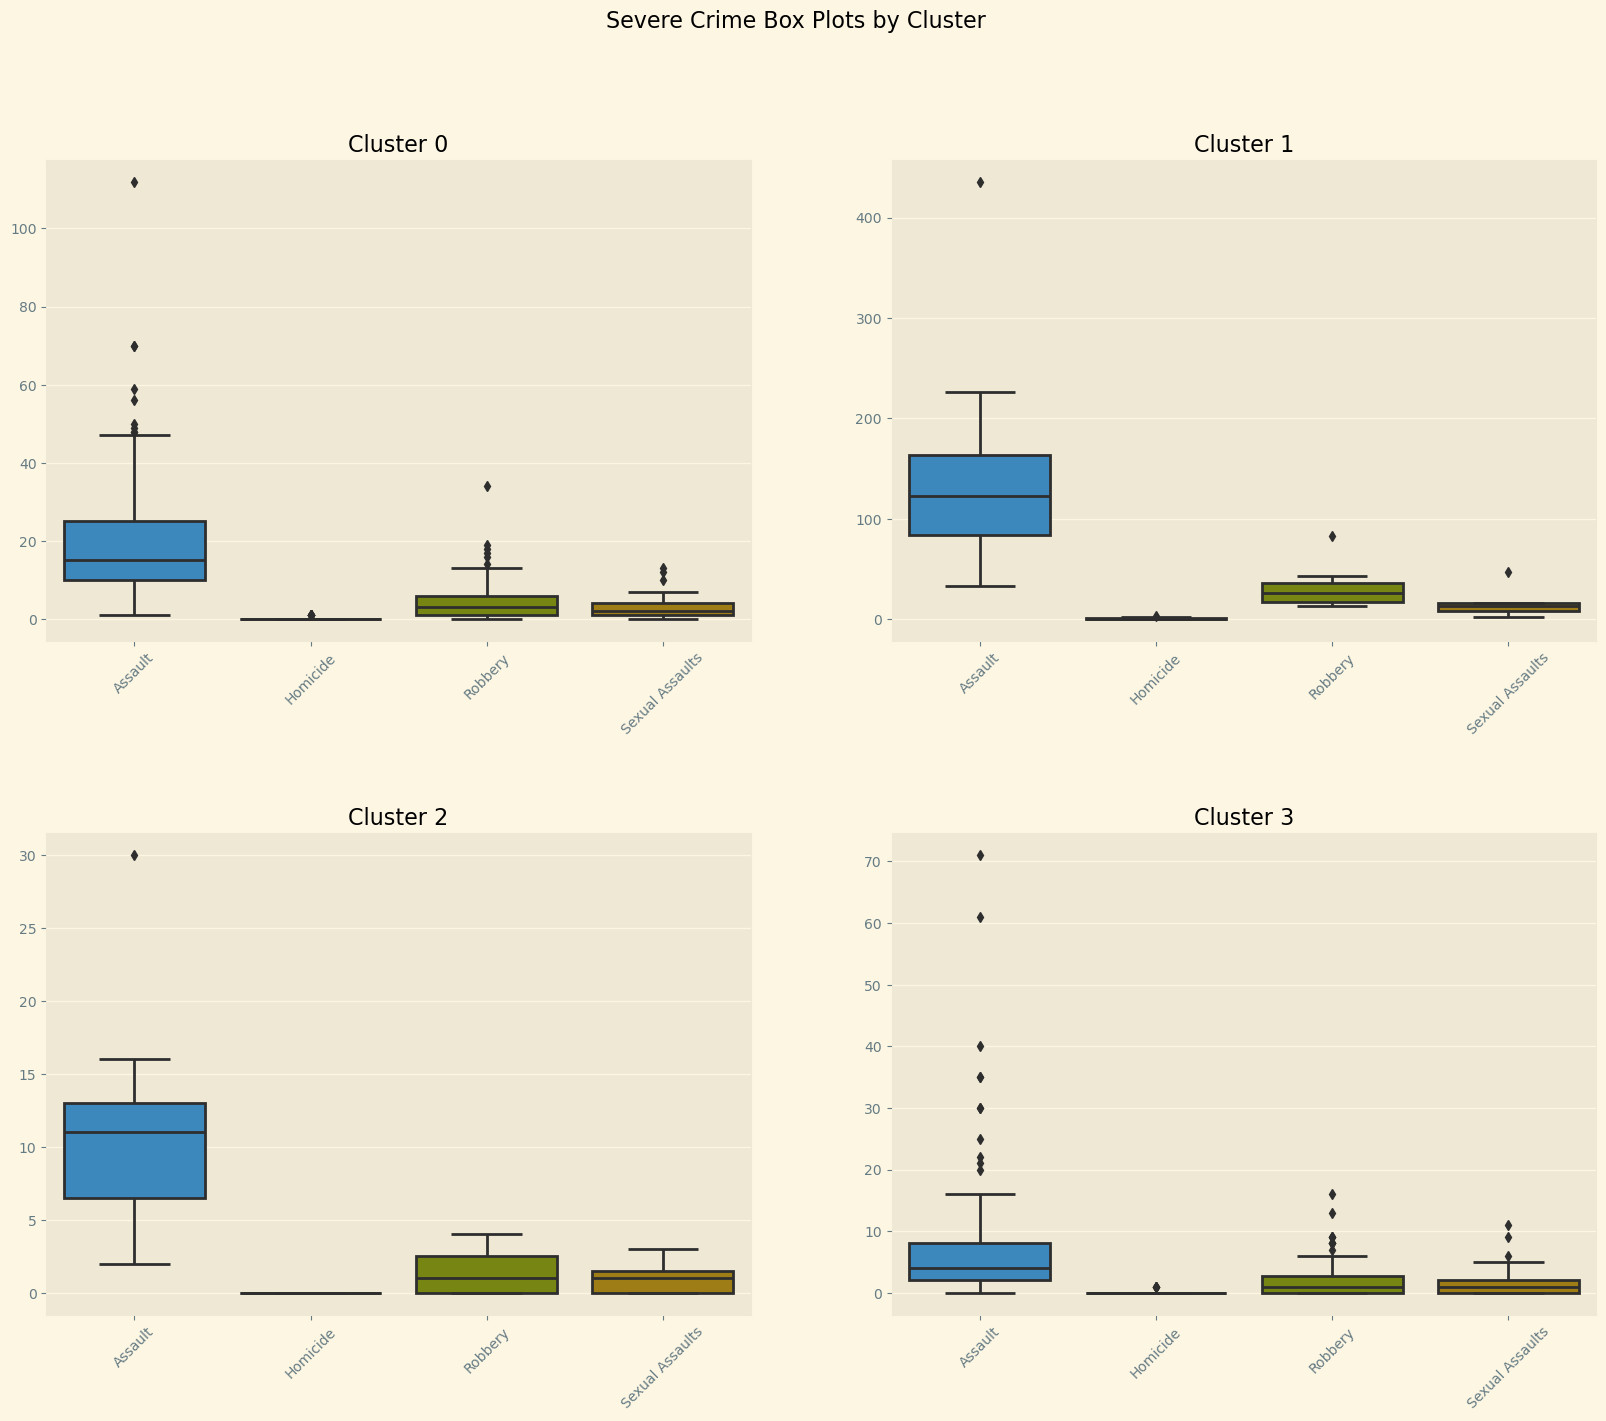

In [68]:
# Severe Crimes by Cluster
plot_data_boxplots(final, 'Severe')

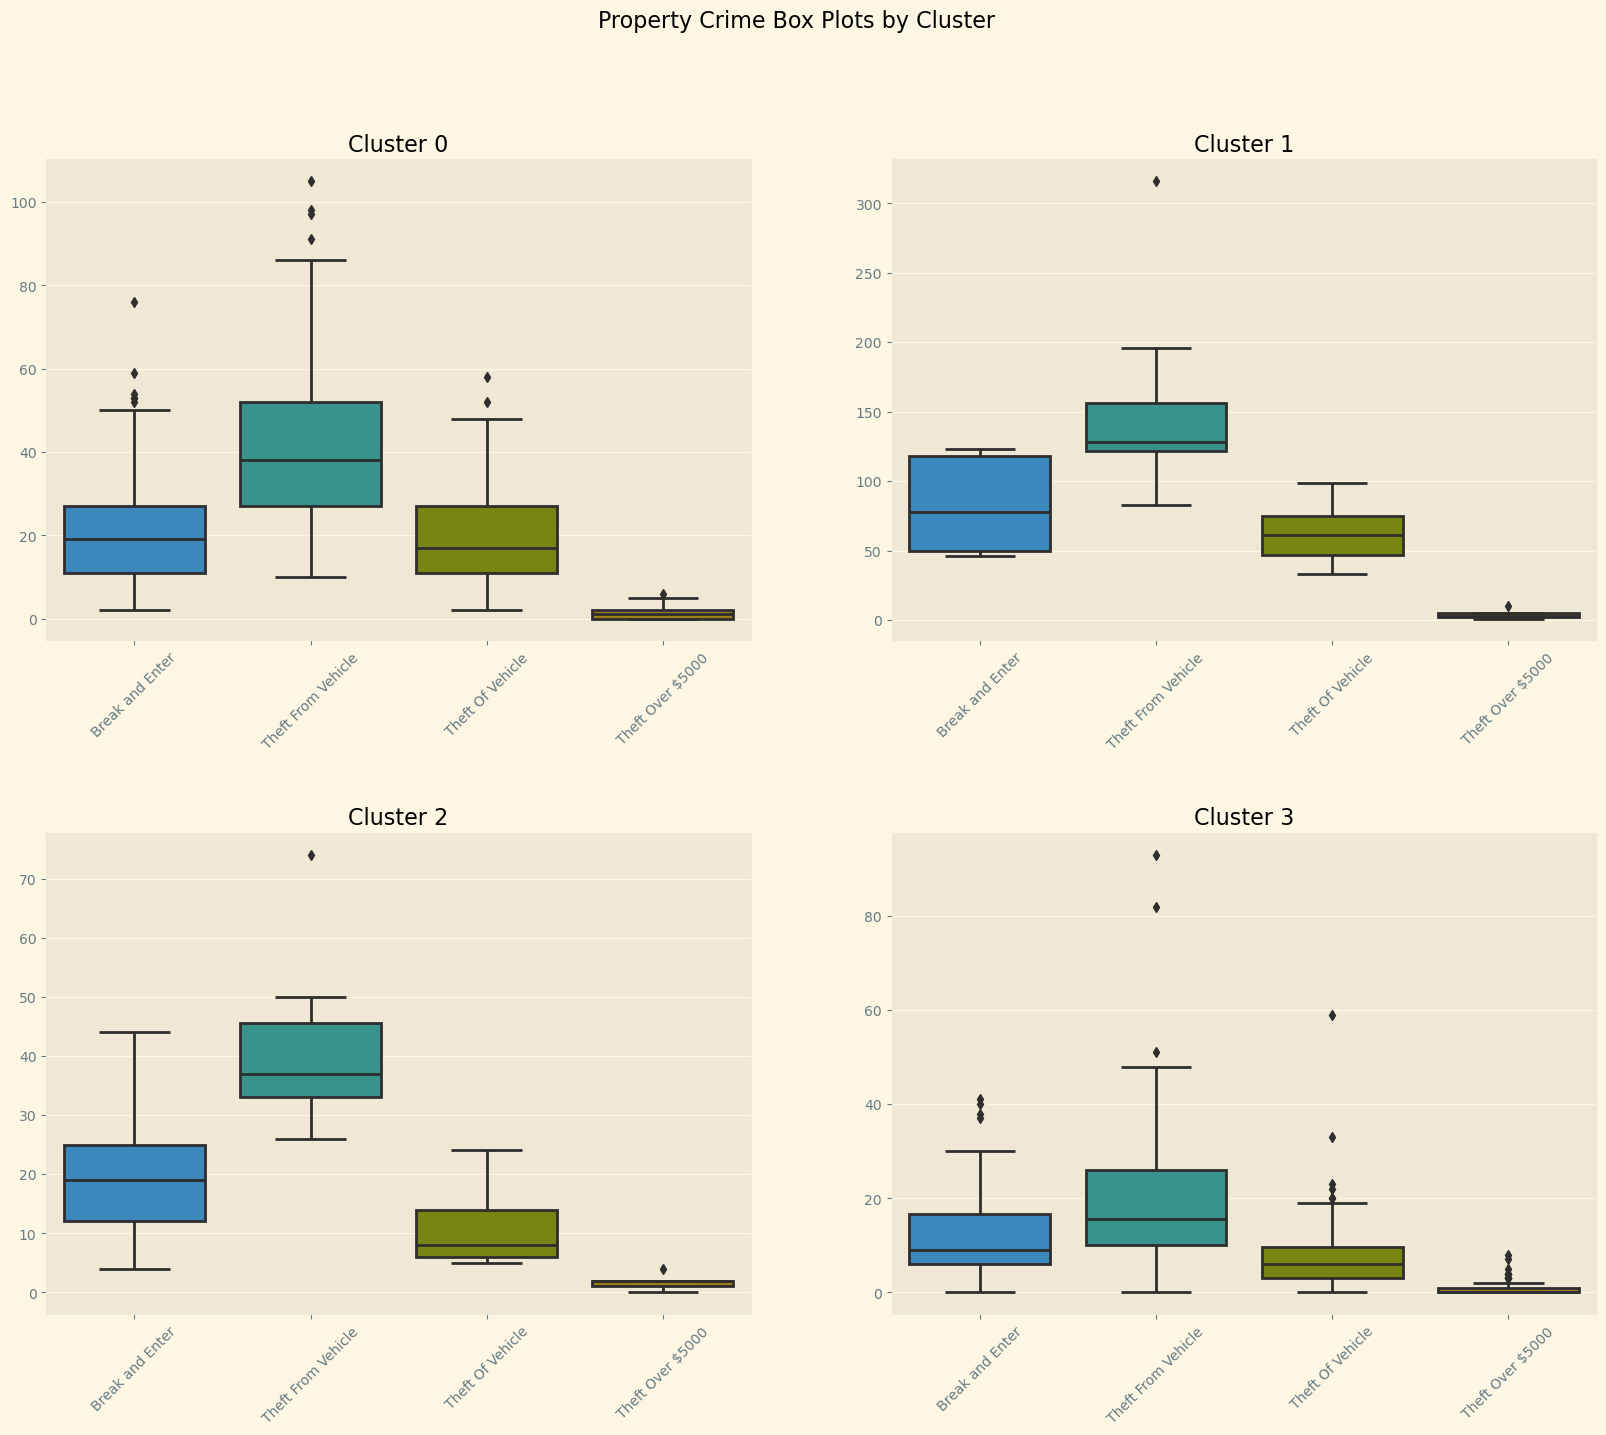

In [69]:
#Property Crimes by Cluster
plot_data_boxplots(final, 'Property')

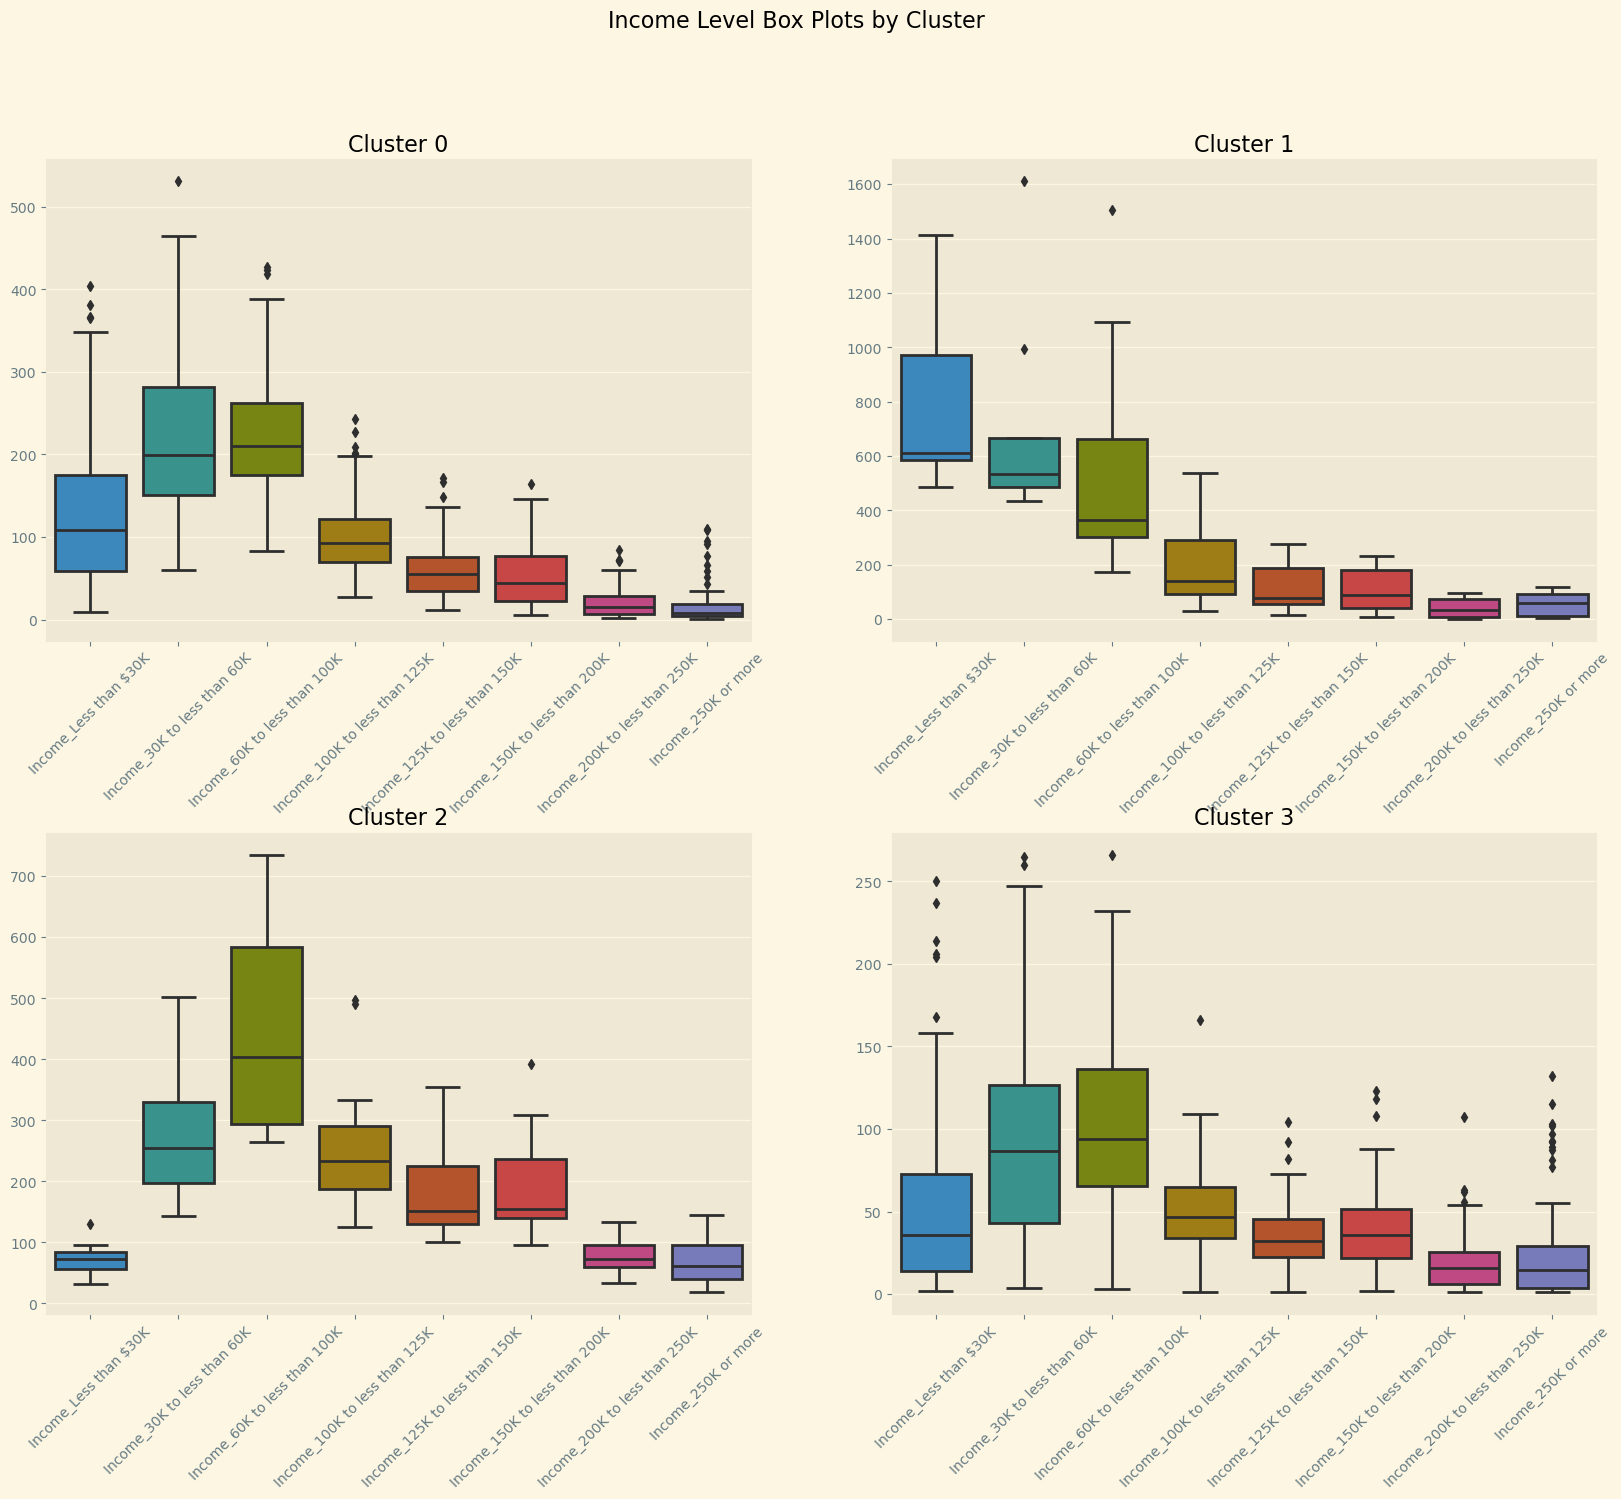

In [70]:
# Income distribution by Cluster
plot_data_boxplots(final, 'Income')

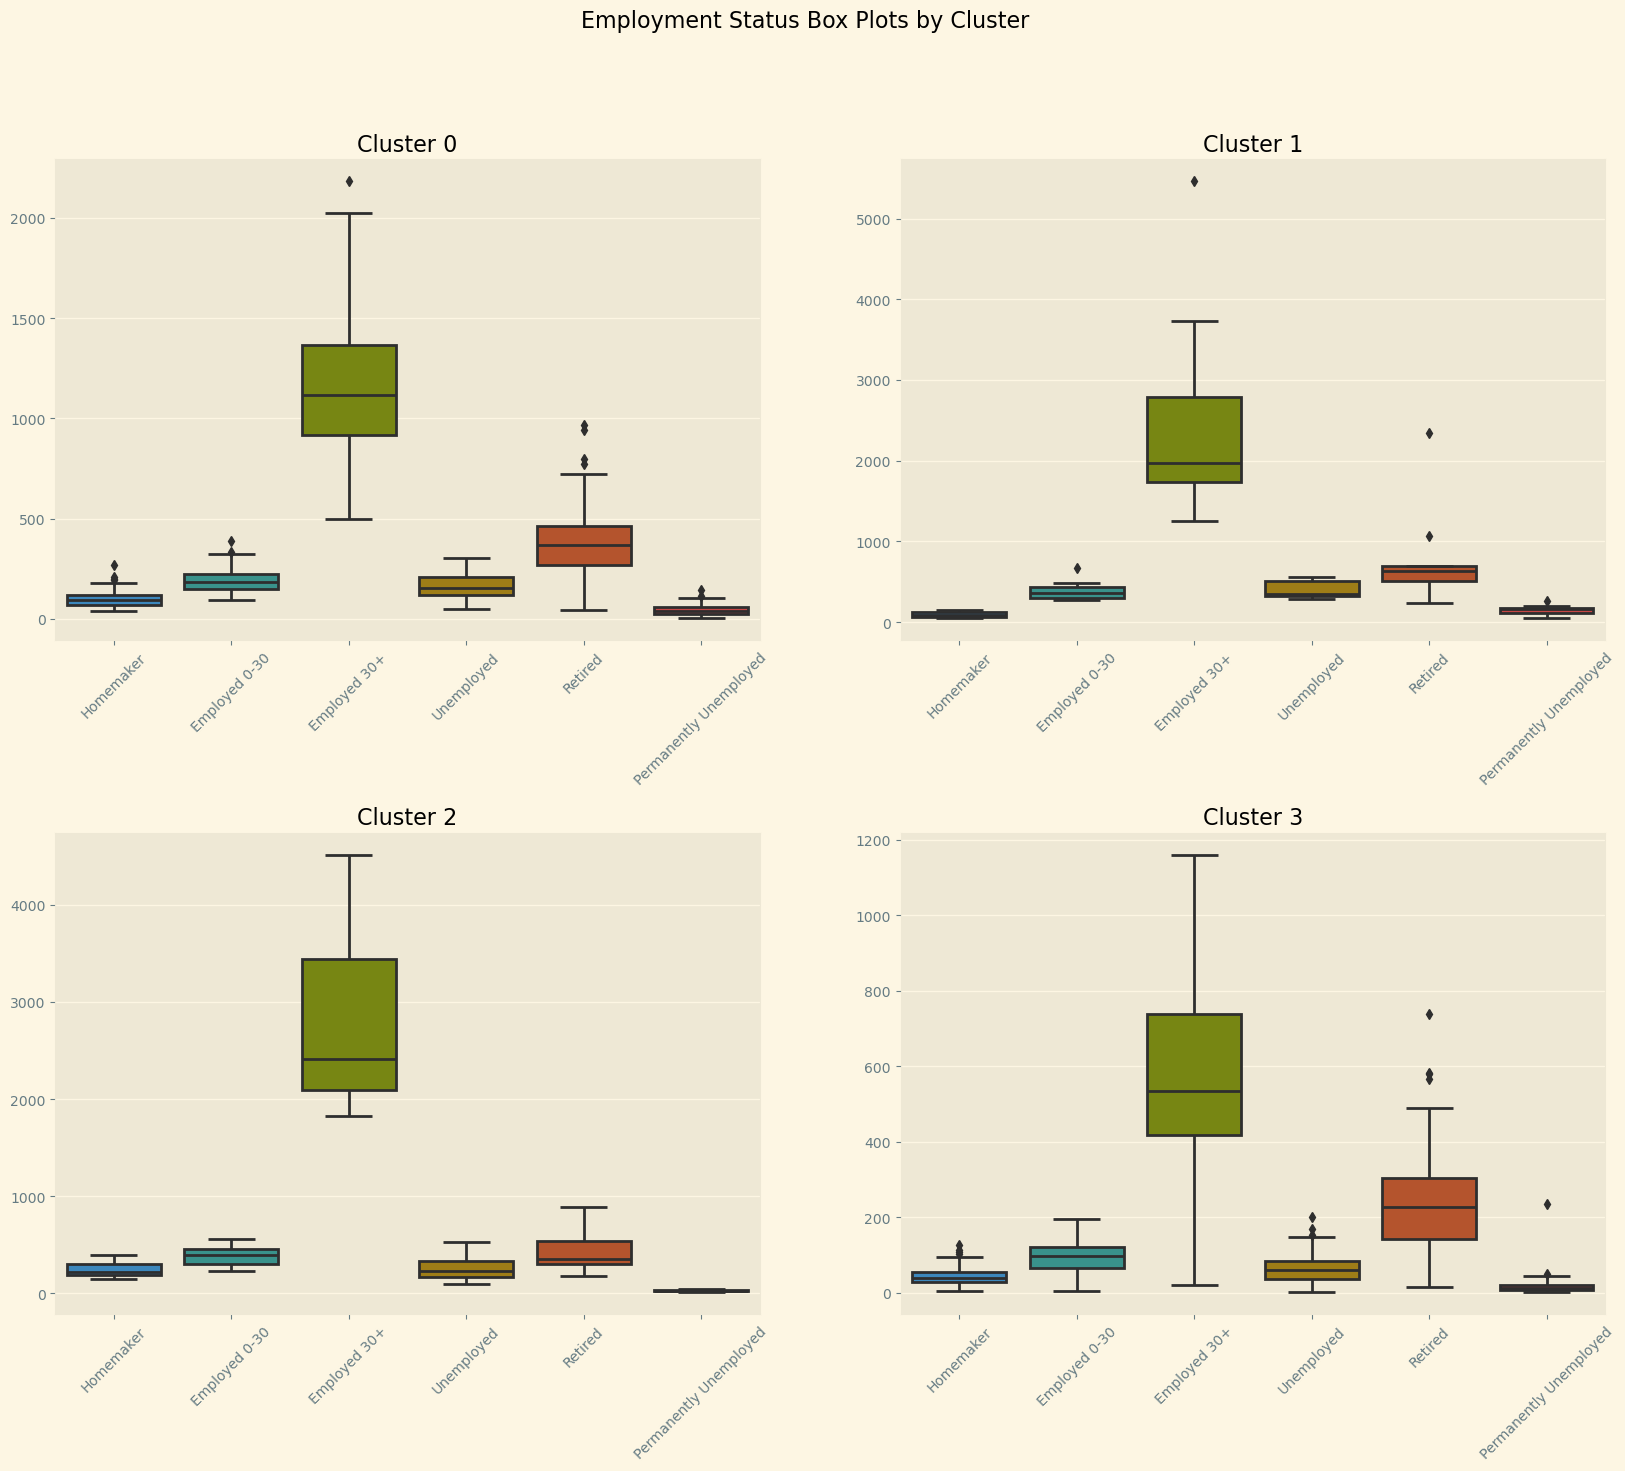

In [71]:
# Employment Status by Cluster
plot_data_boxplots(final, 'Employment')

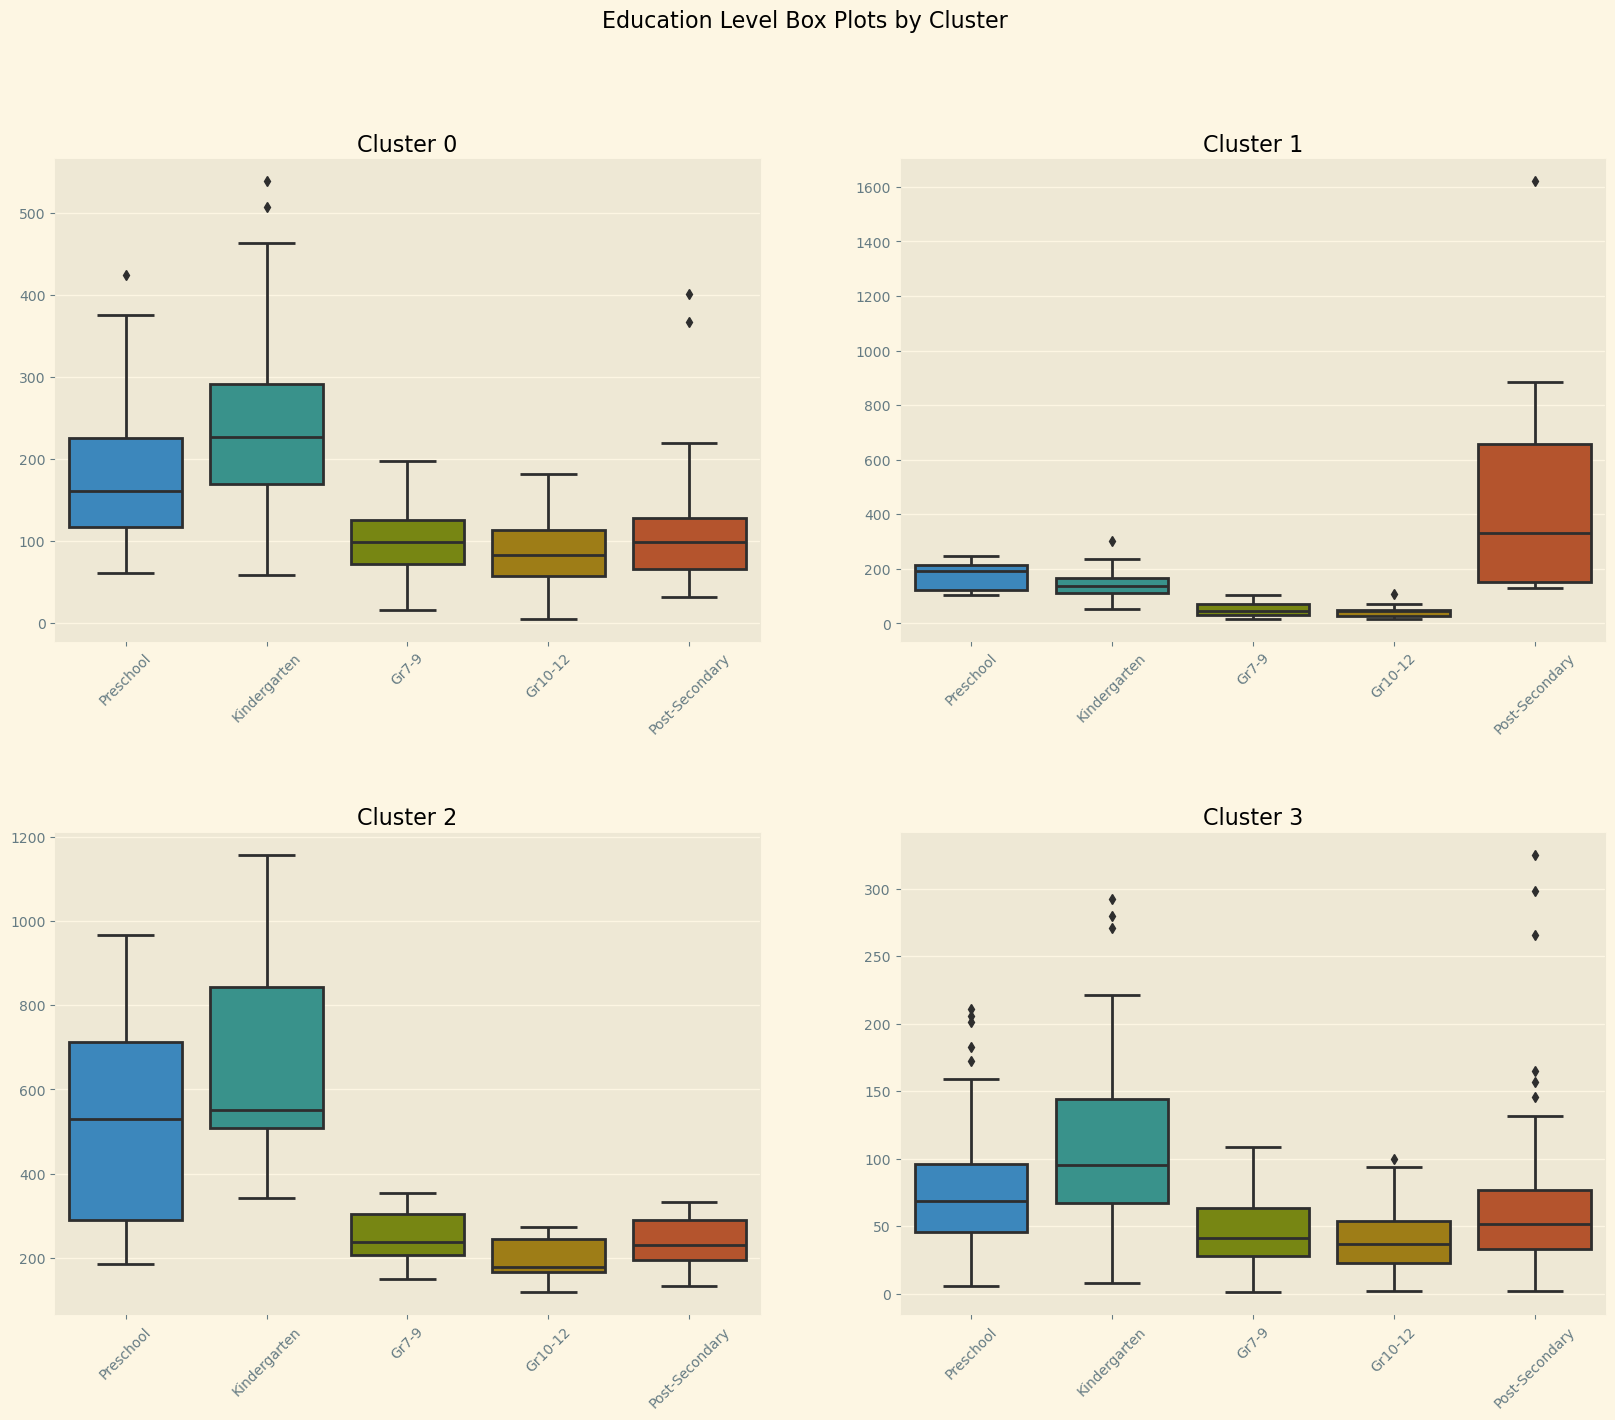

In [72]:
#Education Level by Cluster
plot_data_boxplots(final, 'Education')

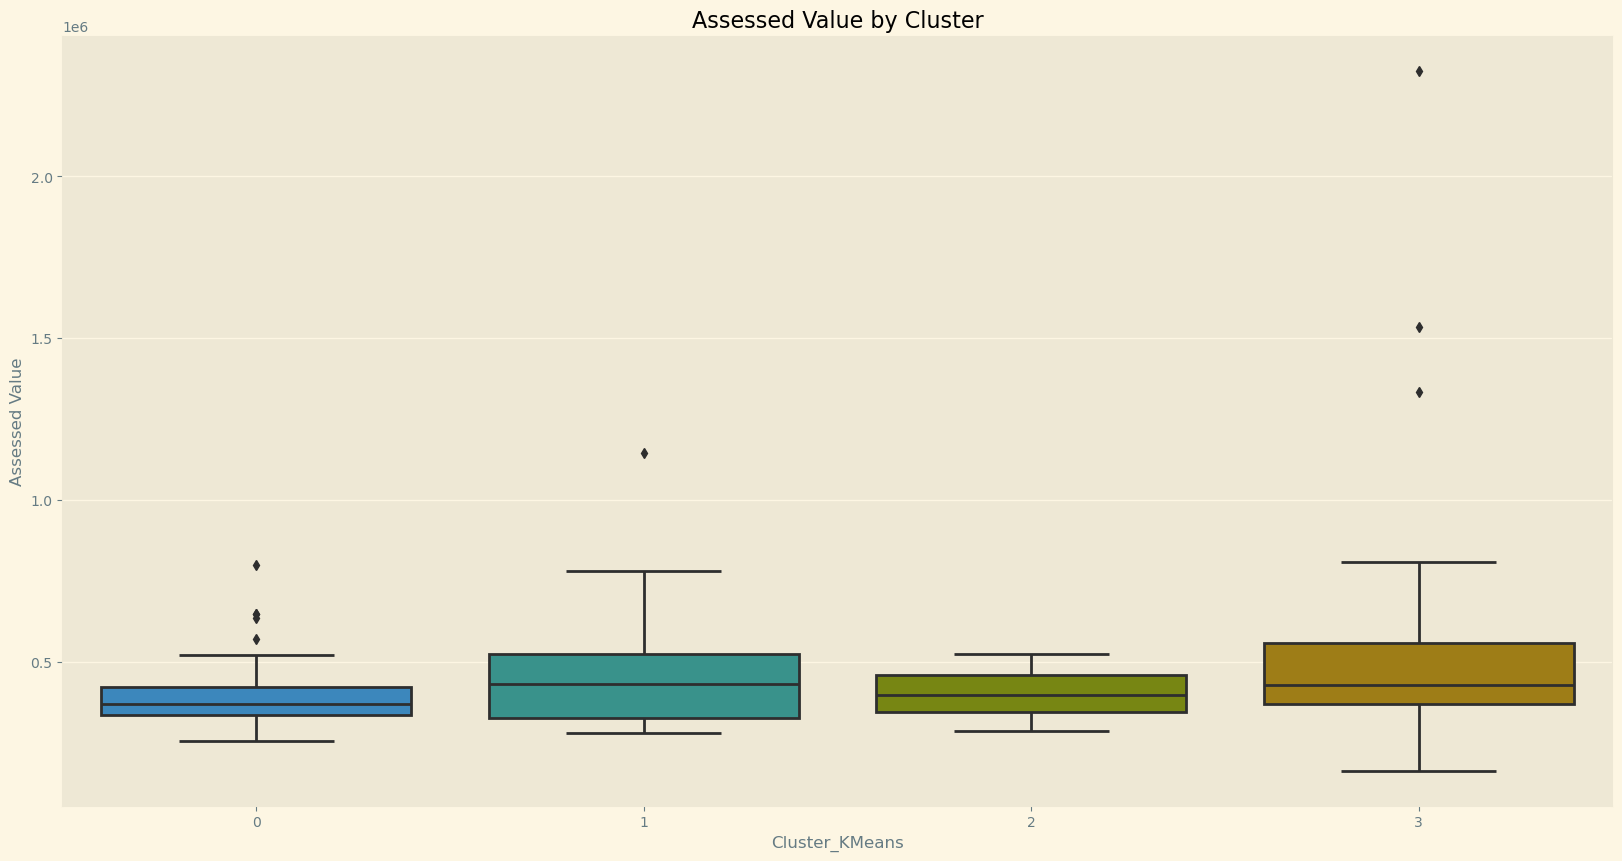

In [73]:
# Property Assessment Values by Cluster
# Set the figure size
plt.figure(figsize=(20,10))

# Create a boxplot of the Assessed Value by Cluster
sns.boxplot(x='Cluster_KMeans', y='Assessed Value', data=final)
plt.title('Assessed Value by Cluster')
plt.show()

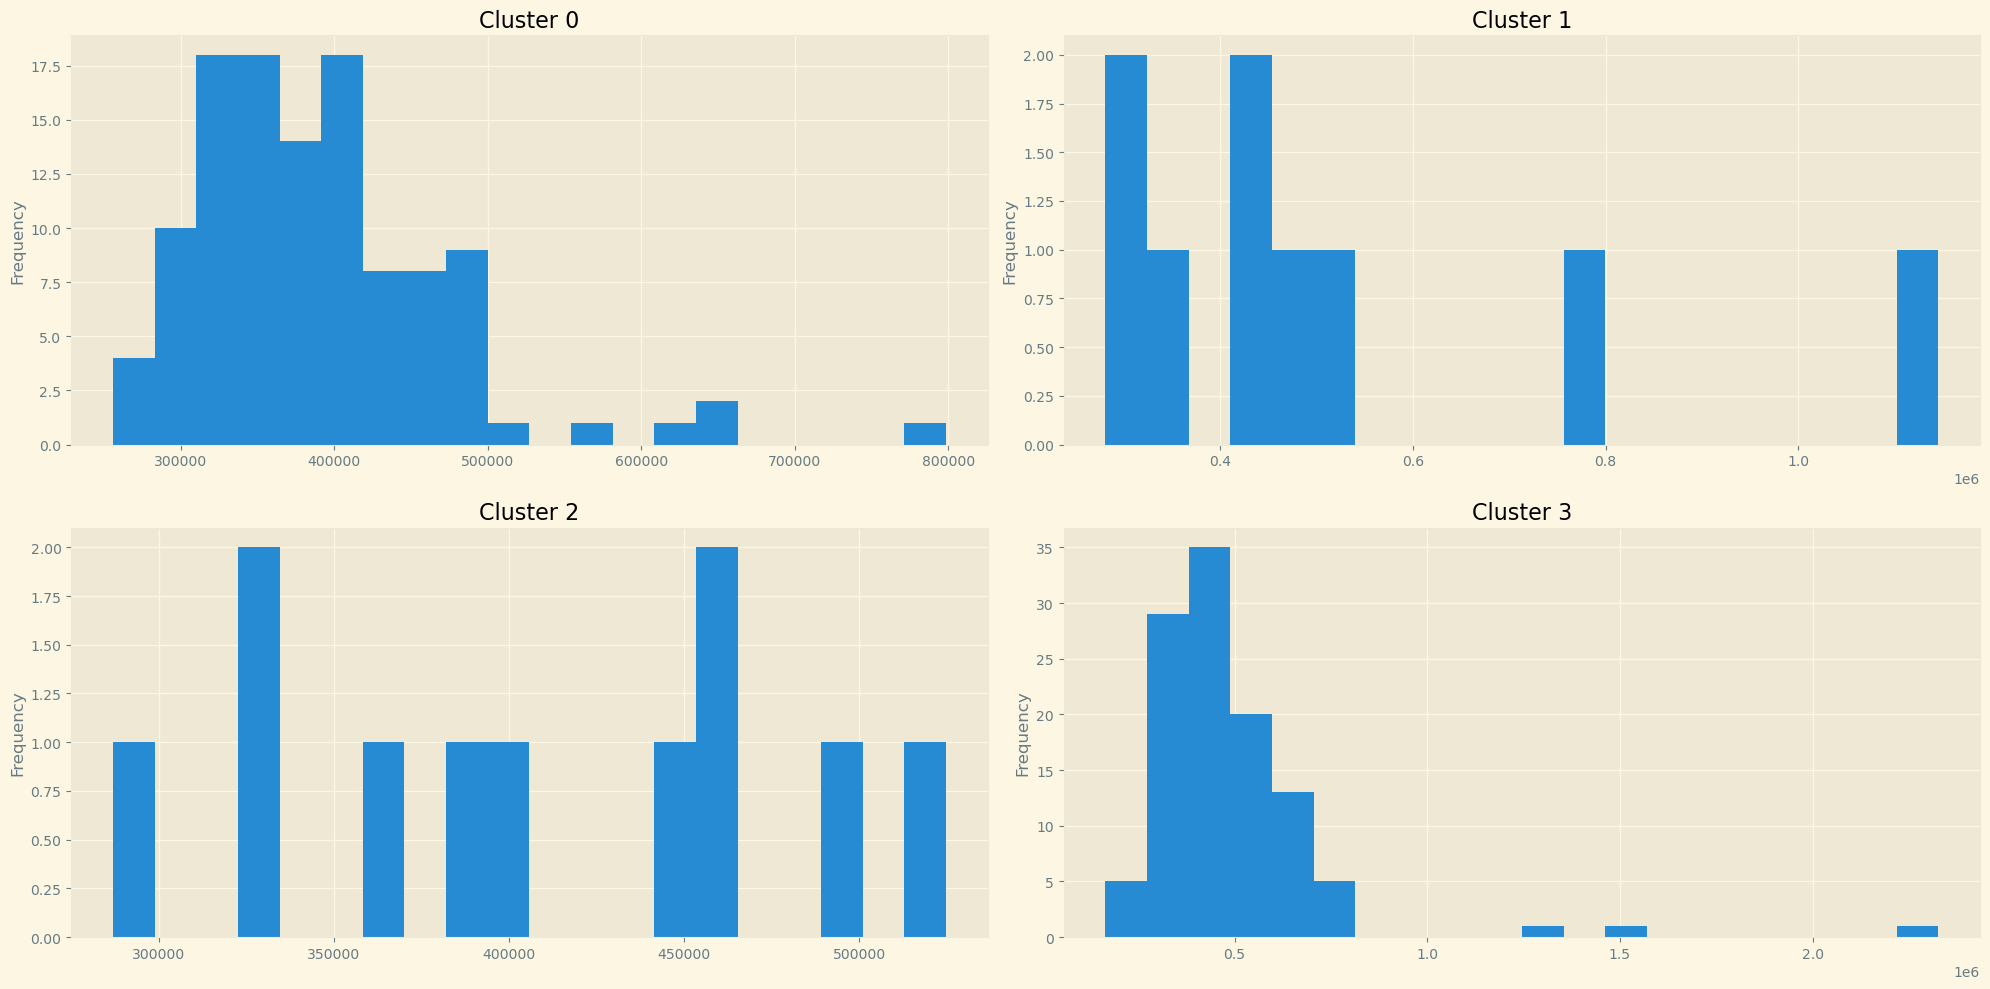

In [74]:
# Create a bar plot of the assessed value for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = final[final['Cluster_KMeans'].eq(i) & (final['Assessed Value'] > 10000)]
    cluster_data['Assessed Value'].plot(kind='hist', bins=20, ax=axs[i//2, i%2], title=f'Cluster {i}')
    
plt.tight_layout()
plt.show()

>Going deeper into investigating the Clusters by Income Levels, Education Levels and Employment Status.

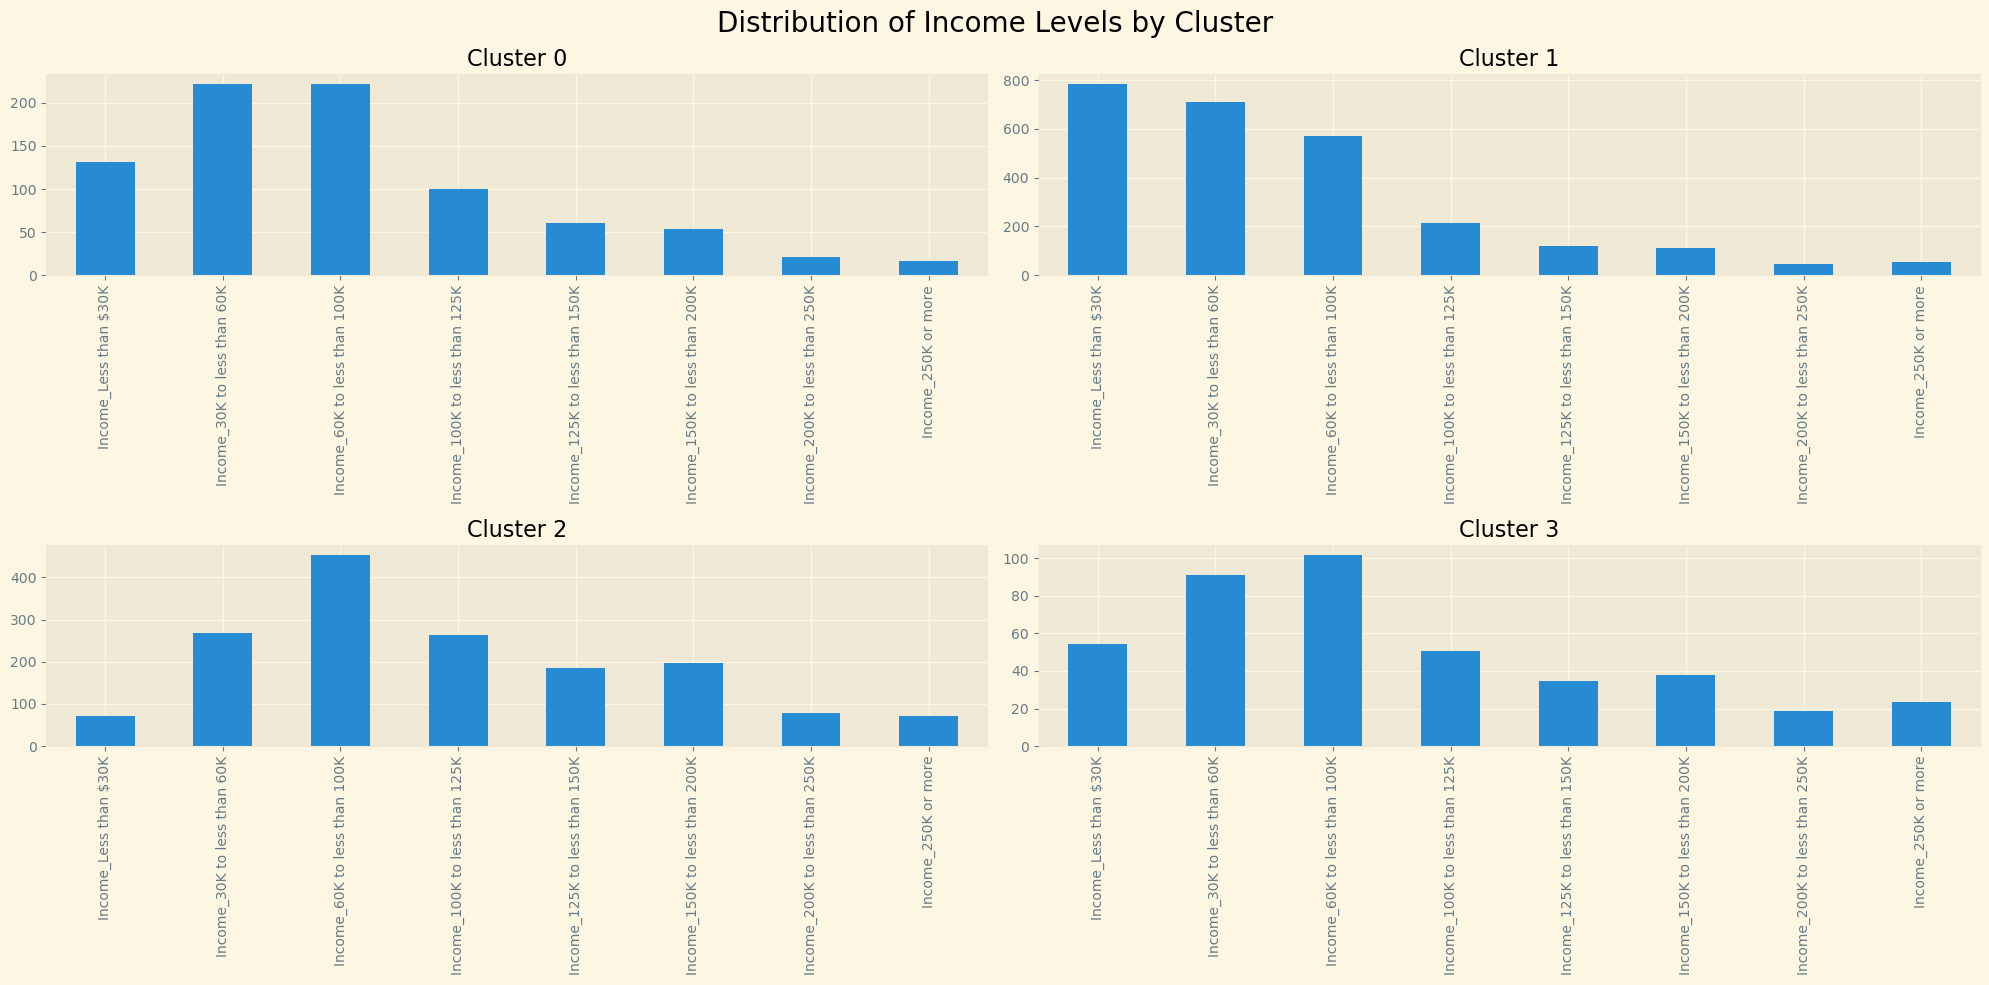

In [75]:
# Create a bar plot of the income levels for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = final[final['Cluster_KMeans'].eq(i)]
    income_cols = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                   'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                   'Income_200K to less than 250K', 'Income_250K or more']
    cluster_data[income_cols].mean().plot(kind='bar', ax=axs[i//2, i%2], title=f'Cluster {i}')
plt.suptitle('Distribution of Income Levels by Cluster', fontsize=20)

plt.tight_layout()
plt.show()

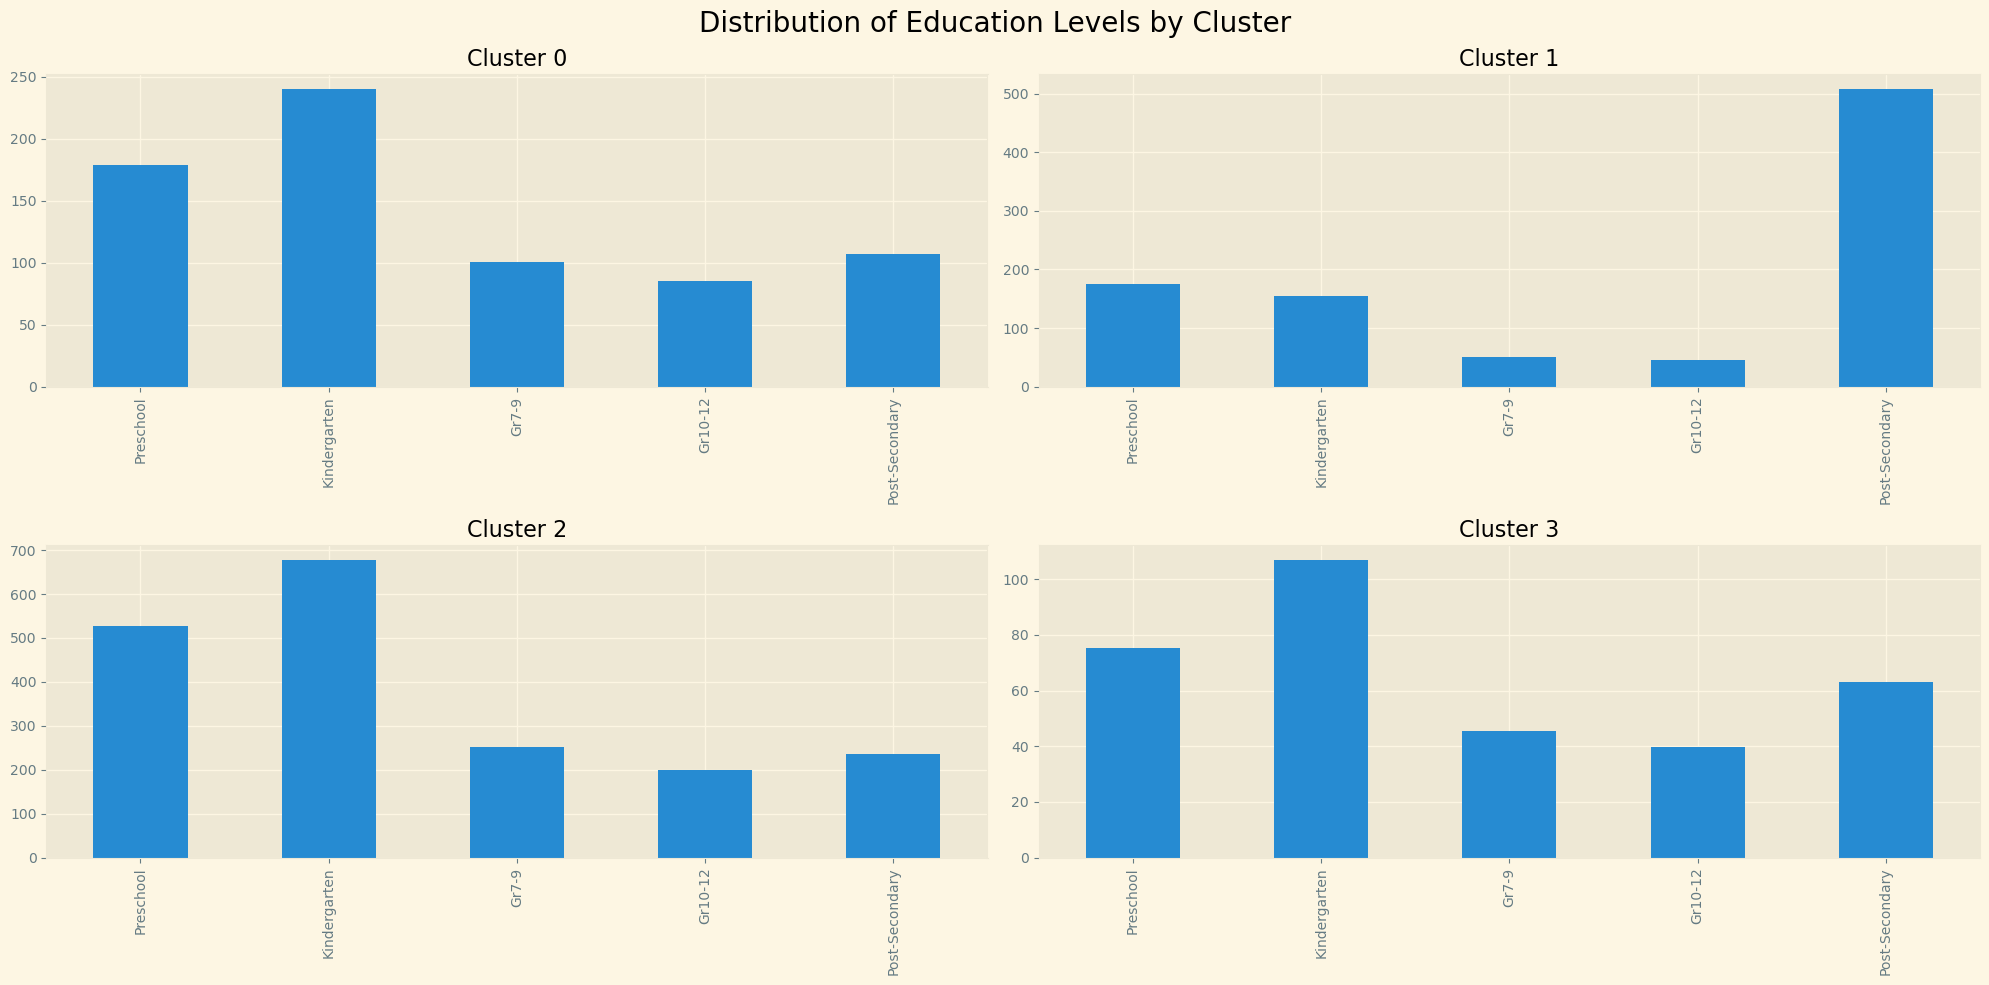

In [76]:
# Create a bar plot of the Education levels for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = final[final['Cluster_KMeans'].eq(i)]
    education_cols = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']
    cluster_data[education_cols].mean().plot(kind='bar', ax=axs[i//2, i%2], title=f'Cluster {i}')
plt.suptitle('Distribution of Education Levels by Cluster', fontsize=20)
plt.tight_layout()
plt.show()

In [77]:
final.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Assessed Value', 'Cluster_KMeans'],
      dtype='object')

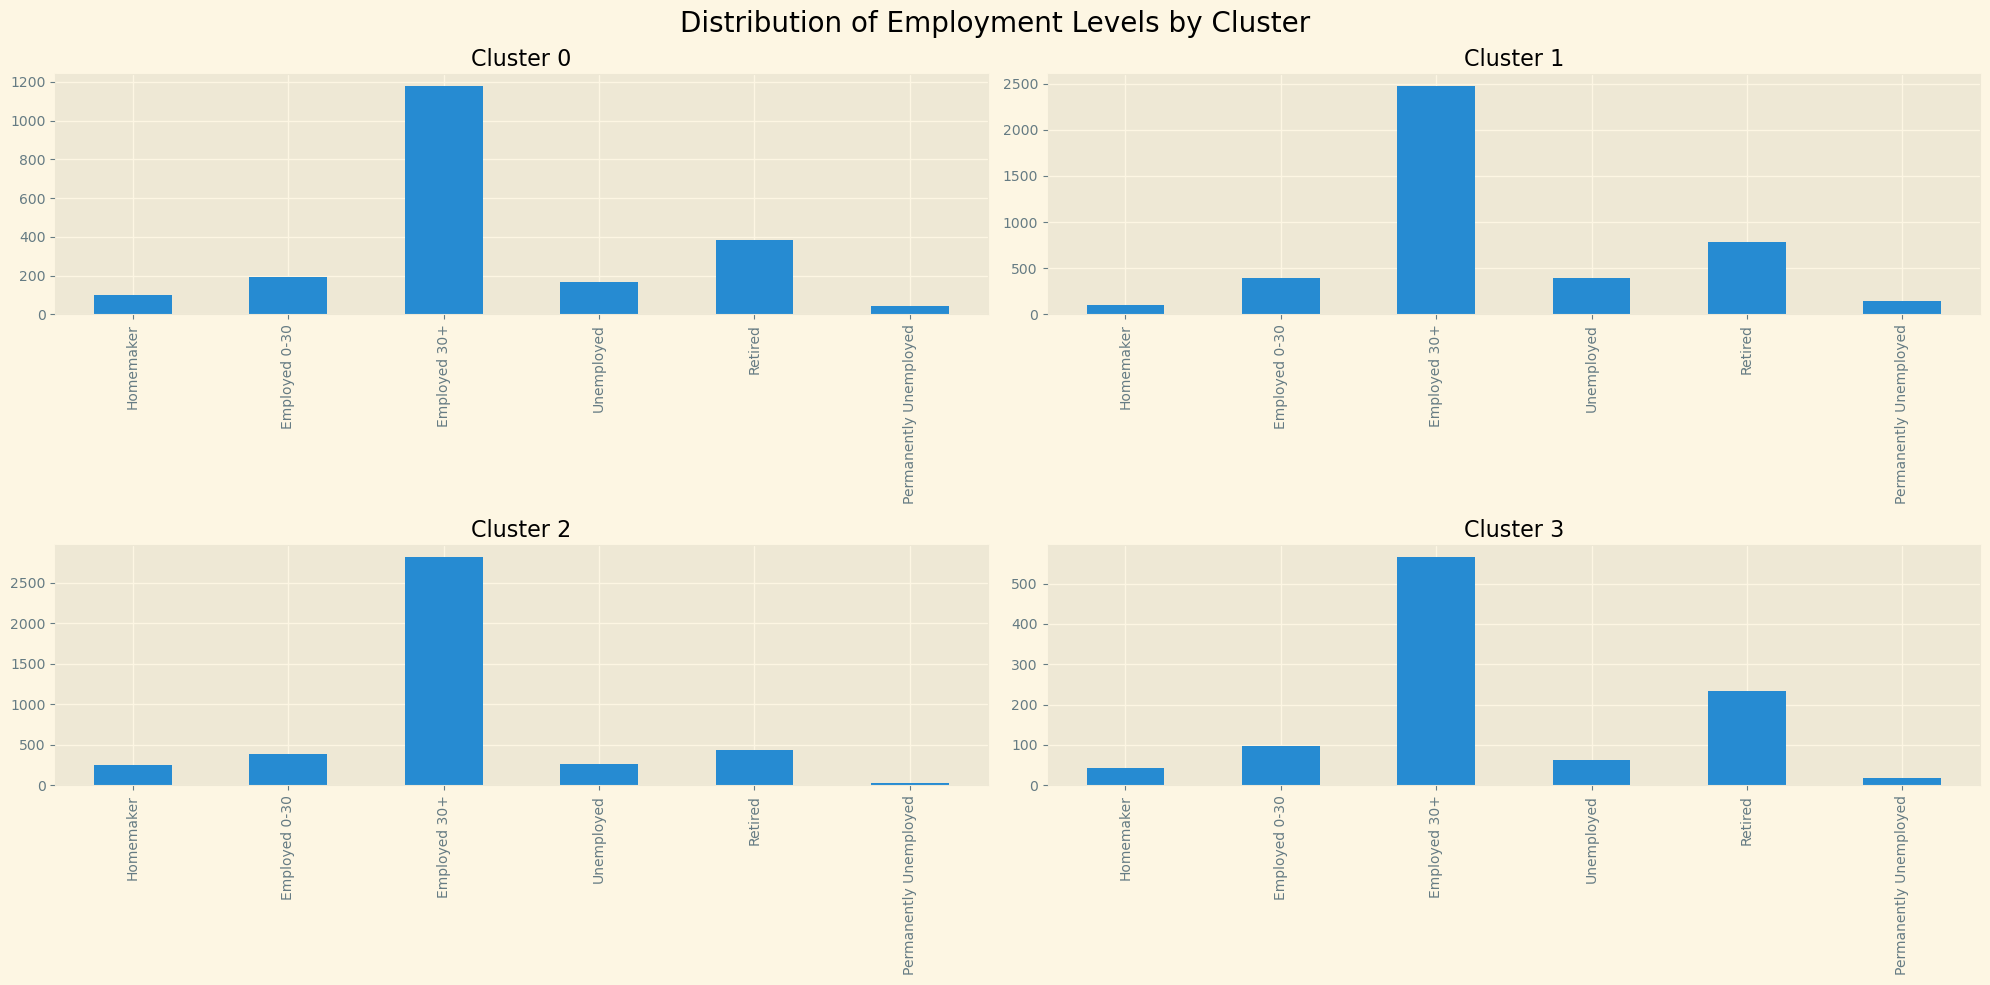

In [78]:
# Create a bar plot of the Education levels for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = final[final['Cluster_KMeans'].eq(i)]
    education_cols = ['Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed']
    cluster_data[education_cols].mean().plot(kind='bar', ax=axs[i//2, i%2], title=f'Cluster {i}')
plt.suptitle('Distribution of Employment Levels by Cluster', fontsize=20)
plt.tight_layout()
plt.show()

The presence of a high number of individuals with post-secondary education in Cluster 1 with the highest crime rates can be explained by various factors. For example, it could be that individuals with higher education levels are more likely to report crimes, leading to higher crime rates in areas with more educated residents. Additionally, areas with more educated residents may be more densely populated, which can lead to more crime.

Regarding the income levels in Cluster 0, it's possible that areas with higher crime rates tend to have lower average incomes due to various factors, such as a lack of economic opportunities or higher unemployment rates. Additionally, it's possible that individuals with lower incomes may be more vulnerable to becoming victims of crimes, such as theft and robbery, which could contribute to higher crime rates in areas with lower-income residents.

Lets look at the Demographic Characteristics in Clusters with High and Lower rates of Crimes. First we will look at the Income Level:
<li>Cluster_3 which has the lowest Crime Rates
<li>Cluster_1 which has the highest Crime rates

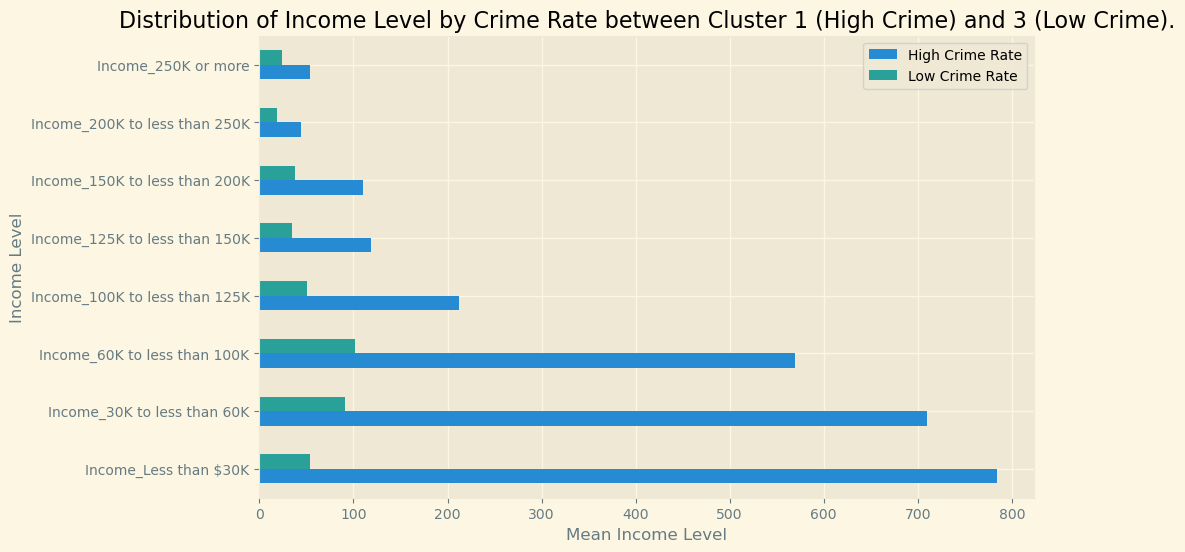

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the Income Level columns for each cluster
cluster1_income = final.loc[final['Cluster_KMeans'] == 1, 
                            ['Income_Less than $30K', 'Income_30K to less than 60K',
                             'Income_60K to less than 100K', 'Income_100K to less than 125K',
                             'Income_125K to less than 150K', 'Income_150K to less than 200K',
                             'Income_200K to less than 250K', 'Income_250K or more']]
cluster3_income = final.loc[final['Cluster_KMeans'] == 3, 
                            ['Income_Less than $30K', 'Income_30K to less than 60K',
                             'Income_60K to less than 100K', 'Income_100K to less than 125K',
                             'Income_125K to less than 150K', 'Income_150K to less than 200K',
                             'Income_200K to less than 250K', 'Income_250K or more']]

# Calculate the mean income level for each cluster
cluster1_income_mean = cluster1_income.mean()
cluster3_income_mean = cluster3_income.mean()

# Combine the means into a dataframe
income_mean_df = pd.concat([cluster1_income_mean, cluster3_income_mean], axis=1)
income_mean_df.columns = ['High Crime Rate', 'Low Crime Rate']

# Create a horizontal barplot
ax = income_mean_df.plot(kind='barh', figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Distribution of Income Level by Crime Rate between Cluster 1 (High Crime) and 3 (Low Crime).')
ax.set_xlabel('Mean Income Level')
ax.set_ylabel('Income Level')

# Show the chart
plt.show()


Education Level

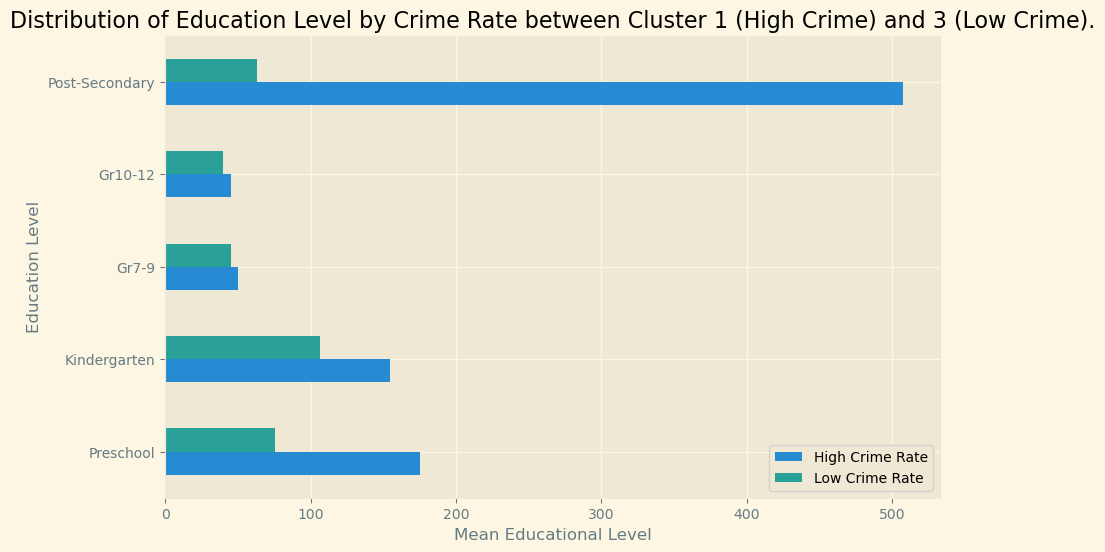

In [80]:
# Select the Income Level columns for each cluster
cluster1_education = final.loc[final['Cluster_KMeans'] == 1, 
                            ['Preschool','Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']]
cluster3_education = final.loc[final['Cluster_KMeans'] == 3, 
                            ['Preschool','Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']]

# Calculate the mean income level for each cluster
cluster1_education_mean = cluster1_education.mean()
cluster3_education_mean = cluster3_education.mean()

# Combine the means into a dataframe
education_mean_df = pd.concat([cluster1_education_mean, cluster3_education_mean], axis=1)
education_mean_df.columns = ['High Crime Rate', 'Low Crime Rate']

# Create a horizontal barplot
ax = education_mean_df.plot(kind='barh', figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Distribution of Education Level by Crime Rate between Cluster 1 (High Crime) and 3 (Low Crime).')
ax.set_xlabel('Mean Educational Level')
ax.set_ylabel('Education Level')

# Show the chart
plt.show()

What about Employment Status?

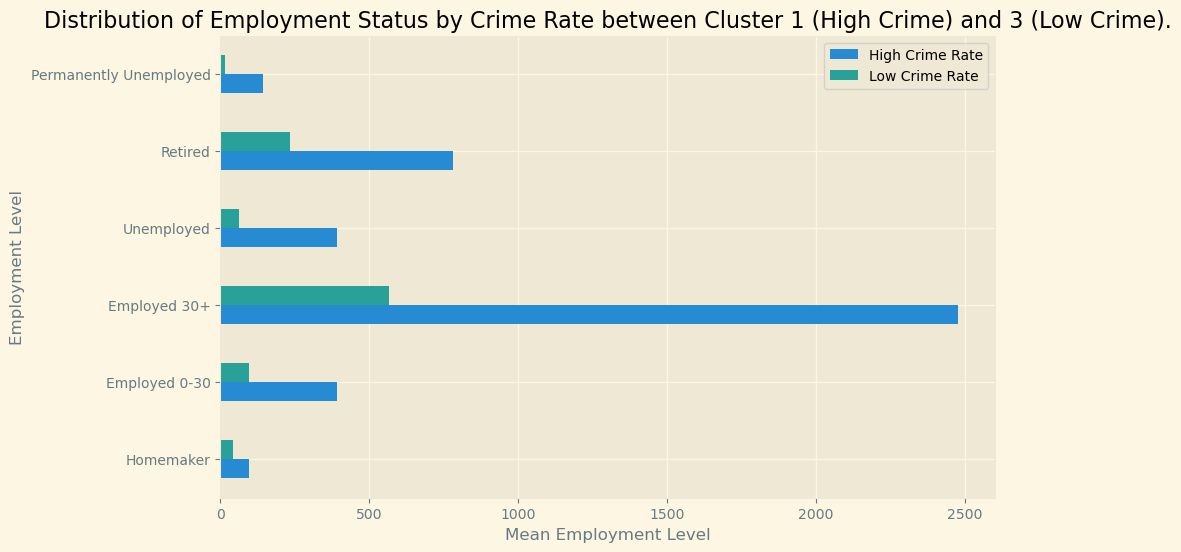

In [81]:
# Select the Income Level columns for each cluster
cluster1_employment = final.loc[final['Cluster_KMeans'] == 1, 
                            ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed']]
cluster3_employment = final.loc[final['Cluster_KMeans'] == 3, 
                            ['Homemaker','Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed']]

# Calculate the mean income level for each cluster
cluster1_employment_mean = cluster1_employment.mean()
cluster3_employment_mean = cluster3_employment.mean()

# Combine the means into a dataframe
employment_mean_df = pd.concat([cluster1_employment_mean, cluster3_employment_mean], axis=1)
employment_mean_df.columns = ['High Crime Rate', 'Low Crime Rate']

# Create a horizontal barplot
ax = employment_mean_df.plot(kind='barh', figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Distribution of Employment Status by Crime Rate between Cluster 1 (High Crime) and 3 (Low Crime).')
ax.set_xlabel('Mean Employment Level')
ax.set_ylabel('Employment Level')

# Show the chart
plt.show()

>Lets try the Gaussian Mixture Method

In [82]:
final_GMM=final.copy()
# Removing the Assessed Value and Cluster_KMeans columns.
# Looking at the distribution of the Assessed Values column, there was no point in keeping it.
final_GMM.drop(['Assessed Value', 'Cluster_KMeans'], axis=1, inplace =True)


In [83]:
final_GMM.iloc[:,1:] # we dont need NGH_Name column

Assault  Break and Enter  Homicide  Robbery  Sexual Assaults  \
0         35                8         0        8                4   
1          8                8         0        2                2   
2        123              119         1       26               13   
3         17               19         0        6                4   
4          6               17         0        1                0   
..       ...              ...       ...      ...              ...   
238       43               34         0        7                6   
239       14               15         0        2                2   
240        7               22         0        3                1   
241       30               22         0       13                4   
242       24               21         0        4                2   

     Theft From Vehicle  Theft Of Vehicle  Theft Over $5000   Latitude  \
0                    16                 6                 0  53.574143   
1                     9                 2                 1  53.632382   
2                   156                99                 2  53.568485   
3                    46                23                 0  53.516888   
4                    12                 3                 4  53.401301   
..                  ...               ...               ...        ...   
238                  53                48                 1  53.575942   
239                  46                24                 1  53.470564   
240                  31                 6                 4  53.432563   
241                  40                20                 4  53.564595   
242                  48                17                 4  53.602843   

      Longitude  ...  Employment_No Response  Income_Less than $30K  \
0   -113.388758  ...                   499.0                  206.0   
1   -113.549464  ...                   445.0                   10.0   
2   -113.485119  ...                  2342.0                  601.0   
3   -113.641242  ...                  1110.0                  119.0   
4   -113.526641  ...                  1495.0                    4.0   
..          ...  ...                     ...                    ...   
238 -113.498585  ...                  1346.0                  381.0   
239 -113.381167  ...                  3020.0                   32.0   
240 -113.626008  ...                  3618.0                   37.0   
241 -113.558327  ...                   523.0                  214.0   
242 -113.430212  ...                   843.0                  148.0   

     Income_30K to less than 60K  Income_60K to less than 100K  \
0                          170.0                          79.0   
1                           56.0                          63.0   
2                          667.0                         364.0   
3                          266.0                         284.0   
4                           48.0                         165.0   
..                           ...                           ...   
238                        321.0                         124.0   
239                        198.0                         273.0   
240                        144.0                         271.0   
241                        121.0                         107.0   
242                        297.0                         271.0   

     Income_100K to less than 125K  Income_125K to less than 150K  \
0                             23.0                            4.0   
1                             30.0                            9.0   
2                            139.0                           62.0   
3                            135.0                           72.0   
4                            109.0                           48.0   
..                             ...                            ...   
238                           36.0                           22.0   
239                          125.0                          100.0   
240                 

In [84]:
scaler = StandardScaler()
df_scaled_GMM = scaler.fit_transform(final_GMM.iloc[:,1:])

In [85]:
from sklearn.mixture import GaussianMixture

# Create the GMM model and fit to the standardized data
gmm = GaussianMixture(n_components=4, random_state=42)
#gmm = GaussianMixture(n_components=None, random_state=42)
pred_y = gmm.fit_predict(df_scaled_GMM)

# Add the cluster labels to the original dataframe
final_GMM['Cluster_GMM'] = pred_y

In [86]:
final_GMM.head(5)

NGH_Name  Assault  Break and Enter  Homicide  Robbery  \
0    ABBOTTSFIELD       35                8         0        8   
1          ALBANY        8                8         0        2   
2  ALBERTA AVENUE      123              119         1       26   
3      ALDERGROVE       17               19         0        6   
4          ALLARD        6               17         0        1   

   Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
0                4                  16                 6                 0   
1                2                   9                 2                 1   
2               13                 156                99                 2   
3                4                  46                23                 0   
4                0                  12                 3                 4   

    Latitude  ...  Income_Less than $30K  Income_30K to less than 60K  \
0  53.574143  ...                  206.0                        170.0   
1  53.632382  ...                   10.0                         56.0   
2  53.568485  ...                  601.0                        667.0   
3  53.516888  ...                  119.0                        266.0   
4  53.401301  ...                    4.0                         48.0   

   Income_60K to less than 100K  Income_100K to less than 125K  \
0                          79.0                           23.0   
1                          63.0                           30.0   
2                         364.0                          139.0   
3                         284.0                          135.0   
4                         165.0                          109.0   

   Income_125K to less than 150K  Income_150K to less than 200K  \
0                            4.0                            3.0   
1                            9.0                           14.0   
2                           62.0                           61.0   
3                           72.0                           49.0   
4                           48.0                           69.0   

   Income_200K to less than 250K  Income_250K or more  Income_No Response  \
0                            3.0                  2.0               195.0   
1                           13.0                  3.0               350.0   
2                           11.0                  4.0              1138.0   
3                           22.0                 12.0               952.0   
4                           32.0                 23.0               560.0   

   Cluster_GMM  
0            0  
1            2  
2            1  
3            0  
4            2  

[5 rows x 33 columns]

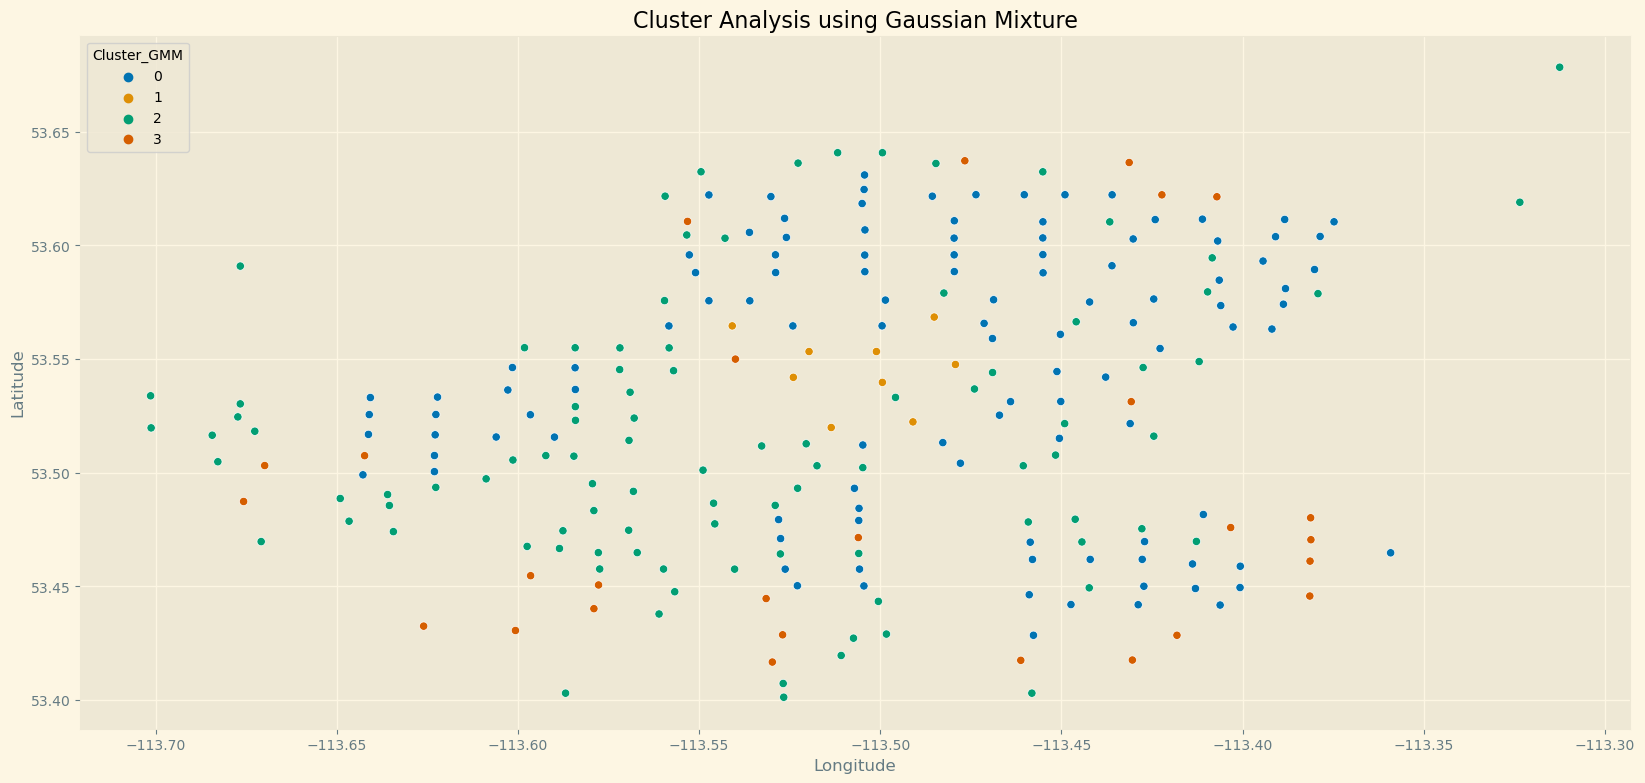

In [87]:
# Plot the clusters
sns.scatterplot(x='Longitude', y='Latitude', data=final_GMM, hue='Cluster_GMM', palette='colorblind')
plt.title('Cluster Analysis using Gaussian Mixture')
plt.show()

In [88]:
clusterGMM_0=final[final_GMM['Cluster_GMM']==0]
clusterGMM_1=final[final_GMM['Cluster_GMM']==1]
clusterGMM_2=final[final_GMM['Cluster_GMM']==2]
clusterGMM_3=final[final_GMM['Cluster_GMM']==3]

In [89]:
clusterGMM_0['NGH_Name']

0           ABBOTTSFIELD
3             ALDERGROVE
9                ATHLONE
11                BALWIN
12             BANNERMAN
             ...        
234           WELLINGTON
235    WEST JASPER PLACE
238             WESTWOOD
241            WOODCROFT
242                 YORK
Name: NGH_Name, Length: 111, dtype: object

In [90]:
clusterGMM_1['NGH_Name']

2         ALBERTA AVENUE
32          BOYLE STREET
53     CENTRAL MCDOUGALL
69              DOWNTOWN
88               GARNEAU
113            INGLEWOOD
165               OLIVER
182      QUEEN MARY PARK
211           STRATHCONA
Name: NGH_Name, dtype: object

In [91]:
clusterGMM_2['NGH_Name']

1                 ALBANY
4                 ALLARD
5              ALLENDALE
7                 ARGYLL
8          ASPEN GARDENS
             ...        
226       TRUMPETER AREA
227        TWEDDLE PLACE
231        WEBBER GREENS
232    WEDGEWOOD HEIGHTS
237            WESTRIDGE
Name: NGH_Name, Length: 96, dtype: object

In [92]:
clusterGMM_3['NGH_Name']

6              AMBLESIDE
35             BRINTNELL
56          CHARLESWORTH
62            CUMBERLAND
70                DUGGAN
89           GLASTONBURY
100               HADDOW
108       HOLLICK-KENYON
126      KINISKI GARDENS
128           KLARVATTEN
132             LARKSPUR
134               LAUREL
140              LYMBURN
142              MACEWAN
149      MCCONACHIE AREA
167             OTTEWELL
198           RUTHERFORD
206         SILVER BERRY
208    SOUTH TERWILLEGAR
215           SUMMERSIDE
221    TERWILLEGAR TOWNE
222         THE HAMPTONS
228          TWIN BROOKS
230               WALKER
236            WESTMOUNT
239            WILD ROSE
240           WINDERMERE
Name: NGH_Name, dtype: object

Using GMM, our Top10 popular Neighborhoods have been clustered into ClusterGMM_3.

In [93]:
# Compare to KMeans Cluster_0
cluster_1['NGH_Name']

2         ALBERTA AVENUE
32          BOYLE STREET
53     CENTRAL MCDOUGALL
69              DOWNTOWN
88               GARNEAU
113            INGLEWOOD
165               OLIVER
182      QUEEN MARY PARK
211           STRATHCONA
Name: NGH_Name, dtype: object

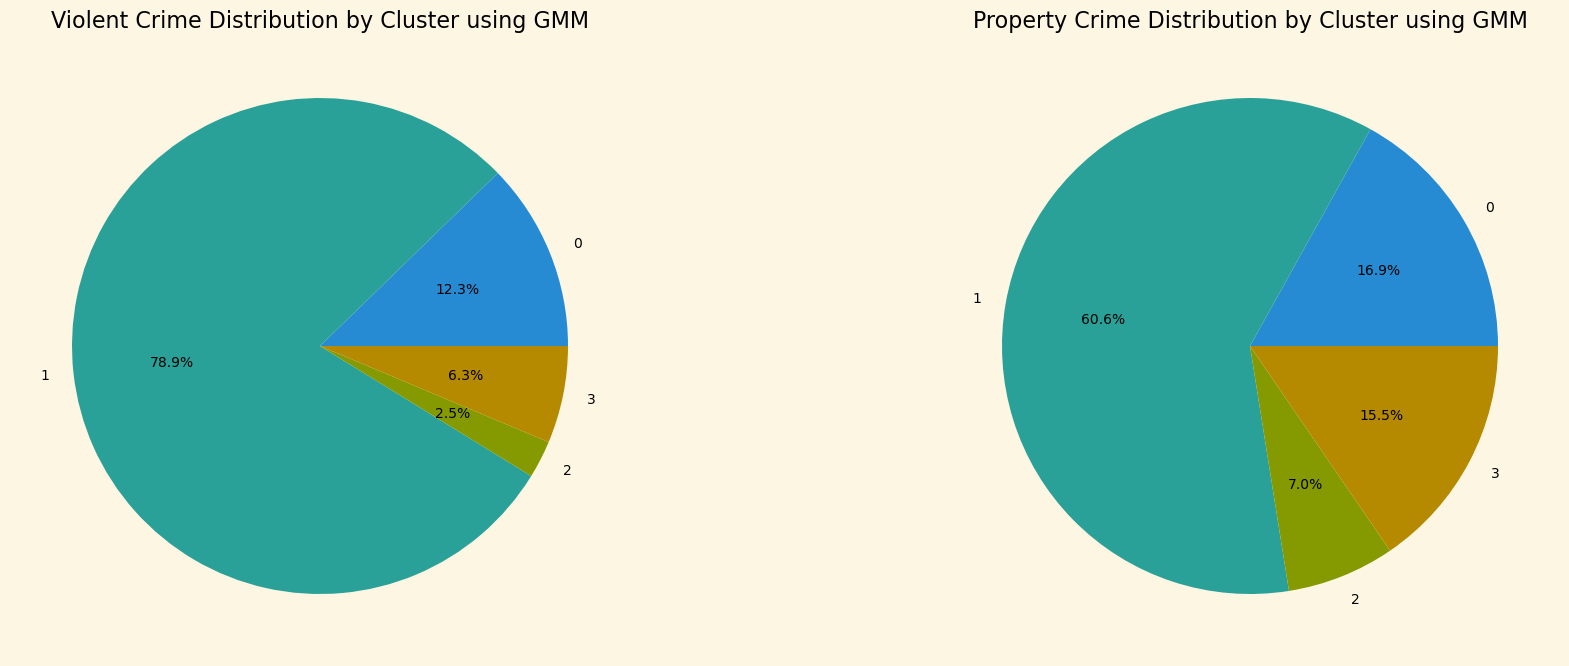

In [94]:
# Define the two crime groups
Violent_Crime = ['Homicide', 'Assault', 'Robbery', 'Sexual Assaults']
Property_Crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']

# Calculate the total count of crimes in each cluster for both groups
crime_counts_violent = final_GMM.groupby('Cluster_GMM')[Violent_Crime].mean().sum(axis=1)
crime_counts_property = final_GMM.groupby('Cluster_GMM')[Property_Crime].mean().sum(axis=1)

# Create a 1x2 grid of subplots
plt.subplot(1, 2, 1)
# Create a pie chart for violent crime
plt.pie(crime_counts_violent, labels=crime_counts_violent.index, autopct='%1.1f%%')
plt.title('Violent Crime Distribution by Cluster using GMM')

plt.subplot(1, 2, 2)
# Create a pie chart for property crime
plt.pie(crime_counts_property, labels=crime_counts_property.index, autopct='%1.1f%%')
plt.title('Property Crime Distribution by Cluster using GMM')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

In [95]:
final.to_csv('Final_with_clustersV2.csv')

>## Statistical Tests on Clusters

 Since all our numerical columns are DISCRETE (Counts), we can perform statistical analyses within and between clusters to investigate relationships between variables. Since the numerical columns are discrete count variables, we can use methods like chi-squared tests, ANOVA, and correlation analysis to assess the relationships between variables.

For example, we could use a chi-squared test to determine if there is a significant association between two categorical variables, such as the association between employment status and severe crime within a specific cluster.

We could also use ANOVA to compare the means of a continuous variable (such as income levels) across different clusters to determine if there are significant differences in income levels between clusters.

Finally, we could use correlation analysis to investigate the relationships between different variables within a cluster or between clusters, such as the correlation between income levels and severe crime within a specific cluster or between different clusters.

However, with a small sample size, it may be difficult to meet the assumptions of normality required for ANOVA. In such cases, non-parametric tests such as the Kruskal-Wallis test may be more appropriate. And also, having small cluster sizes may also be an issue for any statistical analysis. In general, larger sample sizes are better for statistical analysis as they tend to produce more reliable and accurate results.

Chi-squared test also has assumptions regarding the sample size and expected frequencies of the variables. In general, for the Chi-squared test to be reliable, the expected frequencies of each cell should be at least 5, and the sample size should be large enough.

In the case of our dataset, the small sample size and low counts in some categories may not meet the assumptions of the Chi-squared test. Therefore, it may not be the best approach for analyzing the data.

We will use the Kruskal-Wallis test.
The Kruskal-Wallis test is a non-parametric alternative to ANOVA, which is used when the assumptions of ANOVA are not met. It is used to test the null hypothesis that the median of a variable is the same across multiple groups. It can be used to test for differences between three or more independent groups.

In [96]:
from scipy import stats
from scipy.stats import kruskal

# Subset the data to only include the cluster of interest
cluster_0_data = final[final['Cluster_KMeans'] == 0]

# Perform Kruskal-Wallis test on Assault variable for each cluster
stats, pvalue = kruskal(cluster_0_data['Assault'], cluster_1['Assault'], cluster_2['Assault'], cluster_3['Assault'])

# Print the results
print(f"Kruskal-Wallis test statistic: {stats:.2f}")
print(f"P-value: {pvalue:.4f}")

Kruskal-Wallis test statistic: 90.26
P-value: 0.0000


In this example, we are comparing the Assault variable across all clusters, but we could also compare other variables of interest. If the p-value is less than the significance level (usually 0.05), then we can reject the null hypothesis and conclude that there are significant differences between the median values of the variable across the clusters.

It looks like the Kruskal-Wallis test found a significant difference in the Assault variable between the four clusters. The p-value of 0.0000 indicates that the probability of observing such a large test statistic under the null hypothesis (that there is no difference in the Assault variable between the clusters) is extremely low, suggesting that we can reject the null hypothesis and conclude that there is a significant difference in the Assault variable between the clusters.

So even though the pie charts (earlier) showed similar proportions of Assault cases in each cluster, the Kruskal-Wallis test may have detected other differences in the distribution of those cases that were not apparent from the pie charts alone, by considering the other columns grouped by Education, Employment and Income.

This suggests that there may be some underlying factors that differentiate the clusters in terms of their overall crime rates, and that these factors may not be apparent from just looking at the Assault variable alone.

In [97]:
from scipy.stats import kruskal

def kruskal_test(column, final):
    # Subset the data to only include the cluster of interest
    cluster_0_data = final[final['Cluster_KMeans'] == 0]

    # Perform Kruskal-Wallis test on specified variable for each cluster
    stats, pvalue = kruskal(cluster_0_data[column], 
                            final[final['Cluster_KMeans'] == 1][column], 
                            final[final['Cluster_KMeans'] == 2][column], 
                            final[final['Cluster_KMeans'] == 3][column])

    # Print the results
    print(f"Kruskal-Wallis test statistic: {stats:.2f}")
    print(f"P-value: {pvalue:.4f}")


In [98]:
kruskal_test('Robbery', final)

Kruskal-Wallis test statistic: 55.37
P-value: 0.0000


For kruskal_test('Robbery', final), the result is a Kruskal-Wallis test statistic of 109.44 and a p-value of 0.0000, indicating that there is a significant difference in the distribution of Robbery cases among the clusters.

In [99]:
final.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Assessed Value', 'Cluster_KMeans'],
      dtype='object')

In [100]:
kruskal_test('Unemployed', final)

Kruskal-Wallis test statistic: 156.58
P-value: 0.0000


Yes, that's correct. It suggests that there is a significant difference in the distribution of unemployment rates across the clusters.

In [101]:
# Subset the data to only include the cluster of interest
cluster_0_data = final[final['Cluster_KMeans'] == 2]

# Perform Kruskal-Wallis test on Assault variable for each cluster
stats, pvalue = kruskal(cluster_0_data['Income_Less than $30K'], cluster_1['Income_Less than $30K'])

# Print the results
print(f"Kruskal-Wallis test statistic: {stats:.2f}")
print(f"P-value: {pvalue:.4f}")

Kruskal-Wallis test statistic: 14.14
P-value: 0.0002


Since the variables in the dataframe are counts and the dataframe has a limited number of rows, it may not be appropriate to perform statistical tests between the clusters. This is because the assumptions of normality and independence required for many statistical tests may not hold true for count data. In addition, with a limited number of rows, statistical tests may not have enough power to detect significant differences between the clusters.

># Calgary

In [102]:
calgary=pd.read_csv('Community_Crime_and_Disorder_Statistics__2012-2019_.csv')
calgary

Sector   Community Name Group Category                  Category  \
0           NORTH      THORNCLIFFE          Crime        Theft FROM Vehicle   
1           SOUTH         WOODBINE          Crime        Theft FROM Vehicle   
2           SOUTH      WILLOW PARK          Crime        Theft FROM Vehicle   
3           SOUTH      WILLOW PARK          Crime        Commercial Robbery   
4            WEST     LINCOLN PARK          Crime  Commercial Break & Enter   
...           ...              ...            ...                       ...   
114843  NORTHEAST  MAYLAND HEIGHTS          Crime    Assault (Non-domestic)   
114844  NORTHEAST    NORTH AIRWAYS       Disorder           Social Disorder   
114845  NORTHEAST           MCCALL          Crime        Theft FROM Vehicle   
114846      SOUTH         FAIRVIEW          Crime        Theft FROM Vehicle   
114847       WEST  SPRINGBANK HILL          Crime        Theft FROM Vehicle   

        Crime Count  Resident Count     Date  Year Month  \
0                 9            8474  2018/03  2018   MAR   
1                 3            8866  2019/11  2019   NOV   
2                 4            5328  2019/11  2019   NOV   
3                 1            5328  2019/11  2019   NOV   
4                 5            2617  2019/11  2019   NOV   
...             ...             ...      ...   ...   ...   
114843            1            5833  2012/06  2012   JUN   
114844            3               0  2019/06  2019   JUN   
114845            2               0  2019/06  2019   JUN   
114846            3            3552  2012/04  2012   APR   
114847            3            8388  2012/01  2012   JAN   

                                                       ID  \
0               2018-MAR-THORNCLIFFE-Theft FROM Vehicle-9   
1                  2019-NOV-WOODBINE-Theft FROM Vehicle-3   
2               2019-NOV-WILLOW PARK-Theft FROM Vehicle-4   
3               2019-NOV-WILLOW PARK-Commercial Robbery-1   
4        2019-NOV-LINCOLN PARK-Commercial Break & Enter-5   
...                                                   ...   
114843  2012-JUN-MAYLAND HEIGHTS-Assault (Non-domestic)-1   
114844           2019-JUN-NORTH AIRWAYS-Social Disorder-3   
114845               2019-JUN-MCCALL-Theft FROM Vehicle-2   
114846             2012-APR-FAIRVIEW-Theft FROM Vehicle-3   
114847      2012-JAN-SPRINGBANK HILL-Theft FROM Vehicle-3   

                           Community Center Point  
0            (51.103099554741, -114.068779421169)  
1       (50.939610852207664, -114.12962865374453)  
2        (50.95661926653037, -114.05620194518823)  
3        (50.95661926653037, -114.05620194518823)  
4         (51.0100906918158, -114.12955694059636)  
...                                           ...  
114843       (51.060827713741, -114.013325241169)  
114844     (51.0871426966461, -114.0075260441034)  
114845   (51.08899753730401, -114.02709667340615)  
114846       (50.985381707008, -114.060338376198)  
114847       (51.026824120988, -114.208458271936)  

[114848 rows x 11 columns]

In [103]:
calgary['Category'].value_counts()

Social Disorder                  23938
Theft FROM Vehicle               17729
Physical Disorder                16858
Theft OF Vehicle                 13794
Residential Break & Enter        12408
Commercial Break & Enter         10339
Assault (Non-domestic)            9180
Violence Other (Non-domestic)     6180
Street Robbery                    2680
Commercial Robbery                1741
1320.131                             1
Name: Category, dtype: int64

In [104]:
calgary_2016=calgary[calgary['Year']==2016]

In [105]:
calgary_2016

Sector            Community Name Group Category  \
2539       SOUTH                QUEENSLAND          Crime   
2540   SOUTHEAST                     OGDEN          Crime   
2541       SOUTH                  DEER RUN          Crime   
2543        WEST       NORTH GLENMORE PARK          Crime   
2544      CENTRE             HIGHLAND PARK       Disorder   
...          ...                       ...            ...   
79689  SOUTHEAST             MCKENZIE LAKE          Crime   
79691     CENTRE       KILLARNEY/GLENGARRY          Crime   
79695  NORTHEAST  DEERFOOT BUSINESS CENTRE       Disorder   
79701  NORTHEAST                  SUNRIDGE       Disorder   
79710  NORTHEAST                  TARADALE          Crime   

                            Category  Crime Count  Resident Count     Date  \
2539                Theft OF Vehicle            2            4823  2016/11   
2540                Theft OF Vehicle            3            8714  2016/06   
2541              Theft FROM Vehicle            9            5182  2016/11   
2543   Violence Other (Non-domestic)            1            2398  2016/12   
2544               Physical Disorder            1            4014  2016/08   
...                              ...          ...             ...      ...   
79689             Theft FROM Vehicle           10           14008  2016/03   
79691             Theft FROM Vehicle            3            7677  2016/03   
79695                Social Disorder            4               0  2016/01   
79701              Physical Disorder           10              86  2016/04   
79710  Violence Other (Non-domestic)            2           19223  2016/02   

       Year Month                                                 ID  \
2539   2016   NOV             2016-NOV-QUEENSLAND-Theft OF Vehicle-2   
2540   2016   JUN                  2016-JUN-OGDEN-Theft OF Vehicle-3   
2541   2016   NOV             2016-NOV-DEER RUN-Theft FROM Vehicle-9   
2543   2016   DEC  2016-DEC-NORTH GLENMORE PARK-Violence Other (N...   
2544   2016   AUG         2016-AUG-HIGHLAND PARK-Physical Disorder-1   
...     ...   ...                                                ...   
79689  2016   MAR       2016-MAR-MCKENZIE LAKE-Theft FROM Vehicle-10   
79691  2016   MAR  2016-MAR-KILLARNEY/GLENGARRY-Theft FROM Vehicle-3   
79695  2016   JAN  2016-JAN-DEERFOOT BUSINESS CENTRE-Social Disor...   
79701  2016   APR             2016-APR-SUNRIDGE-Physical Disorder-10   
79710  2016   FEB  2016-FEB-TARADALE-Violence Other (Non-domestic)-2   

                      Community Center Point  
2539   (50.9382209194771, -114.022568260238)  
2540    (50.992096131355, -114.012584731192)  
2541    (50.925406722045, -114.009087704597)  
2543   (51.0014223765214, -114.112246566894)  
2544    (51.088022395583, -114.062068985496)  
...                                      ...  
79689   (50.914880843208, -113.988181270218)  
79691   (51.030129392795, -114.131701908734)  
79695   (51.112097754834, -114.038326942569)  
79701   (51.074221599517, -113.991700569993)  
79710   (51.117940163039, -113.934002077973)  

[14727 rows x 11 columns]

In [106]:
calgary_2016.columns

Index(['Sector', 'Community Name', 'Group Category', 'Category', 'Crime Count',
       'Resident Count', 'Date', 'Year', 'Month', 'ID',
       'Community Center Point'],
      dtype='object')

In [107]:
calgary_2016['Group Category'].value_counts()

Crime       9622
Disorder    5105
Name: Group Category, dtype: int64

In [108]:
calgary_2016 = calgary_2016.loc[calgary_2016['Group Category'] == 'Crime']


In [109]:
calgary_2016 = calgary_2016.rename(columns={'Community Name': 'NGH_Name', 'Category': 'Violation Type'})
calgary_2016

Sector             NGH_Name Group Category  \
2539       SOUTH           QUEENSLAND          Crime   
2540   SOUTHEAST                OGDEN          Crime   
2541       SOUTH             DEER RUN          Crime   
2543        WEST  NORTH GLENMORE PARK          Crime   
2549      CENTRE            HIGHFIELD          Crime   
...          ...                  ...            ...   
79684       EAST          FOREST LAWN          Crime   
79685       WEST          ROSSCARROCK          Crime   
79689  SOUTHEAST        MCKENZIE LAKE          Crime   
79691     CENTRE  KILLARNEY/GLENGARRY          Crime   
79710  NORTHEAST             TARADALE          Crime   

                      Violation Type  Crime Count  Resident Count     Date  \
2539                Theft OF Vehicle            2            4823  2016/11   
2540                Theft OF Vehicle            3            8714  2016/06   
2541              Theft FROM Vehicle            9            5182  2016/11   
2543   Violence Other (Non-domestic)            1            2398  2016/12   
2549        Commercial Break & Enter            6               0  2016/09   
...                              ...          ...             ...      ...   
79684             Theft FROM Vehicle            6            8179  2016/02   
79685  Violence Other (Non-domestic)            1            3447  2016/01   
79689             Theft FROM Vehicle           10           14008  2016/03   
79691             Theft FROM Vehicle            3            7677  2016/03   
79710  Violence Other (Non-domestic)            2           19223  2016/02   

       Year Month                                                 ID  \
2539   2016   NOV             2016-NOV-QUEENSLAND-Theft OF Vehicle-2   
2540   2016   JUN                  2016-JUN-OGDEN-Theft OF Vehicle-3   
2541   2016   NOV             2016-NOV-DEER RUN-Theft FROM Vehicle-9   
2543   2016   DEC  2016-DEC-NORTH GLENMORE PARK-Violence Other (N...   
2549   2016   SEP      2016-SEP-HIGHFIELD-Commercial Break & Enter-6   
...     ...   ...                                                ...   
79684  2016   FEB          2016-FEB-FOREST LAWN-Theft FROM Vehicle-6   
79685  2016   JAN  2016-JAN-ROSSCARROCK-Violence Other (Non-domes...   
79689  2016   MAR       2016-MAR-MCKENZIE LAKE-Theft FROM Vehicle-10   
79691  2016   MAR  2016-MAR-KILLARNEY/GLENGARRY-Theft FROM Vehicle-3   
79710  2016   FEB  2016-FEB-TARADALE-Violence Other (Non-domestic)-2   

                      Community Center Point  
2539   (50.9382209194771, -114.022568260238)  
2540    (50.992096131355, -114.012584731192)  
2541    (50.925406722045, -114.009087704597)  
2543   (51.0014223765214, -114.112246566894)  
2549    (51.018294679421, -114.037200977413)  
...                                      ...  
79684   (51.037847718454, -113.971230283867)  
79685   (51.043277392563, -114.145493740992)  
79689   (50.914880843208, -113.988181270218)  
79691   (51.030129392795, -114.131701908734)  
79710   (51.117940163039, -113.934002077973)  

[9622 rows x 11 columns]

In [110]:
calgary_2016.isnull().sum()

Sector                    0
NGH_Name                  0
Group Category            0
Violation Type            0
Crime Count               0
Resident Count            0
Date                      0
Year                      0
Month                     0
ID                        0
Community Center Point    0
dtype: int64

In [111]:
calgary_2016['Group Category'].value_counts()

Crime    9622
Name: Group Category, dtype: int64

In [112]:
calgary_2016['Violation Type'].value_counts()

Theft FROM Vehicle               2358
Theft OF Vehicle                 1845
Residential Break & Enter        1684
Commercial Break & Enter         1305
Assault (Non-domestic)           1147
Violence Other (Non-domestic)     767
Street Robbery                    307
Commercial Robbery                209
Name: Violation Type, dtype: int64

In [113]:
# Create a dictionary to map the values
map_dict = {'Residential Break & Enter': 'Break & Enter', 'Commercial Break & Enter': 'Break & Enter',
            'Street Robbery': 'Robbery', 'Commercial Robbery': 'Robbery'}

# Replace the values using the map_dict
calgary_2016['Violation Type'] = calgary_2016['Violation Type'].replace(map_dict)
calgary_2016['Violation Type'].value_counts()


Break & Enter                    2989
Theft FROM Vehicle               2358
Theft OF Vehicle                 1845
Assault (Non-domestic)           1147
Violence Other (Non-domestic)     767
Robbery                           516
Name: Violation Type, dtype: int64

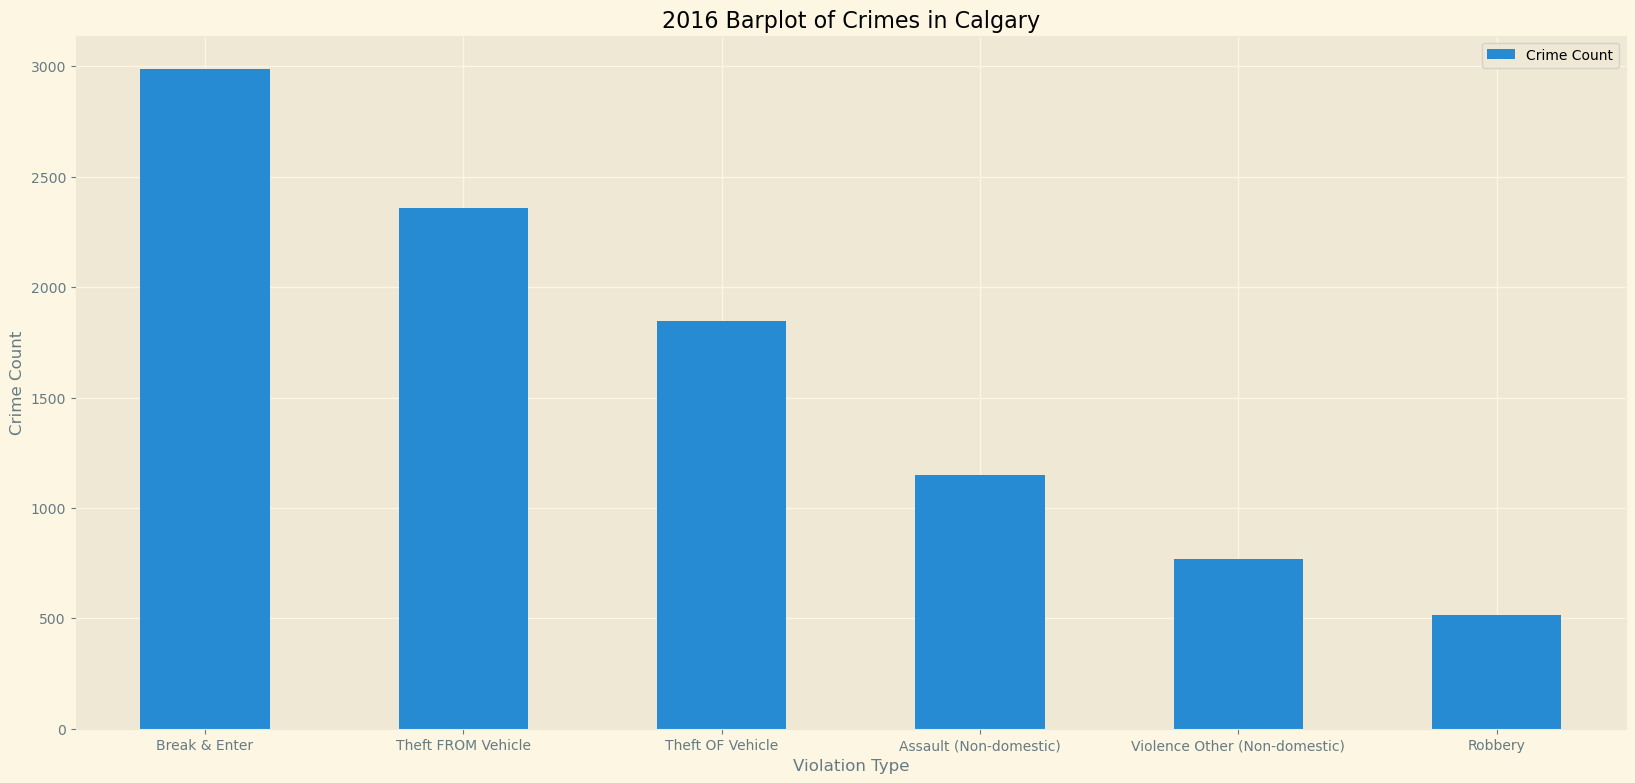

In [163]:
# create a DataFrame with the crime counts
calgary_crime_counts = pd.DataFrame({
    'Violation Type': ['Break & Enter', 'Theft FROM Vehicle', 'Theft OF Vehicle', 'Assault (Non-domestic)', 'Violence Other (Non-domestic)', 'Robbery'],
    'Crime Count': [2989, 2358, 1845, 1147, 767, 516]
})

# plot a bar chart of the crime counts
ax = calgary_crime_counts.plot.bar(x='Violation Type', y='Crime Count', rot=0)
ax.set_xlabel('Violation Type')
ax.set_ylabel('Crime Count')
plt.title('2016 Barplot of Crimes in Calgary')
plt.show()

In [114]:
# Replace missing values with (0, 0) tuples
calgary_2016['Community Center Point'].fillna('(0, 0)', inplace=True)

# Split the 'Community Center Point' column into separate latitude and longitude columns
calgary_2016[['Latitude', 'Longitude']] = calgary_2016['Community Center Point'].str.replace('(', '').str.replace(')', '').str.split(',', expand=True).astype(float)

# Create a map centered on the city of Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11)

# Create a list of locations and violation counts
locations = calgary_2016[['Latitude', 'Longitude']].values.tolist()
violation_counts = calgary_2016.groupby(['Latitude', 'Longitude', 'Violation Type'])['ID'].count().reset_index()
violation_counts = violation_counts.rename(columns={'ID': 'Count'})

# Create a heatmap layer based on the violation counts
heat_data = [[row['Latitude'], row['Longitude'], row['Count']] for _, row in violation_counts.iterrows()]
HeatMap(heat_data, name='Violation Count', radius=15, max_val=max(violation_counts['Count'])).add_to(calgary_map)

# Add a layer control to the map
folium.LayerControl().add_to(calgary_map)

# Show the map
calgary_map


C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\4134069381.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calgary_2016[['Latitude', 'Longitude']] = calgary_2016['Community Center Point'].str.replace('(', '').str.replace(')', '').str.split(',', expand=True).astype(float)
C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\4134069381.py:17: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, name='Violation Count', radius=15, max_val=max(violation_counts['Count'])).add_to(calgary_map)


In [160]:
calgary_2016.columns

Index(['Sector', 'NGH_Name', 'Group Category', 'Violation Type', 'Crime Count',
       'Resident Count', 'Date', 'Year', 'Month', 'ID',
       'Community Center Point', 'Latitude', 'Longitude'],
      dtype='object')

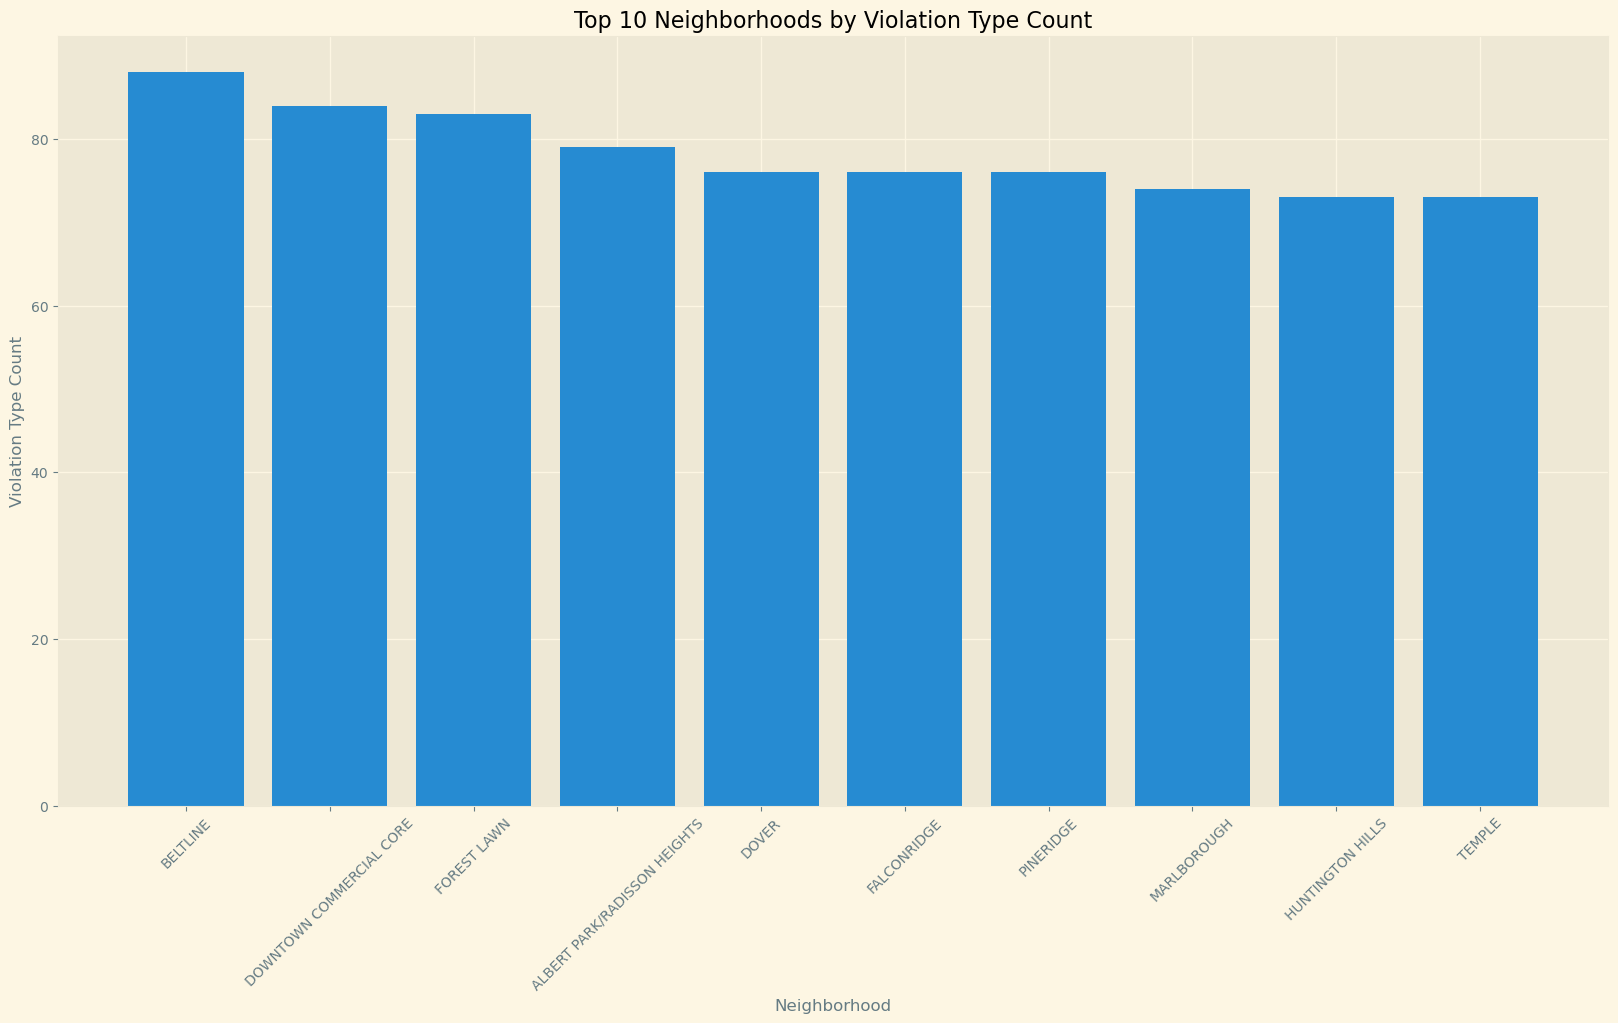

In [115]:
# Group the data by neighborhood and violation type, and get the count of each combination
grouped_data = calgary_2016.groupby(['NGH_Name', 'Violation Type'])['ID'].count()

# Get the total count of violations for each neighborhood
neighborhood_counts = grouped_data.groupby('NGH_Name').sum()

# Get the top 10 neighborhoods with the highest count of violations
top_10 = neighborhood_counts.nlargest(10)

# Plot a bar chart of the top 10 neighborhoods
plt.figure(figsize=(20, 10))  # set the figure size
plt.bar(top_10.index, top_10.values)
plt.title('Top 10 Neighborhoods by Violation Type Count')
plt.xlabel('Neighborhood')
plt.ylabel('Violation Type Count')
plt.xticks(rotation=45)  # rotate the x-axis labels by 45 degrees
plt.show()

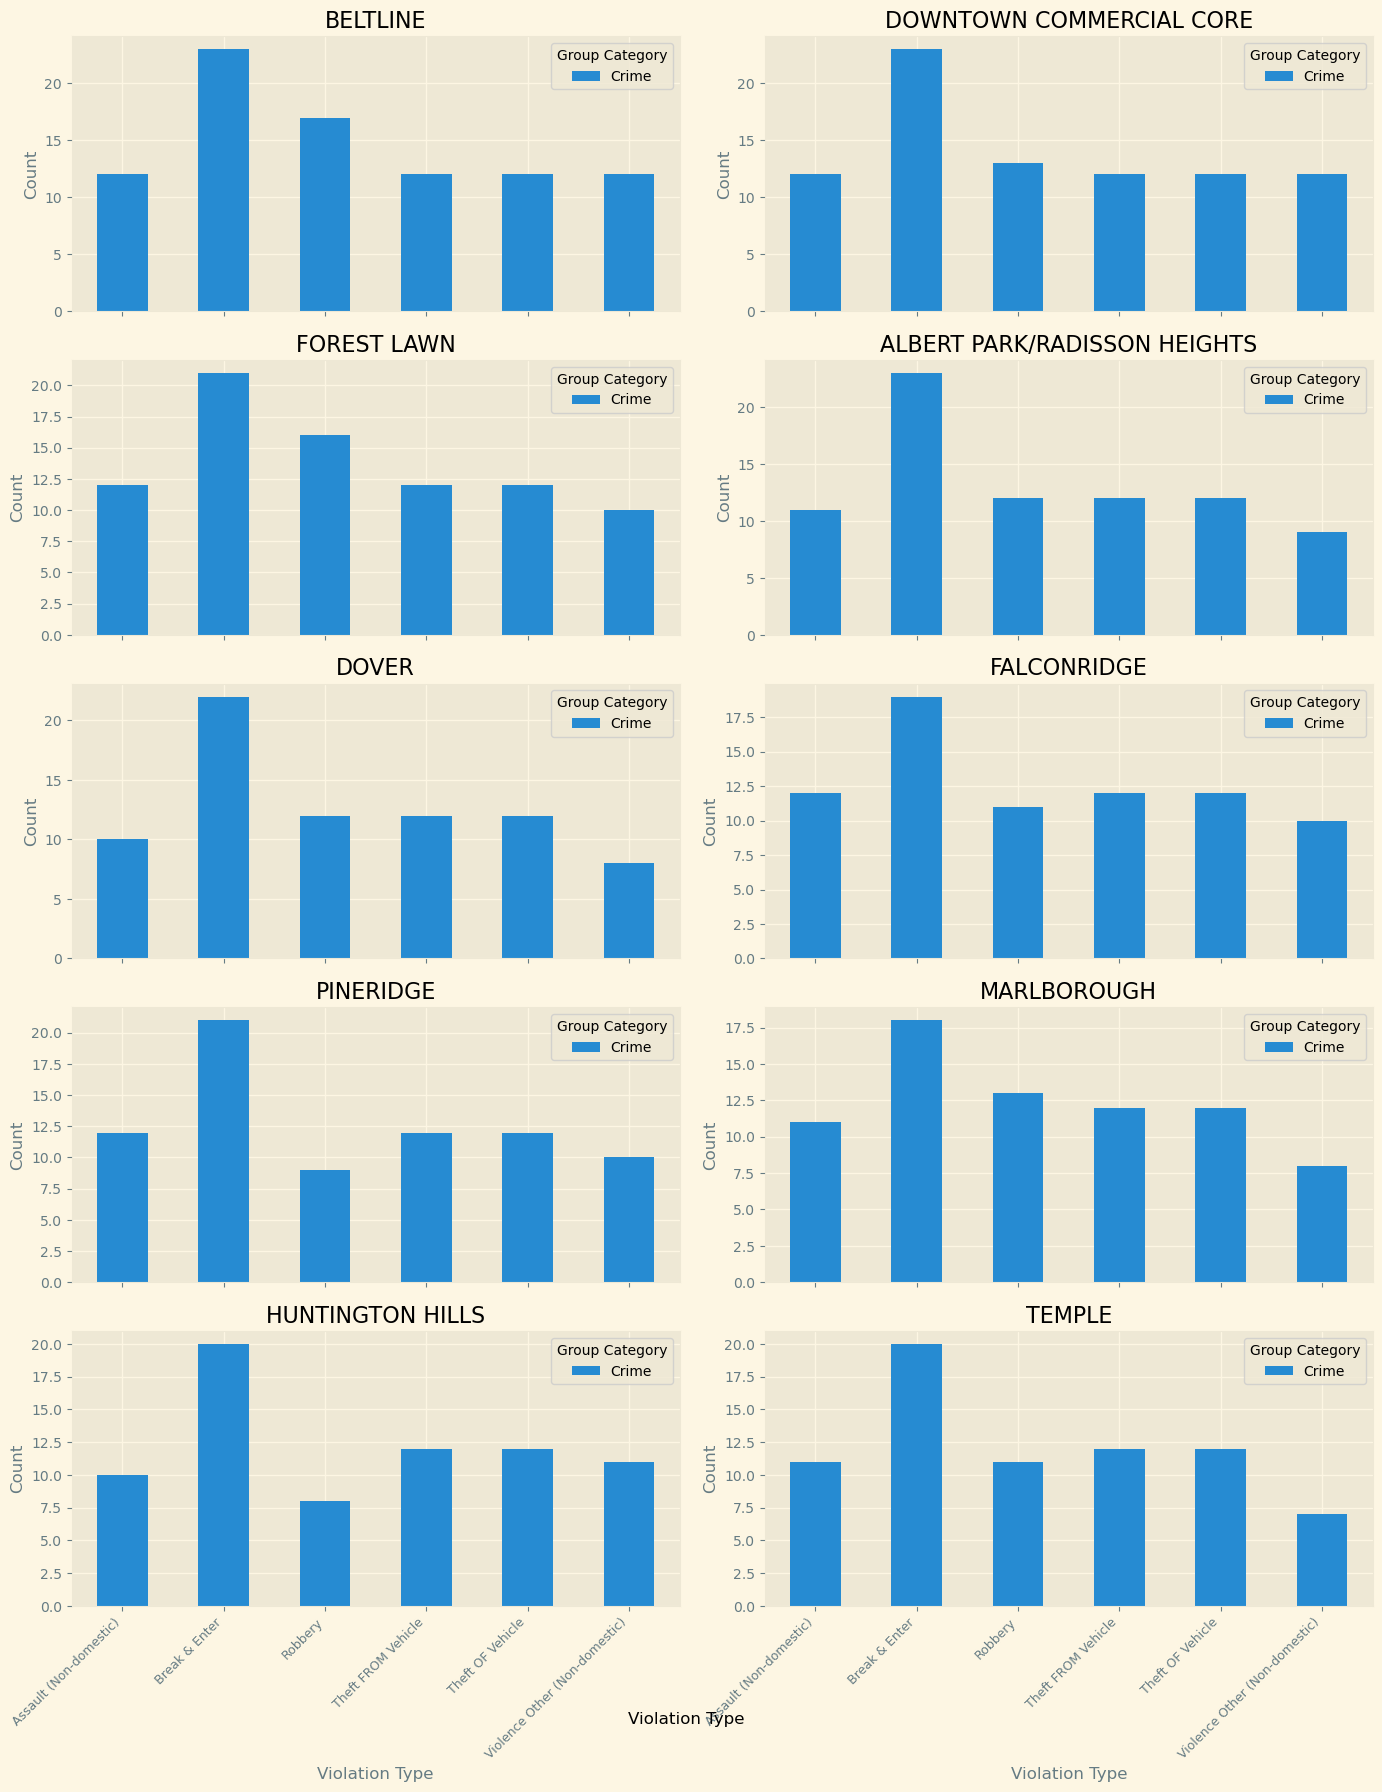

In [116]:
import matplotlib.pyplot as plt
import math

# Group the data by neighborhood and violation type, and aggregate the counts by group category
grouped_data = calgary_2016.groupby(['NGH_Name', 'Violation Type', 'Group Category'])['ID'].count()

# Get the top 10 neighborhoods with the highest count of violation types
top_10 = grouped_data.groupby('NGH_Name').sum().nlargest(10)

# Create a 5x2 grid of subplots
fig, axs = plt.subplots(5, 2, figsize=(14, 18), sharex=True)

# Plot a stacked bar chart for each of the top 10 neighborhoods
for i, neighborhood in enumerate(top_10.index):
    row = math.floor(i / 2)
    col = i % 2
    ax = axs[row, col]
    neighborhood_data = grouped_data.loc[neighborhood].unstack().fillna(0)
    neighborhood_data.plot(kind='bar', stacked=True, title=neighborhood, ax=ax, rot=0)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelsize=9)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
# Set a common x-axis label
fig.text(0.5, 0.04, 'Violation Type', ha='center', fontsize=12)

# Adjust the spacing between subplots and remove extra whitespace
plt.tight_layout(pad=1)

# Show the plot
plt.show()



Clustering for Calgary Crime

In [117]:
calgary_2016

Sector             NGH_Name Group Category  \
2539       SOUTH           QUEENSLAND          Crime   
2540   SOUTHEAST                OGDEN          Crime   
2541       SOUTH             DEER RUN          Crime   
2543        WEST  NORTH GLENMORE PARK          Crime   
2549      CENTRE            HIGHFIELD          Crime   
...          ...                  ...            ...   
79684       EAST          FOREST LAWN          Crime   
79685       WEST          ROSSCARROCK          Crime   
79689  SOUTHEAST        MCKENZIE LAKE          Crime   
79691     CENTRE  KILLARNEY/GLENGARRY          Crime   
79710  NORTHEAST             TARADALE          Crime   

                      Violation Type  Crime Count  Resident Count     Date  \
2539                Theft OF Vehicle            2            4823  2016/11   
2540                Theft OF Vehicle            3            8714  2016/06   
2541              Theft FROM Vehicle            9            5182  2016/11   
2543   Violence Other (Non-domestic)            1            2398  2016/12   
2549                   Break & Enter            6               0  2016/09   
...                              ...          ...             ...      ...   
79684             Theft FROM Vehicle            6            8179  2016/02   
79685  Violence Other (Non-domestic)            1            3447  2016/01   
79689             Theft FROM Vehicle           10           14008  2016/03   
79691             Theft FROM Vehicle            3            7677  2016/03   
79710  Violence Other (Non-domestic)            2           19223  2016/02   

       Year Month                                                 ID  \
2539   2016   NOV             2016-NOV-QUEENSLAND-Theft OF Vehicle-2   
2540   2016   JUN                  2016-JUN-OGDEN-Theft OF Vehicle-3   
2541   2016   NOV             2016-NOV-DEER RUN-Theft FROM Vehicle-9   
2543   2016   DEC  2016-DEC-NORTH GLENMORE PARK-Violence Other (N...   
2549   2016   SEP      2016-SEP-HIGHFIELD-Commercial Break & Enter-6   
...     ...   ...                                                ...   
79684  2016   FEB          2016-FEB-FOREST LAWN-Theft FROM Vehicle-6   
79685  2016   JAN  2016-JAN-ROSSCARROCK-Violence Other (Non-domes...   
79689  2016   MAR       2016-MAR-MCKENZIE LAKE-Theft FROM Vehicle-10   
79691  2016   MAR  2016-MAR-KILLARNEY/GLENGARRY-Theft FROM Vehicle-3   
79710  2016   FEB  2016-FEB-TARADALE-Violence Other (Non-domestic)-2   

                      Community Center Point   Latitude   Longitude  
2539   (50.9382209194771, -114.022568260238)  50.938221 -114.022568  
2540    (50.992096131355, -114.012584731192)  50.992096 -114.012585  
2541    (50.925406722045, -114.009087704597)  50.925407 -114.009088  
2543   (51.0014223765214, -114.112246566894)  51.001422 -114.112247  
2549    (51.018294679421, -114.037200977413)  51.018295 -114.037201  
...                                      ...        ...         ...  
79684   (51.037847718454, -113.971230283867)  51.037848 -113.971230  
79685   (51.043277392563, -114.145493740992)  51.043277 -114.145494  
79689   (50.914880843208, -113.988181270218)  50.914881 -113.988181  
79691   (51.030129392795, -114.131701908734)  51.030129 -114.131702  
79710   (51.117940163039, -113.934002077973)  51.117940 -113.934002  

[9622 rows x 13 columns]

In [118]:
calgary_cluster=calgary_2016[['NGH_Name', 'Violation Type', 'Crime Count', 'Resident Count', 'Latitude', 'Longitude' ]].copy()


In [119]:
calgary_cluster

NGH_Name                 Violation Type  Crime Count  \
2539            QUEENSLAND               Theft OF Vehicle            2   
2540                 OGDEN               Theft OF Vehicle            3   
2541              DEER RUN             Theft FROM Vehicle            9   
2543   NORTH GLENMORE PARK  Violence Other (Non-domestic)            1   
2549             HIGHFIELD                  Break & Enter            6   
...                    ...                            ...          ...   
79684          FOREST LAWN             Theft FROM Vehicle            6   
79685          ROSSCARROCK  Violence Other (Non-domestic)            1   
79689        MCKENZIE LAKE             Theft FROM Vehicle           10   
79691  KILLARNEY/GLENGARRY             Theft FROM Vehicle            3   
79710             TARADALE  Violence Other (Non-domestic)            2   

       Resident Count   Latitude   Longitude  
2539             4823  50.938221 -114.022568  
2540             8714  50.992096 -114.012585  
2541             5182  50.925407 -114.009088  
2543             2398  51.001422 -114.112247  
2549                0  51.018295 -114.037201  
...               ...        ...         ...  
79684            8179  51.037848 -113.971230  
79685            3447  51.043277 -114.145494  
79689           14008  50.914881 -113.988181  
79691            7677  51.030129 -114.131702  
79710           19223  51.117940 -113.934002  

[9622 rows x 6 columns]

In [120]:
calgary_pivot = calgary_cluster.pivot_table(index='NGH_Name', values='Crime Count', columns='Violation Type', aggfunc='sum', fill_value=0, margins=False)


In [121]:
# Include the demographic columns in the pivot table
calgary_pivot = pd.concat([calgary_pivot, calgary_cluster.groupby('NGH_Name')[['Latitude', 'Longitude']].mean()], axis=1)
calgary_pivot

Assault (Non-domestic)  Break & Enter  Robbery  \
NGH_Name                                                                    
01B                                             0              1        0   
01C                                             0              1        0   
01F                                             0              0        0   
02A                                            29              5        0   
02E                                            11              2        0   
...                                           ...            ...      ...   
WILLOW PARK                                    18             44        5   
WINDSOR PARK                                    3             40        0   
WINSTON HEIGHTS/MOUNTVIEW                      12             41        1   
WOODBINE                                        5             28        3   
WOODLANDS                                      21             28        2   

                           Theft FROM Vehicle  Theft OF Vehicle  \
NGH_Name                                                          
01B                                         1                 0   
01C                                         0                 0   
01F                                         1                 0   
02A                                         1                 1   
02E                                         2                 2   
...                                       ...               ...   
WILLOW PARK                                78                26   
WINDSOR PARK                               49                16   
WINSTON HEIGHTS/MOUNTVIEW                  53                30   
WOODBINE                                   51                17   
WOODLANDS                                  29                13   

                           Violence Other (Non-domestic)   Latitude  \
NGH_Name                                                              
01B                                                    0  51.102826   
01C                                                    0  51.085008   
01F                                                    0  51.117348   
02A                                                    5  51.168702   
02E                                                    1  51.161431   
...                                                  ...        ...   
WILLOW PARK                                            5  50.956619   
WINDSOR PARK                                           2  51.005046   
WINSTON HEIGHTS/MOUNTVIEW                              6  51.075325   
WOODBINE                                               1  50.939611   
WOODLANDS                                              8  50.941120   

                            Longitude  
NGH_Name                               
01B                       -114.242480  
01C                       -114.235211  
01F                       -114.261186  
02A                       -114.222716  
02E                       -114.199362  
...                               ...  
WILLOW PARK               -114.056202  
WINDSOR PARK              -114.083552  
WINSTON HEIGHTS/MOUNTVIEW -114.041855  
WOODBINE                  -114.129629  
WOODLANDS                 -114.106344  

[264 rows x 8 columns]

In [122]:
calgary_pivot = calgary_pivot.reset_index()
calgary_pivot

NGH_Name  Assault (Non-domestic)  Break & Enter  \
0                          01B                       0              1   
1                          01C                       0              1   
2                          01F                       0              0   
3                          02A                      29              5   
4                          02E                      11              2   
..                         ...                     ...            ...   
259                WILLOW PARK                      18             44   
260               WINDSOR PARK                       3             40   
261  WINSTON HEIGHTS/MOUNTVIEW                      12             41   
262                   WOODBINE                       5             28   
263                  WOODLANDS                      21             28   

     Robbery  Theft FROM Vehicle  Theft OF Vehicle  \
0          0                   1                 0   
1          0                   0                 0   
2          0                   1                 0   
3          0                   1                 1   
4          0                   2                 2   
..       ...                 ...               ...   
259        5                  78                26   
260        0                  49                16   
261        1                  53                30   
262        3                  51                17   
263        2                  29                13   

     Violence Other (Non-domestic)   Latitude   Longitude  
0                                0  51.102826 -114.242480  
1                                0  51.085008 -114.235211  
2                                0  51.117348 -114.261186  
3                                5  51.168702 -114.222716  
4                                1  51.161431 -114.199362  
..                             ...        ...         ...  
259                              5  50.956619 -114.056202  
260                              2  51.005046 -114.083552  
261                              6  51.075325 -114.041855  
262                              1  50.939611 -114.129629  
263                              8  50.941120 -114.106344  

[264 rows x 9 columns]

In [123]:
calgary_pivot.columns

Index(['NGH_Name', 'Assault (Non-domestic)', 'Break & Enter', 'Robbery',
       'Theft FROM Vehicle', 'Theft OF Vehicle',
       'Violence Other (Non-domestic)', 'Latitude', 'Longitude'],
      dtype='object')

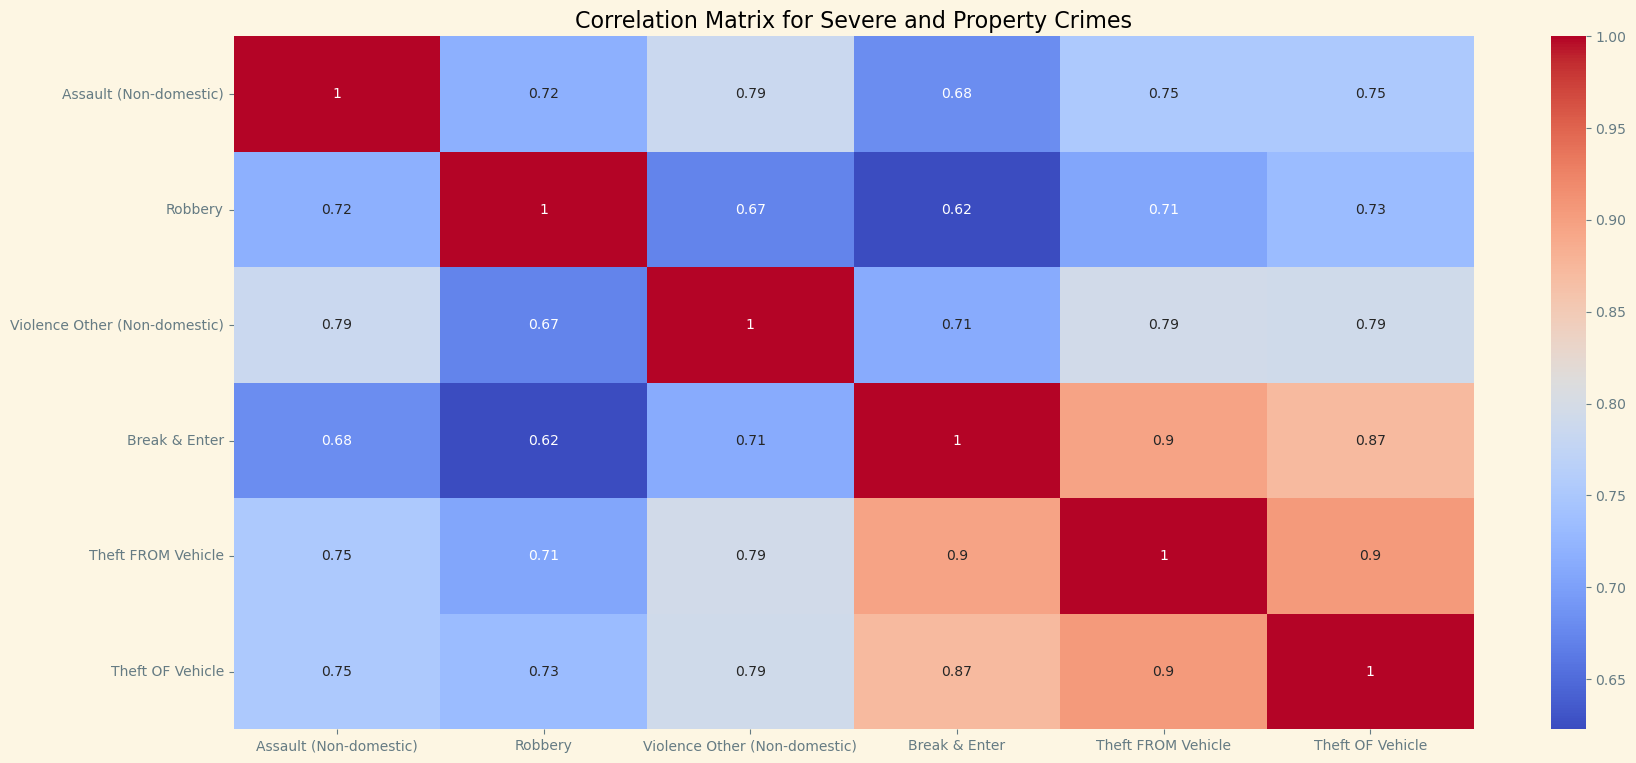

In [124]:
# Define the two crime groups
Violent_Crime = ['Assault (Non-domestic)', 'Robbery', 'Violence Other (Non-domestic)']
Property_Crime = ['Break & Enter', 'Theft FROM Vehicle', 'Theft OF Vehicle']
plot_crime_correlations(calgary_pivot, Violent_Crime, Property_Crime)


In [125]:
calgary_pivot.iloc[:,1:]

Assault (Non-domestic)  Break & Enter  Robbery  Theft FROM Vehicle  \
0                         0              1        0                   1   
1                         0              1        0                   0   
2                         0              0        0                   1   
3                        29              5        0                   1   
4                        11              2        0                   2   
..                      ...            ...      ...                 ...   
259                      18             44        5                  78   
260                       3             40        0                  49   
261                      12             41        1                  53   
262                       5             28        3                  51   
263                      21             28        2                  29   

     Theft OF Vehicle  Violence Other (Non-domestic)   Latitude   Longitude  
0                   0                              0  51.102826 -114.242480  
1                   0                              0  51.085008 -114.235211  
2                   0                              0  51.117348 -114.261186  
3                   1                              5  51.168702 -114.222716  
4                   2                              1  51.161431 -114.199362  
..                ...                            ...        ...         ...  
259                26                              5  50.956619 -114.056202  
260                16                              2  51.005046 -114.083552  
261                30                              6  51.075325 -114.041855  
262                17                              1  50.939611 -114.129629  
263                13                              8  50.941120 -114.106344  

[264 rows x 8 columns]

In [126]:
# Standardize the data
scaler = StandardScaler()
calgary_scaled = scaler.fit_transform(calgary_pivot.iloc[:,1:])

c:\Users\azimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


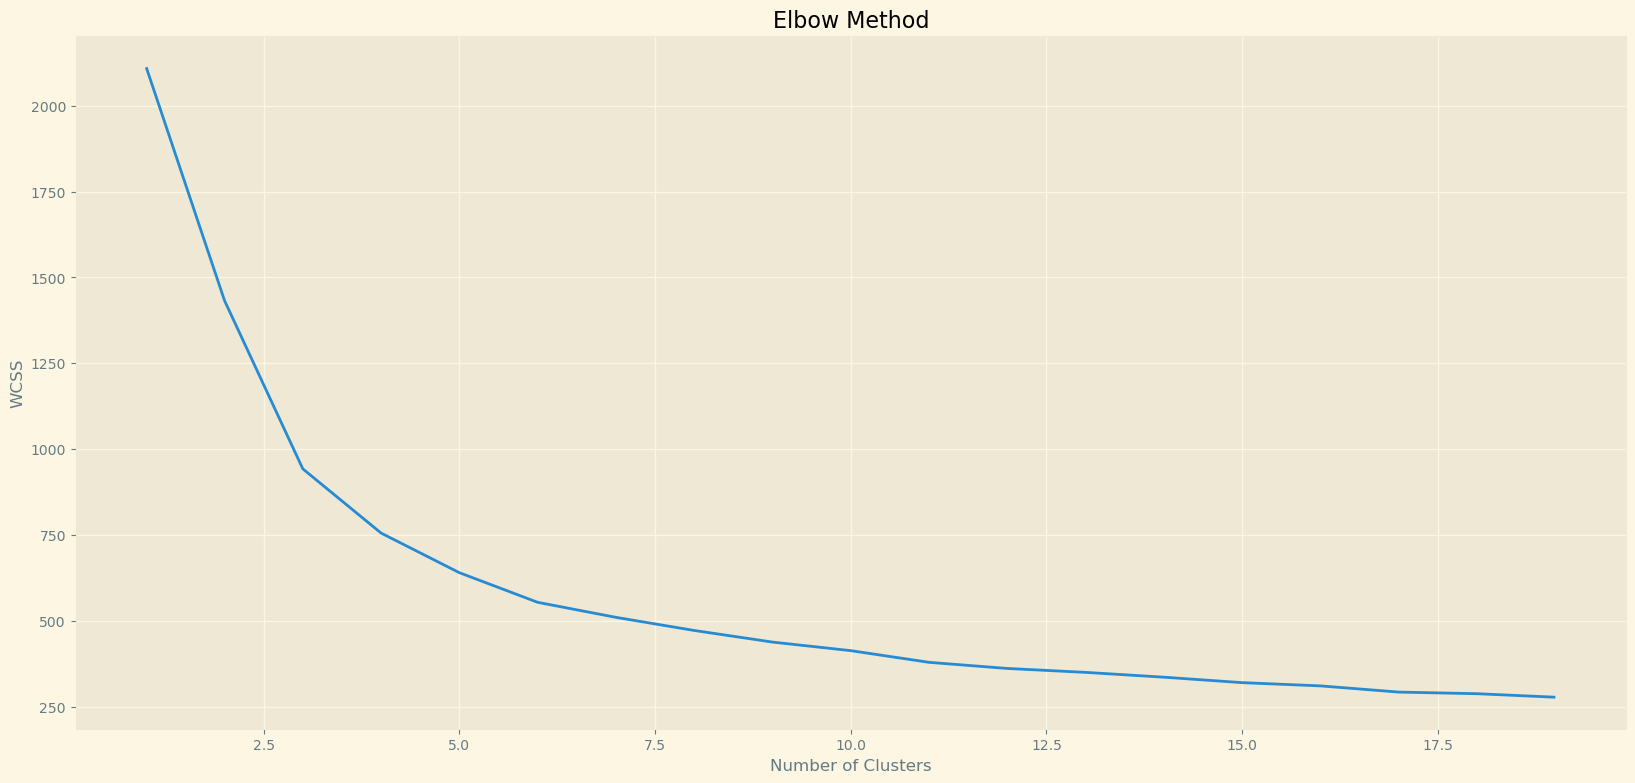

In [127]:
# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(calgary_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

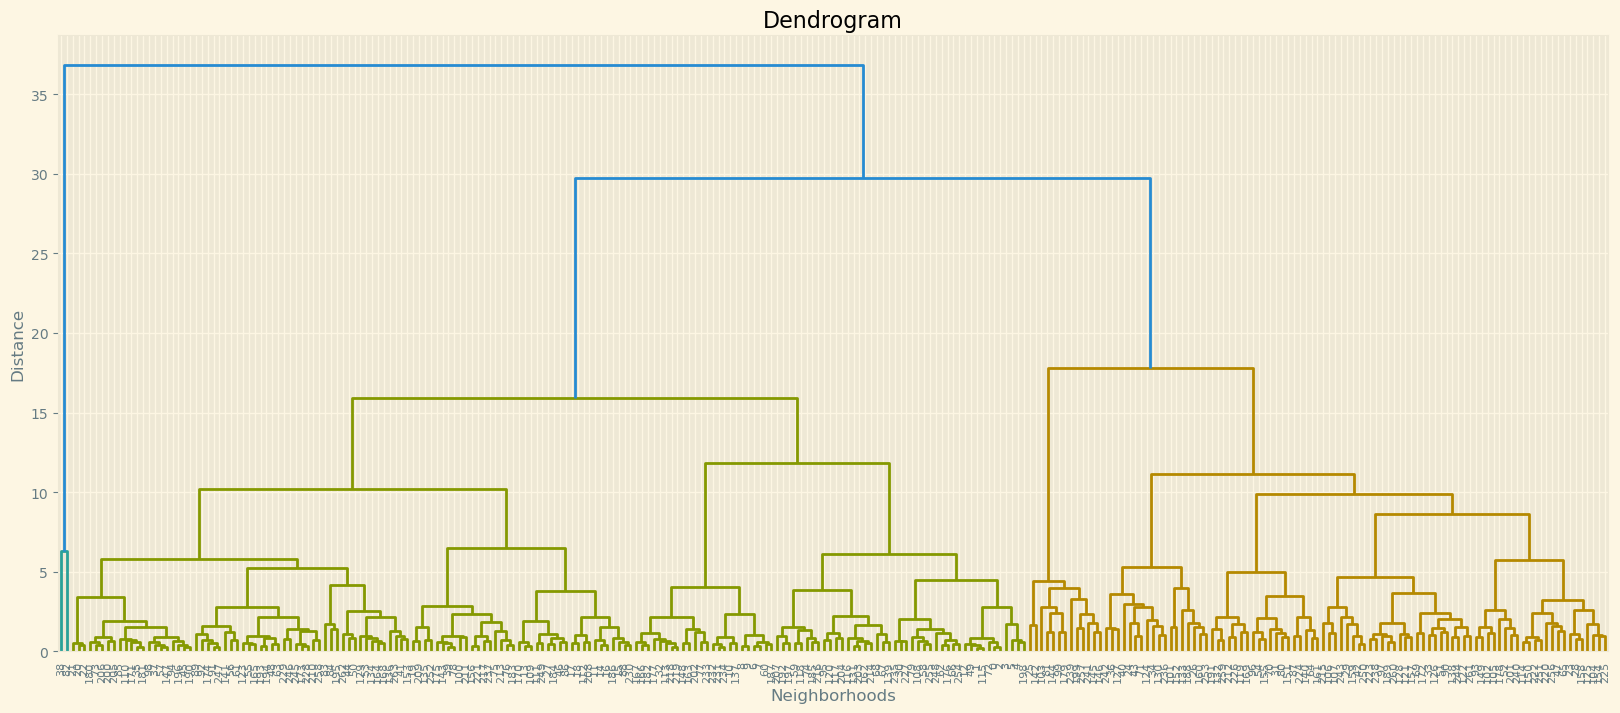

In [128]:
# Generate the linkage matrix using complete linkage
linkage_matrix = shc.linkage(calgary_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 8))
plt.title('Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
shc.dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()

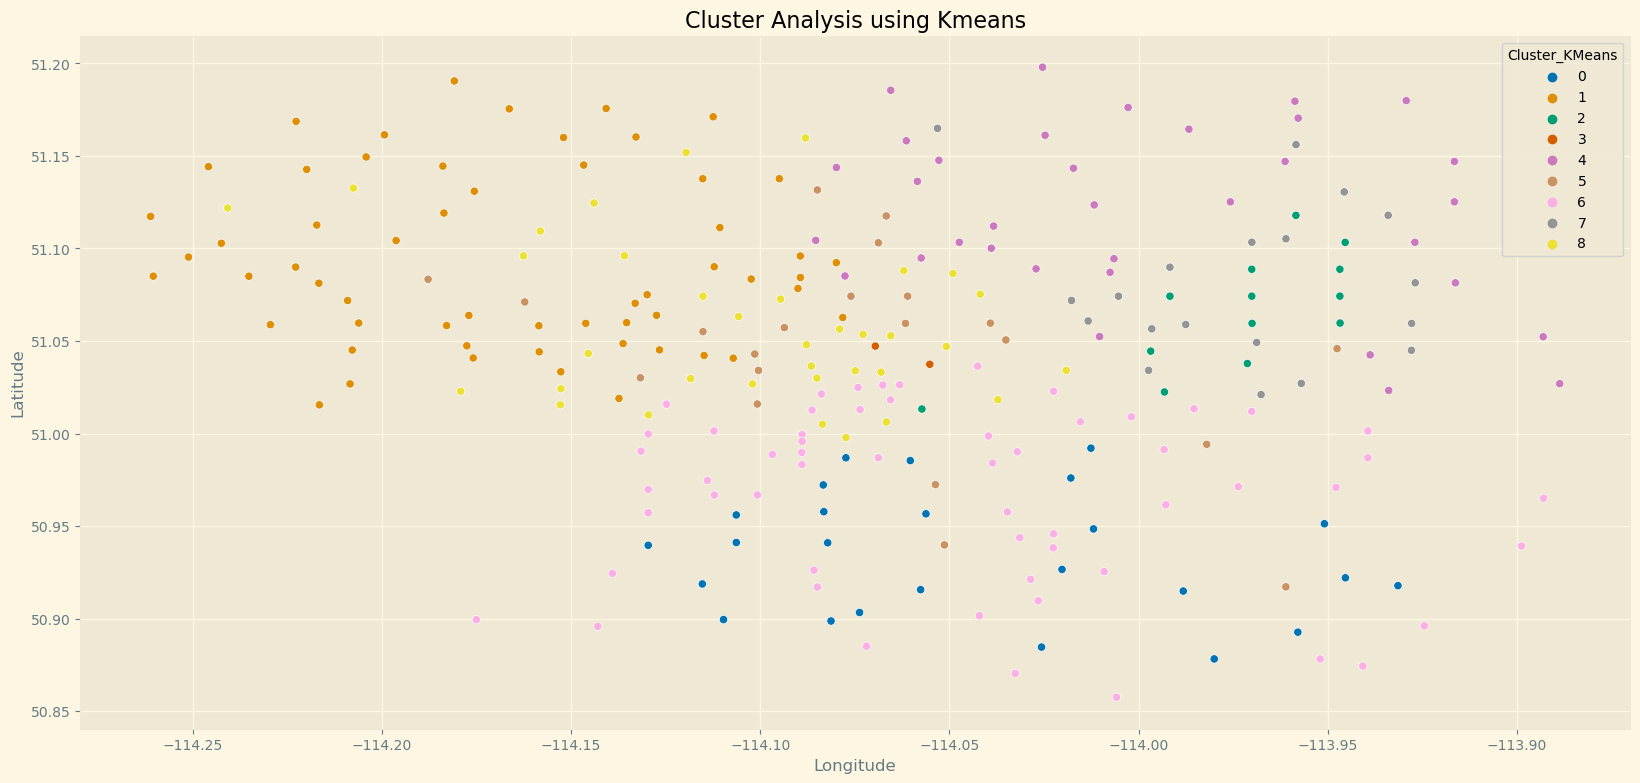

In [129]:
# Create the KMeans model and fit to the standardized data
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=1100, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(calgary_scaled)

# Add the cluster labels to the original dataframe
calgary_pivot['Cluster_KMeans'] = pred_y

# Plot the clusters
sns.scatterplot(x='Longitude', y='Latitude', data=calgary_pivot, hue='Cluster_KMeans', palette='colorblind')
#sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='Cluster', palette='colorblind')
plt.title('Cluster Analysis using Kmeans')
plt.show()

In [130]:
calgary_pivot['Cluster_KMeans'].value_counts()

6    58
1    57
8    35
4    34
0    25
5    21
7    19
2    13
3     2
Name: Cluster_KMeans, dtype: int64

In [131]:
Ccluster_0=calgary_pivot[calgary_pivot['Cluster_KMeans']==0]
Ccluster_1=calgary_pivot[calgary_pivot['Cluster_KMeans']==1]
Ccluster_2=calgary_pivot[calgary_pivot['Cluster_KMeans']==2]
Ccluster_3=calgary_pivot[calgary_pivot['Cluster_KMeans']==3]

In [132]:
Ccluster_2['NGH_Name']

25     ALBERT PARK/RADISSON HEIGHTS
81                            DOVER
99                      FALCONRIDGE
103                     FOREST LAWN
142           MANCHESTER INDUSTRIAL
144                     MARLBOROUGH
145                MARLBOROUGH PARK
146                      MARTINDALE
179                       PINERIDGE
199                          RUNDLE
239                        SUNRIDGE
241                          TEMPLE
257                       WHITEHORN
Name: NGH_Name, dtype: object

In [133]:
Ccluster_3['NGH_Name']

38                    BELTLINE
82    DOWNTOWN COMMERCIAL CORE
Name: NGH_Name, dtype: object

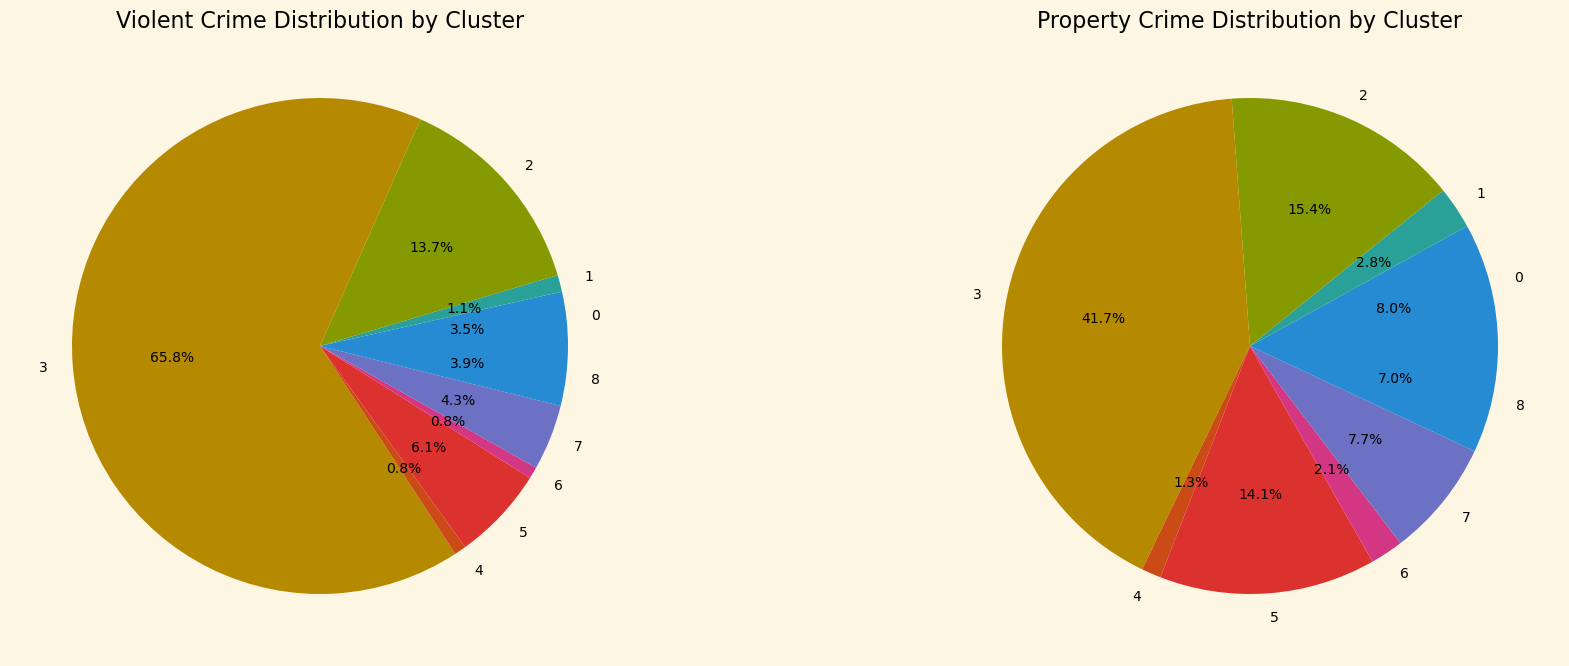

In [134]:
# Define the two crime groups
Violent_Crime = ['Assault (Non-domestic)', 'Robbery', 'Violence Other (Non-domestic)']
Property_Crime = ['Break & Enter', 'Theft FROM Vehicle', 'Theft OF Vehicle']

# Calculate the total count of crimes in each cluster for both groups
crime_counts_violent = calgary_pivot.groupby('Cluster_KMeans')[Violent_Crime].mean().sum(axis=1)
crime_counts_property = calgary_pivot.groupby('Cluster_KMeans')[Property_Crime].mean().sum(axis=1)

# Create a 1x2 grid of subplots
plt.subplot(1, 2, 1)
# Create a pie chart for violent crime
plt.pie(crime_counts_violent, labels=crime_counts_violent.index, autopct='%1.1f%%')
plt.title('Violent Crime Distribution by Cluster')

plt.subplot(1, 2, 2)
# Create a pie chart for property crime
plt.pie(crime_counts_property, labels=crime_counts_property.index, autopct='%1.1f%%')
plt.title('Property Crime Distribution by Cluster')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

In [135]:
"""Plotting Pie charts for the distribution as a % of each grouped crime by Cluster"""
def plot_violation_type_distribution_Calgary(data, violation_group):
    # Define the two violation groups
    severe_crime = ['Assault (Non-domestic)', 'Robbery', 'Violence Other (Non-domestic)']
    property_crime = ['Break & Enter', 'Theft FROM Vehicle', 'Theft OF Vehicle']

    # Select the appropriate violation group
    if violation_group == 'Severe Crime':
        violation_types = severe_crime
    elif violation_group == 'Property Crime':
        violation_types = property_crime
    else:
        raise ValueError("Violation group must be 'Severe Crime' or 'Property Crime'.")

    # Calculate the total count of each violation type in each cluster
    cluster_counts = data.groupby('Cluster_KMeans')[violation_types].mean()

    # Create a 2x2 grid of subplots for each cluster
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))

    # Loop over each cluster and create a pie chart of the violation type distribution
    for i, ax in enumerate(axs.flat):
        # Get the counts for the current cluster and convert to percentages
        counts = cluster_counts.iloc[i]
        total = counts.sum()
        percents = counts / total * 100

        # Create the pie chart
        labels = percents.index
        sizes = percents.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i}')
    
    # Add a common title for the whole figure
    fig.suptitle(f'{violation_group} Distribution by Cluster', fontsize=16)
    
    # Set the layout and show the plot
    plt.tight_layout()
    plt.show()

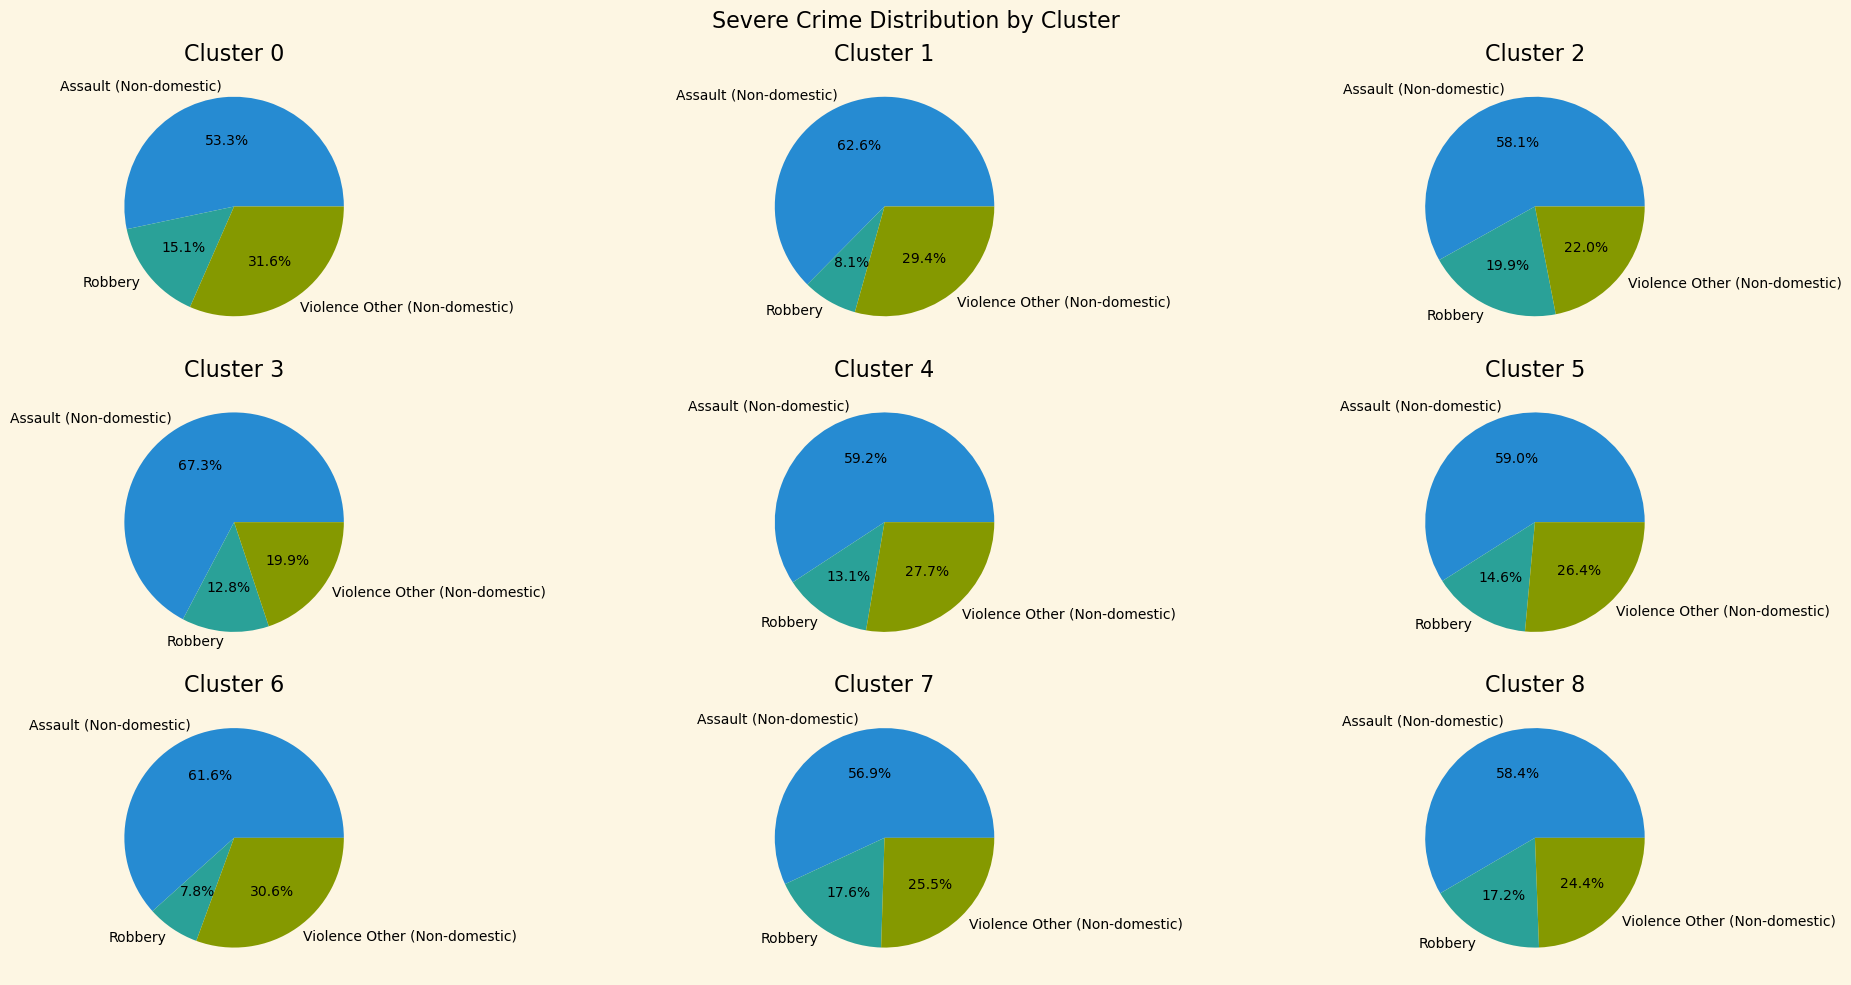

In [136]:
plot_violation_type_distribution_Calgary(calgary_pivot, 'Severe Crime')

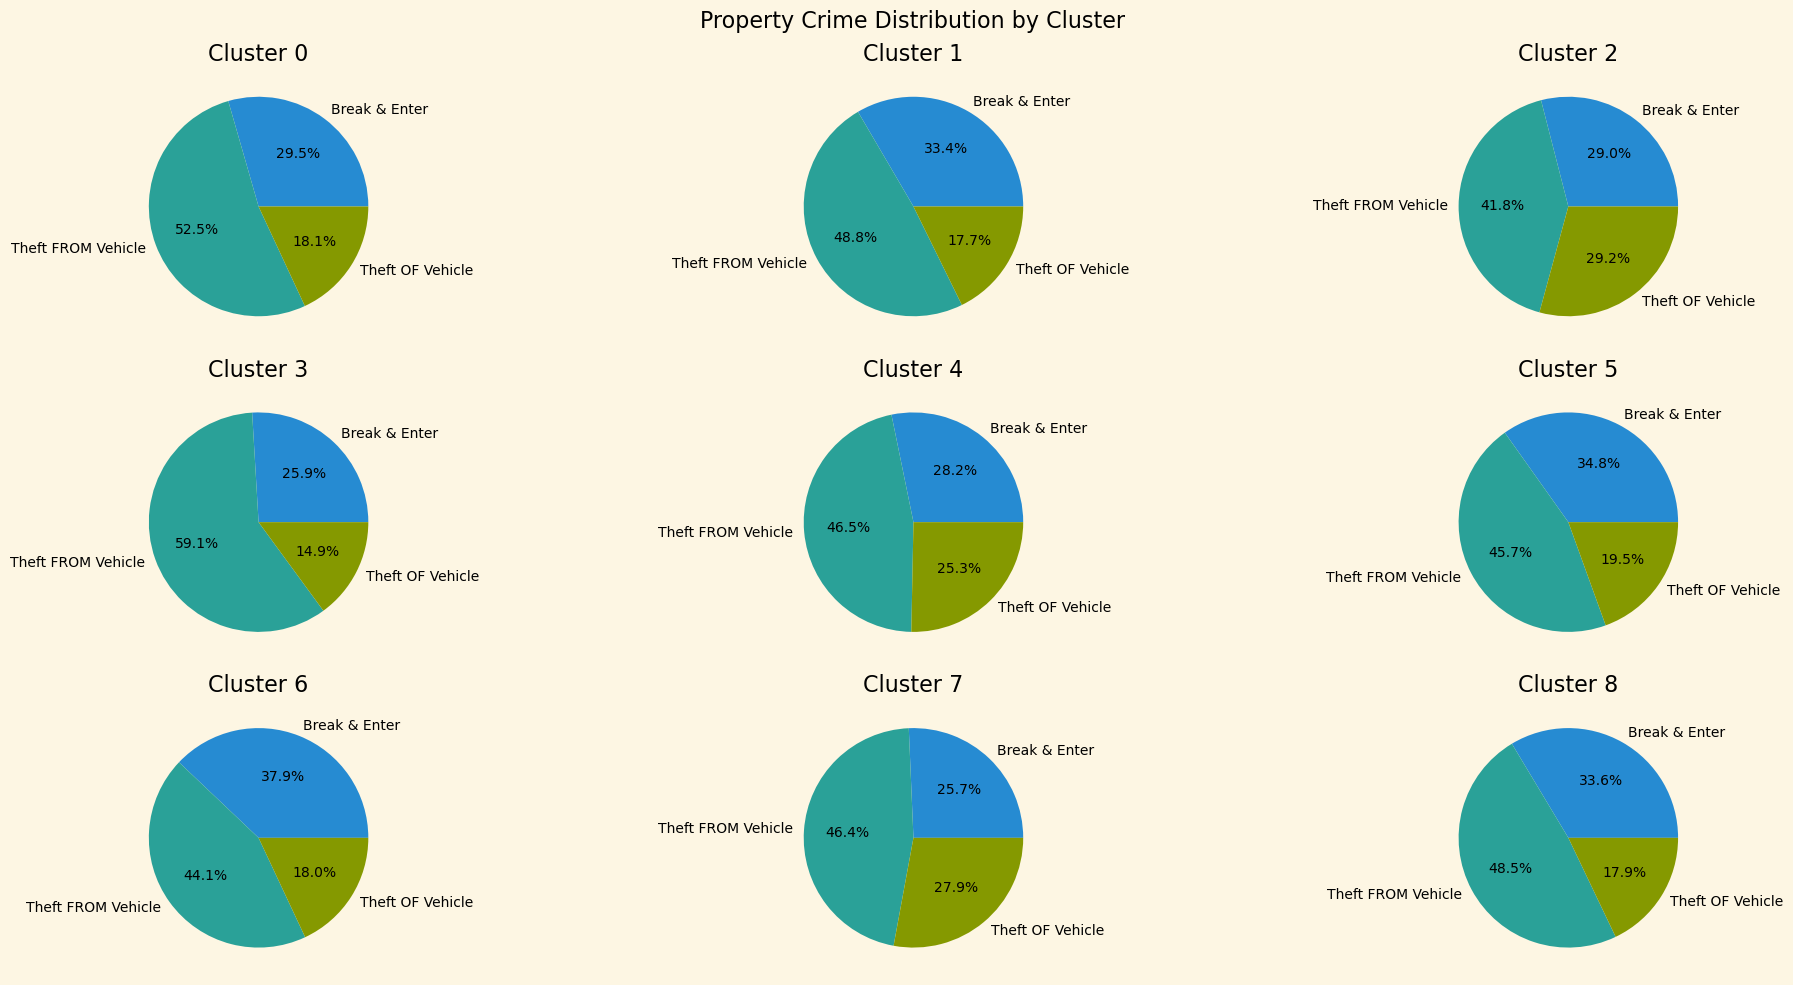

In [137]:
plot_violation_type_distribution_Calgary(calgary_pivot, 'Property Crime')

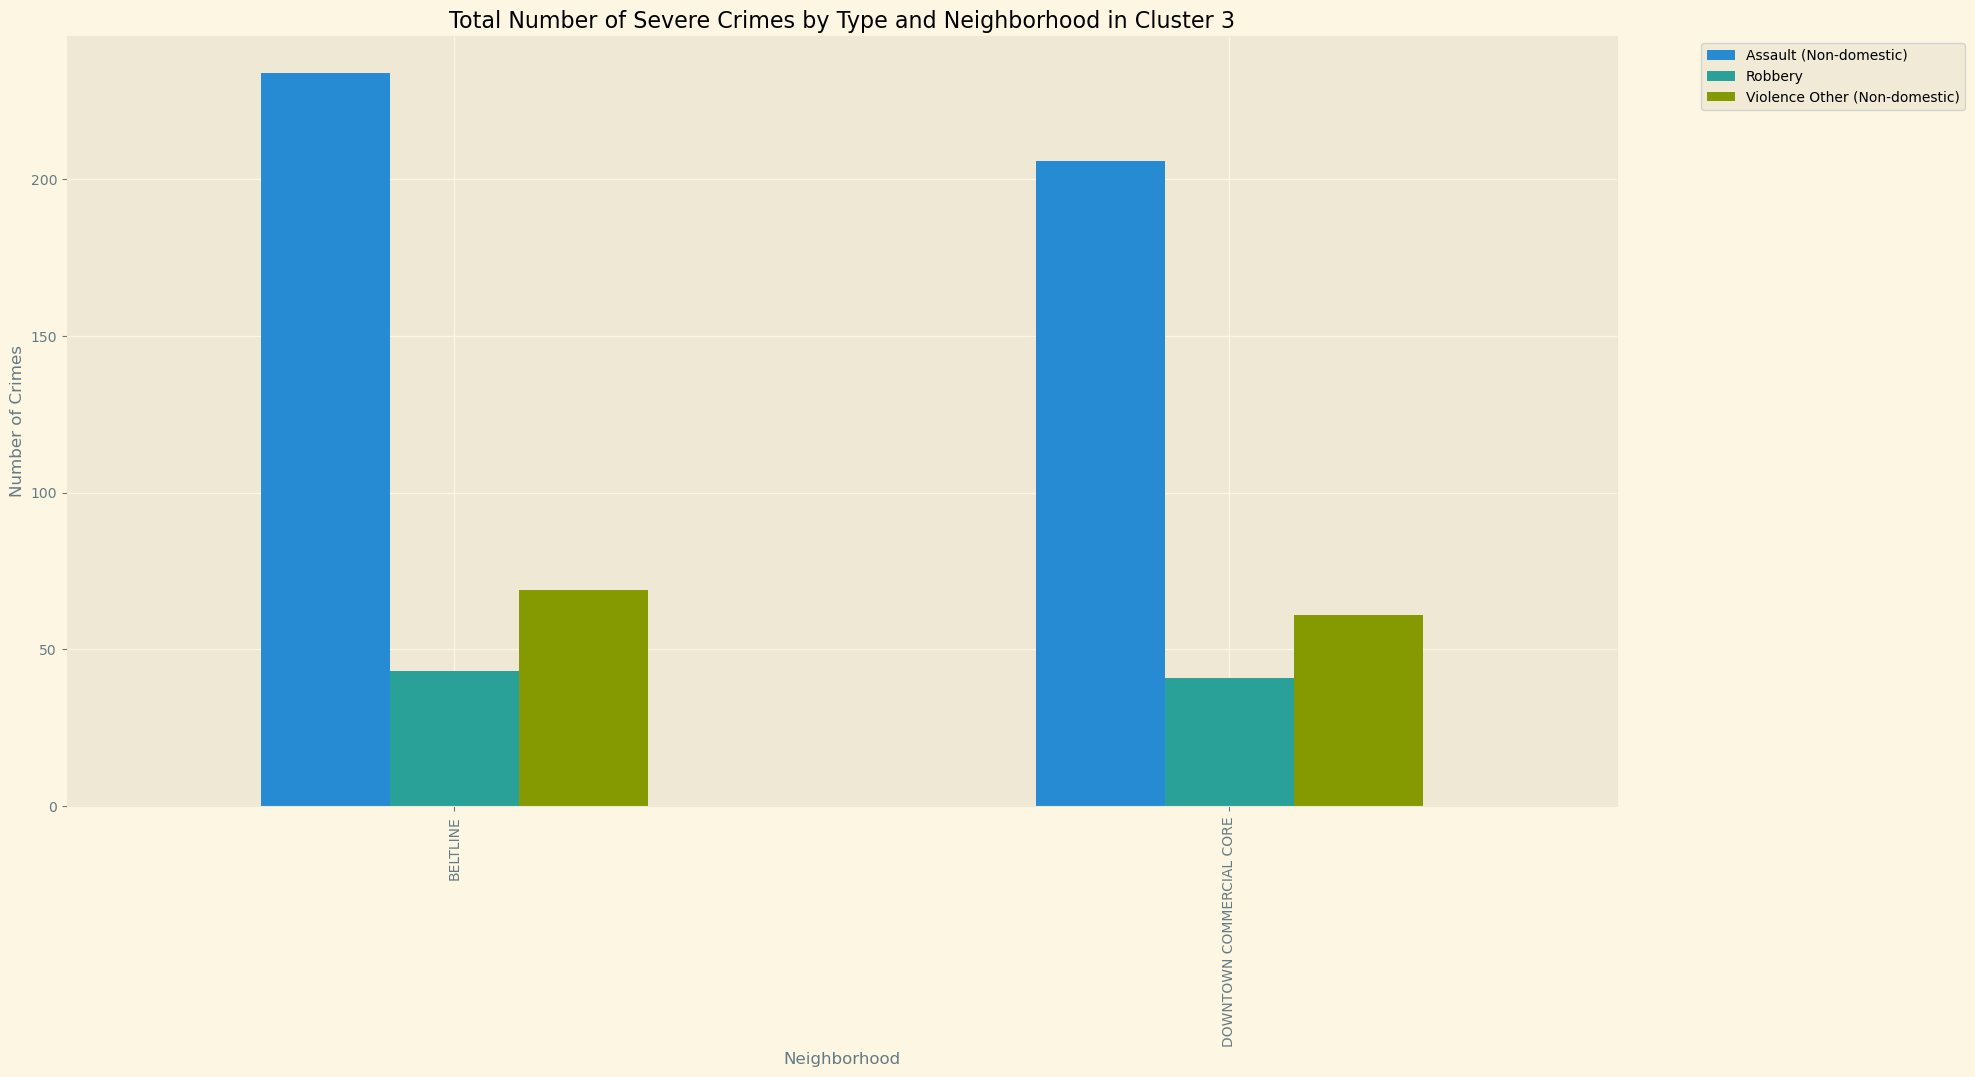

In [138]:
""""This code will create a bar chart that shows the total number of crimes for each type of crime in each neighborhood within cluster 2. 
    The x-axis shows the neighborhoods, and the y-axis shows the total number of crimes. 
    Each color in the bar chart represents a different type of crime. 
    You can use this visualization to see which neighborhoods have the highest crime rates and ..
    which types of crimes are most prevalent in each neighborhood."""

# Create a new dataframe for cluster 2
cluster_2_df = calgary_pivot[calgary_pivot['Cluster_KMeans'] == 3]

# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals = cluster_2_df.groupby('NGH_Name')[['Assault (Non-domestic)', 'Robbery', 'Violence Other (Non-domestic)']].sum()

# Create a bar chart showing the total number of crimes for each type of crime in each neighborhood
crime_totals.plot(kind='bar', figsize=(20,10))
plt.title('Total Number of Severe Crimes by Type and Neighborhood in Cluster 3')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(np.arange(len(crime_totals.index)), crime_totals.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

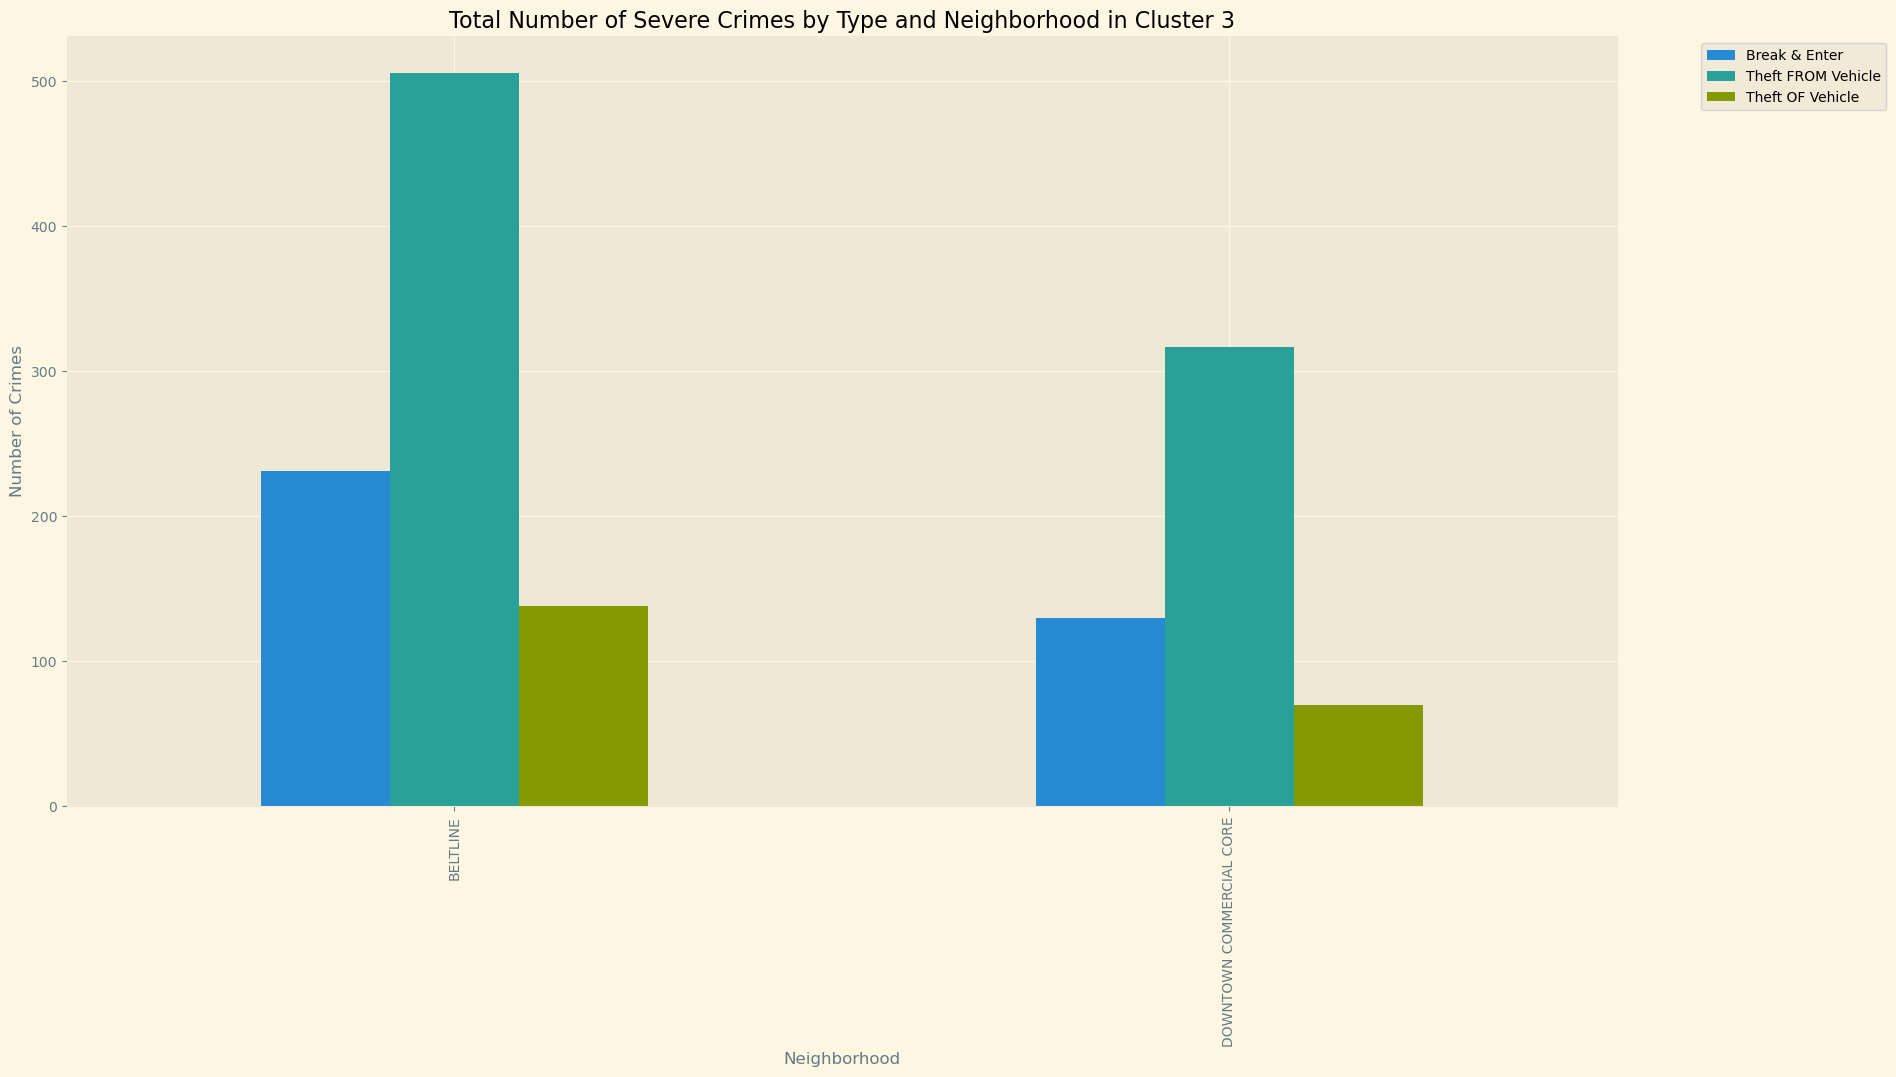

In [139]:
# Create a new dataframe for cluster 2
cluster_2_df = calgary_pivot[calgary_pivot['Cluster_KMeans'] == 3]

# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals = cluster_2_df.groupby('NGH_Name')[['Break & Enter', 'Theft FROM Vehicle', 'Theft OF Vehicle']].sum()

# Create a bar chart showing the total number of crimes for each type of crime in each neighborhood
crime_totals.plot(kind='bar', figsize=(20,10))
plt.title('Total Number of Severe Crimes by Type and Neighborhood in Cluster 3')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(np.arange(len(crime_totals.index)), crime_totals.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [140]:
calgary_pivot.columns

Index(['NGH_Name', 'Assault (Non-domestic)', 'Break & Enter', 'Robbery',
       'Theft FROM Vehicle', 'Theft OF Vehicle',
       'Violence Other (Non-domestic)', 'Latitude', 'Longitude',
       'Cluster_KMeans'],
      dtype='object')

This code is grouping the calgary_pivot DataFrame by the Cluster_KMeans column (which is the column that identifies the cluster to which each neighborhood belongs). Then, it is selecting a subset of columns that correspond to the different types of crimes that are recorded in the dataset, and computing the mean of each of these columns for each cluster. The columns that are selected are:

Assault (Non-domestic)
Break & Enter
Robbery
Theft FROM Vehicle
Theft OF Vehicle
Violence Other (Non-domestic)
This code is essentially summarizing the crime data for each cluster in terms of the average number of incidents of each type of crime that occur in the neighborhoods that belong to that cluster.

Averages of the Crimes Commited by Clusters in Calgary

In [141]:
calgary_pivot.groupby('Cluster_KMeans')['Assault (Non-domestic)', 'Break & Enter', 'Robbery',
       'Theft FROM Vehicle', 'Theft OF Vehicle',
       'Violence Other (Non-domestic)'].mean()

C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\2909496485.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  calgary_pivot.groupby('Cluster_KMeans')['Assault (Non-domestic)', 'Break & Enter', 'Robbery',


Assault (Non-domestic)  Break & Enter    Robbery  \
Cluster_KMeans                                                     
0                             9.320000      39.520000   2.640000   
1                             3.403509      15.421053   0.438596   
2                            39.692308      74.538462  13.615385   
3                           220.000000     180.500000  42.000000   
4                             2.264706       6.000000   0.500000   
5                            17.952381      82.095238   4.428571   
6                             2.327586      13.603448   0.293103   
7                            12.105263      32.842105   3.736842   
8                            11.285714      39.142857   3.314286   

                Theft FROM Vehicle  Theft OF Vehicle  \
Cluster_KMeans                                         
0                        70.400000         24.240000   
1                        22.526316          8.175439   
2                       107.307692         75.153846   
3                       411.500000        104.000000   
4                         9.882353          5.382353   
5                       107.714286         45.904762   
6                        15.810345          6.465517   
7                        59.368421         35.684211   
8                        56.485714         20.857143   

                Violence Other (Non-domestic)  
Cluster_KMeans                                 
0                                    5.520000  
1                                    1.596491  
2                                   15.000000  
3                                   65.000000  
4                                    1.058824  
5                                    8.047619  
6                                    1.155172  
7                                    5.421053  
8                                    4.714286

Lets view the table by drilling down to the cluster 1

In [142]:
cluster_num = 3
cluster_df = calgary_pivot[calgary_pivot['Cluster_KMeans'] == cluster_num]
ngh_grouped = cluster_df.groupby('NGH_Name')[['Assault (Non-domestic)', 'Break & Enter', 'Robbery', 'Theft FROM Vehicle', 'Theft OF Vehicle', 'Violence Other (Non-domestic)']].mean()
ngh_grouped

Assault (Non-domestic)  Break & Enter  Robbery  \
NGH_Name                                                                   
BELTLINE                                   234.0          231.0     43.0   
DOWNTOWN COMMERCIAL CORE                   206.0          130.0     41.0   

                          Theft FROM Vehicle  Theft OF Vehicle  \
NGH_Name                                                         
BELTLINE                               506.0             138.0   
DOWNTOWN COMMERCIAL CORE               317.0              70.0   

                          Violence Other (Non-domestic)  
NGH_Name                                                 
BELTLINE                                           69.0  
DOWNTOWN COMMERCIAL CORE                           61.0

In [164]:
cluster_num = 2
cluster_df = calgary_pivot[calgary_pivot['Cluster_KMeans'] == cluster_num]
ngh_grouped = cluster_df.groupby('NGH_Name')[['Assault (Non-domestic)', 'Break & Enter', 'Robbery', 'Theft FROM Vehicle', 'Theft OF Vehicle', 'Violence Other (Non-domestic)']].mean()
ngh_grouped

Assault (Non-domestic)  Break & Enter  Robbery  \
NGH_Name                                                                       
ALBERT PARK/RADISSON HEIGHTS                    40.0          120.0     17.0   
DOVER                                           33.0           68.0     16.0   
FALCONRIDGE                                     50.0           60.0     14.0   
FOREST LAWN                                     72.0           81.0     20.0   
MANCHESTER INDUSTRIAL                           34.0          125.0     13.0   
MARLBOROUGH                                     37.0           69.0     17.0   
MARLBOROUGH PARK                                23.0           74.0      9.0   
MARTINDALE                                      31.0           80.0     11.0   
PINERIDGE                                       41.0           78.0     13.0   
RUNDLE                                          31.0           69.0      8.0   
SUNRIDGE                                        70.0           37.0     10.0   
TEMPLE                                          23.0           66.0     17.0   
WHITEHORN                                       31.0           42.0     12.0   

                              Theft FROM Vehicle  Theft OF Vehicle  \
NGH_Name                                                             
ALBERT PARK/RADISSON HEIGHTS               100.0              76.0   
DOVER                                      181.0              75.0   
FALCONRIDGE                                111.0              71.0   
FOREST LAWN                                 92.0              91.0   
MANCHESTER INDUSTRIAL                       86.0              70.0   
MARLBOROUGH                                150.0              93.0   
MARLBOROUGH PARK                           112.0              64.0   
MARTINDALE                                 112.0              80.0   
PINERIDGE                                  130.0              88.0   
RUNDLE                                      68.0              60.0   
SUNRIDGE                                    76.0              52.0   
TEMPLE                                     104.0              80.0   
WHITEHORN                                   73.0              77.0   

                              Violence Other (Non-domestic)  
NGH_Name                                                     
ALBERT PARK/RADISSON HEIGHTS                           13.0  
DOVER                                                  14.0  
FALCONRIDGE                                            21.0  
FOREST LAWN                                            20.0  
MANCHESTER INDUSTRIAL                                   6.0  
MARLBOROUGH                                            14.0  
MARLBOROUGH PARK                                       12.0  
MARTINDALE                                             11.0  
PINERIDGE                                              20.0  
RUNDLE                                                 17.0  
SUNRIDGE                                               18.0  
TEMPLE                                                 11.0  
WHITEHORN                                              18.0

C:\Users\azimi\AppData\Local\Temp\ipykernel_13664\3195579139.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_means_calgary = calgary_pivot.groupby('Cluster_KMeans')['Assault (Non-domestic)', 'Break & Enter', 'Robbery',


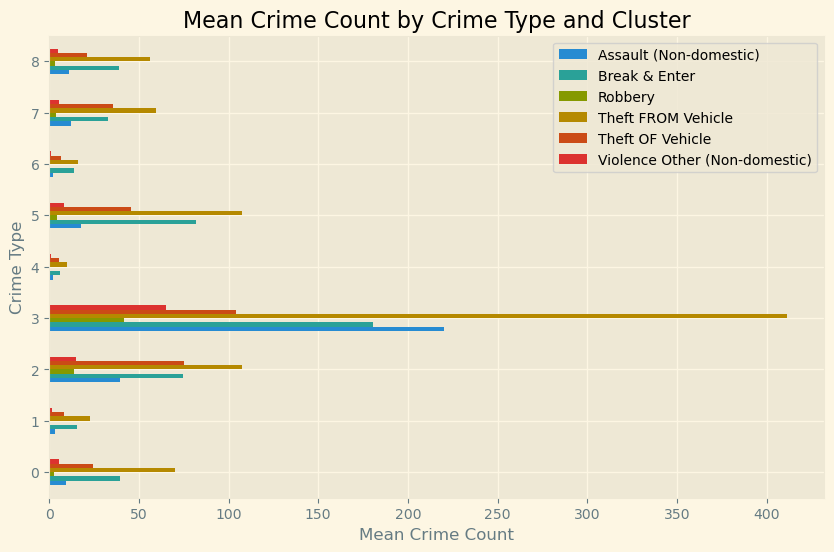

In [143]:
# Get the mean crime count for each crime type for each cluster
crime_means_calgary = calgary_pivot.groupby('Cluster_KMeans')['Assault (Non-domestic)', 'Break & Enter', 'Robbery',
       'Theft FROM Vehicle', 'Theft OF Vehicle',
       'Violence Other (Non-domestic)'].mean()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
crime_means_calgary.plot(kind='barh', ax=ax)

# Set chart title and axis labels
ax.set_title('Mean Crime Count by Crime Type and Cluster')
ax.set_xlabel('Mean Crime Count')
ax.set_ylabel('Crime Type')

# Show the chart
plt.show()

In [144]:
calgary_pivot.groupby('Cluster_KMeans')['NGH_Name'].count()

Cluster_KMeans
0    25
1    57
2    13
3     2
4    34
5    21
6    58
7    19
8    35
Name: NGH_Name, dtype: int64

Comparison between Edmonton HOT cluster and Calgary HOT cluster

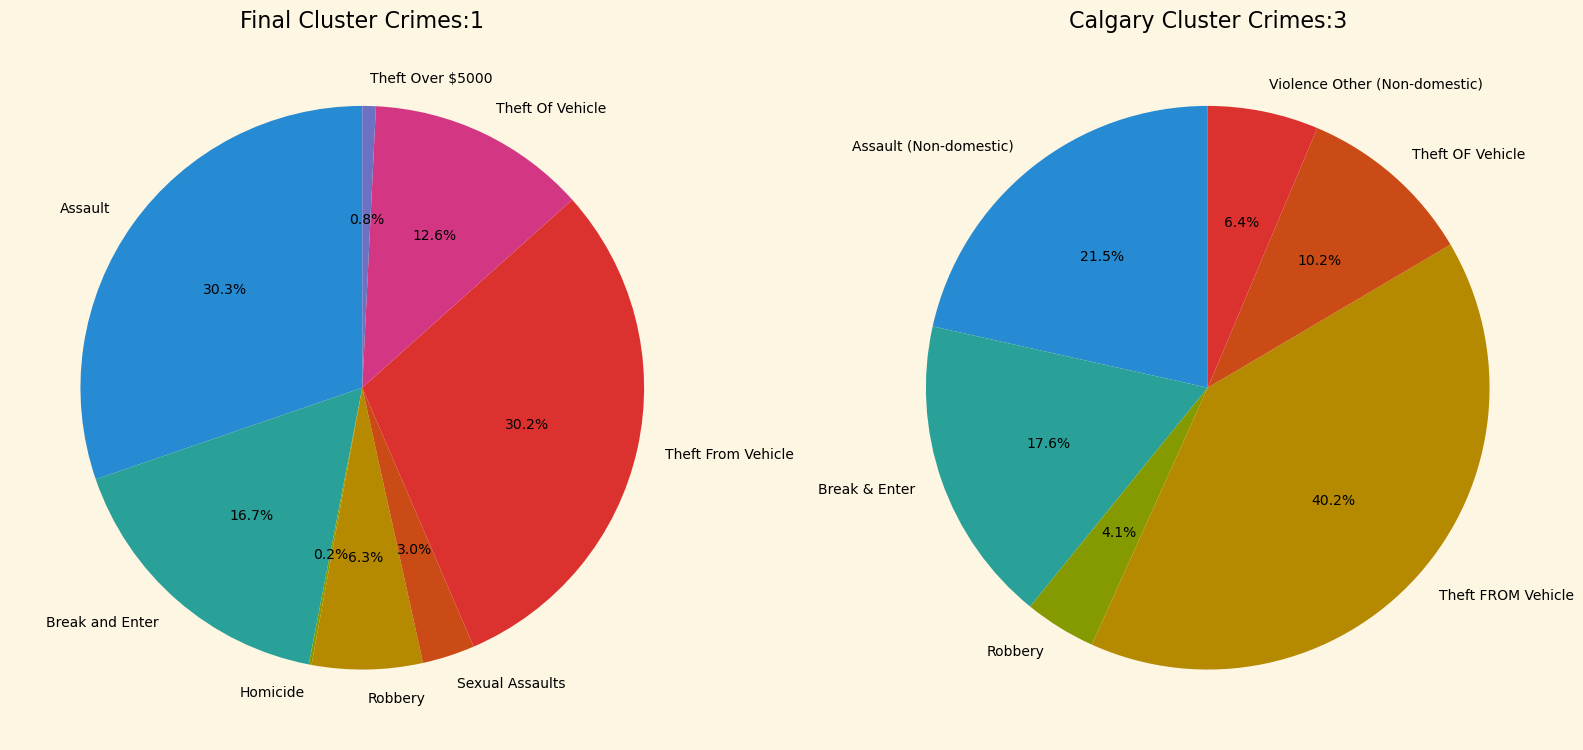

In [145]:
import matplotlib.pyplot as plt

# Subset the data to the two clusters of interest
final_cluster = final[final['Cluster_KMeans'] == 1]
calgary_cluster = calgary_pivot[calgary_pivot['Cluster_KMeans'] == 3]

# Define the crime categories to plot
final_crime_cols = ['Assault', 'Break and Enter', 'Homicide', 'Robbery', 'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']
calgary_crime_cols = ['Assault (Non-domestic)', 'Break & Enter', 'Robbery', 'Theft FROM Vehicle', 'Theft OF Vehicle', 'Violence Other (Non-domestic)']

# Calculate the crime totals for each cluster
final_totals = final_cluster[final_crime_cols].mean()
calgary_totals = calgary_cluster[calgary_crime_cols].mean()

# Create a figure with two subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first pie chart for the final cluster
ax1.pie(final_totals, labels=final_crime_cols, autopct='%1.1f%%', startangle=90)
ax1.set_title('Final Cluster Crimes:1')

# Plot the second pie chart for the Calgary cluster
ax2.pie(calgary_totals, labels=calgary_crime_cols, autopct='%1.1f%%', startangle=90)
ax2.set_title('Calgary Cluster Crimes:3')

# Show the plot
plt.show()


One final look at the Edmonton Cluster_1 (High Crime) and Calgary Cluster_3(High Crime)

In [146]:
cluster_1['NGH_Name']

2         ALBERTA AVENUE
32          BOYLE STREET
53     CENTRAL MCDOUGALL
69              DOWNTOWN
88               GARNEAU
113            INGLEWOOD
165               OLIVER
182      QUEEN MARY PARK
211           STRATHCONA
Name: NGH_Name, dtype: object

In [147]:
Ccluster_3['NGH_Name']

38                    BELTLINE
82    DOWNTOWN COMMERCIAL CORE
Name: NGH_Name, dtype: object

In [148]:
calgary_pivot

NGH_Name  Assault (Non-domestic)  Break & Enter  \
0                          01B                       0              1   
1                          01C                       0              1   
2                          01F                       0              0   
3                          02A                      29              5   
4                          02E                      11              2   
..                         ...                     ...            ...   
259                WILLOW PARK                      18             44   
260               WINDSOR PARK                       3             40   
261  WINSTON HEIGHTS/MOUNTVIEW                      12             41   
262                   WOODBINE                       5             28   
263                  WOODLANDS                      21             28   

     Robbery  Theft FROM Vehicle  Theft OF Vehicle  \
0          0                   1                 0   
1          0                   0                 0   
2          0                   1                 0   
3          0                   1                 1   
4          0                   2                 2   
..       ...                 ...               ...   
259        5                  78                26   
260        0                  49                16   
261        1                  53                30   
262        3                  51                17   
263        2                  29                13   

     Violence Other (Non-domestic)   Latitude   Longitude  Cluster_KMeans  
0                                0  51.102826 -114.242480               1  
1                                0  51.085008 -114.235211               1  
2                                0  51.117348 -114.261186               1  
3                                5  51.168702 -114.222716               1  
4                                1  51.161431 -114.199362               1  
..                             ...        ...         ...             ...  
259                              5  50.956619 -114.056202               0  
260                              2  51.005046 -114.083552               8  
261                              6  51.075325 -114.041855               8  
262                              1  50.939611 -114.129629               0  
263                              8  50.941120 -114.106344               0  

[264 rows x 10 columns]

In [149]:
final

NGH_Name  Assault  Break and Enter  Homicide  Robbery  \
0      ABBOTTSFIELD       35                8         0        8   
1            ALBANY        8                8         0        2   
2    ALBERTA AVENUE      123              119         1       26   
3        ALDERGROVE       17               19         0        6   
4            ALLARD        6               17         0        1   
..              ...      ...              ...       ...      ...   
238        WESTWOOD       43               34         0        7   
239       WILD ROSE       14               15         0        2   
240      WINDERMERE        7               22         0        3   
241       WOODCROFT       30               22         0       13   
242            YORK       24               21         0        4   

     Sexual Assaults  Theft From Vehicle  Theft Of Vehicle  Theft Over $5000  \
0                  4                  16                 6                 0   
1                  2                   9                 2                 1   
2                 13                 156                99                 2   
3                  4                  46                23                 0   
4                  0                  12                 3                 4   
..               ...                 ...               ...               ...   
238                6                  53                48                 1   
239                2                  46                24                 1   
240                1                  31                 6                 4   
241                4                  40                20                 4   
242                2                  48                17                 4   

      Latitude  ...  Income_30K to less than 60K  \
0    53.574143  ...                        170.0   
1    53.632382  ...                         56.0   
2    53.568485  ...                        667.0   
3    53.516888  ...                        266.0   
4    53.401301  ...                         48.0   
..         ...  ...                          ...   
238  53.575942  ...                        321.0   
239  53.470564  ...                        198.0   
240  53.432563  ...                        144.0   
241  53.564595  ...                        121.0   
242  53.602843  ...                        297.0   

     Income_60K to less than 100K  Income_100K to less than 125K  \
0                            79.0                           23.0   
1                            63.0                           30.0   
2                           364.0                          139.0   
3                           284.0                          135.0   
4                           165.0                          109.0   
..                            ...                            ...   
238                         124.0                           36.0   
239                         273.0                          125.0   
240                         271.0                          137.0   
241                         107.0                           32.0   
242                         271.0                          103.0   

     Income_125K to less than 150K  Income_150K to less than 200K  \
0                              4.0                            3.0   
1                              9.0                           14.0   
2                             62.0                           61.0   
3                             72.0                           49.0   
4                             48.0                           69.0   
..                             ...                            ...   
238                           22.0                           14.0   
239                          100.0                           96.0   
240                          151.0                          150.0   
241                           24.0                           29.0   
242                           65

In [150]:
calgary_pivot.to_csv('Calgary_with_Cluster.csv')

In [151]:
final.to_csv('Edmonton_with_Cluster.csv')

In [152]:
final.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Assessed Value', 'Cluster_KMeans'],
      dtype='object')

In [153]:
cl3_Income=cluster_3[['Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more']]

In [154]:
cl3_Income.describe().mean()

Income_Less than $30K             74.235475
Income_30K to less than 60K       98.342541
Income_60K to less than 100K     103.514977
Income_100K to less than 125K     62.359060
Income_125K to less than 150K     46.066072
Income_150K to less than 200K     50.760546
Income_200K to less than 250K     37.633394
Income_250K or more               42.869206
dtype: float64

In [155]:
cl1_Income=cluster_1[['Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more']]
cl1_Income.describe().mean()

Income_Less than $30K            646.478417
Income_30K to less than 60K      604.165988
Income_60K to less than 100K     504.122211
Income_100K to less than 125K    185.235000
Income_125K to less than 150K    103.857300
Income_150K to less than 200K     93.740488
Income_200K to less than 250K     38.724513
Income_250K or more               49.617033
dtype: float64

In [156]:
cl1_Income.describe()

Income_Less than $30K  Income_30K to less than 60K  \
count               9.000000                     9.000000   
mean              784.666667                   710.222222   
std               308.160672                   377.105681   
min               488.000000                   435.000000   
25%               587.000000                   488.000000   
50%               610.000000                   536.000000   
75%               972.000000                   667.000000   
max              1413.000000                  1611.000000   

       Income_60K to less than 100K  Income_100K to less than 125K  \
count                      9.000000                       9.000000   
mean                     569.222222                     212.444444   
std                      446.755464                     170.435553   
min                      172.000000                      32.000000   
25%                      303.000000                      92.000000   
50%                      364.000000                     139.000000   
75%                      664.000000                     290.000000   
max                     1505.000000                     537.000000   

       Income_125K to less than 150K  Income_150K to less than 200K  \
count                       9.000000                       9.000000   
mean                      118.444444                     109.777778   
std                        88.413957                      81.146130   
min                        17.000000                       7.000000   
25%                        55.000000                      43.000000   
50%                        78.000000                      89.000000   
75%                       188.000000                     180.000000   
max                       277.000000                     231.000000   

       Income_200K to less than 250K  Income_250K or more  
count                       9.000000             9.000000  
mean                       44.222222            53.888889  
std                        38.573883            46.047379  
min                         2.000000             4.000000  
25%                        10.000000            11.000000  
50%                        33.000000            61.000000  
75%                        76.000000            92.000000  
max                        97.000000           120.000000

In [157]:
property_crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']
severe_crime = ['Assault', 'Homicide', 'Robbery', 'Sexual Assaults']
income_levels = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                     'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                     'Income_200K to less than 250K', 'Income_250K or more']
employment_status = ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
                         'Permanently Unemployed']
education_level = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']

In [158]:
cl1_education=cluster_1[education_level]
cl1_education.describe().mean()

Preschool         139.393935
Kindergarten      125.576737
Gr7-9              43.658973
Gr10-12            40.897805
Post-Secondary    487.824688
dtype: float64

In [159]:
cl3_education=cluster_3[education_level]
cl3_education.describe().mean()

Preschool          81.948455
Kindergarten      110.449573
Gr7-9              53.004365
Gr10-12            48.394616
Post-Secondary     89.122268
dtype: float64